In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [504]:
df=pd.read_csv('/content/data.csv')

In [ ]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [ ]:
df['Bankrupt?'].value_counts()

,count
Bankrupt?,
0,6599
1,220


In [ ]:
df.isna().sum()

,0
Bankrupt?,0
ROA(C) before interest and depreciation before interest,0
ROA(A) before interest and % after tax,0
ROA(B) before interest and depreciation after tax,0
Operating Gross Margin,0
...,...
Liability to Equity,0
Degree of Financial Leverage (DFL),0
Interest Coverage Ratio (Interest expense to EBIT),0
Net Income Flag,0


In [ ]:
df.dtypes

,0
Bankrupt?,int64
ROA(C) before interest and depreciation before interest,float64
ROA(A) before interest and % after tax,float64
ROA(B) before interest and depreciation after tax,float64
Operating Gross Margin,float64
...,...
Liability to Equity,float64
Degree of Financial Leverage (DFL),float64
Interest Coverage Ratio (Interest expense to EBIT),float64
Net Income Flag,int64


In [ ]:
df.isna()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6815,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6816,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6817,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
col_list=df.columns.drop('Bankrupt?')

In [ ]:
for col in col_list:
  if df[col].dtype=='int64' or df[col].dtype=='float64':
    df[col]=df[col].fillna(df[col].mean)

  else:
    df[col]=df[col].filna(df[col].mode[0])

KeyError: 'Bankrupt?'

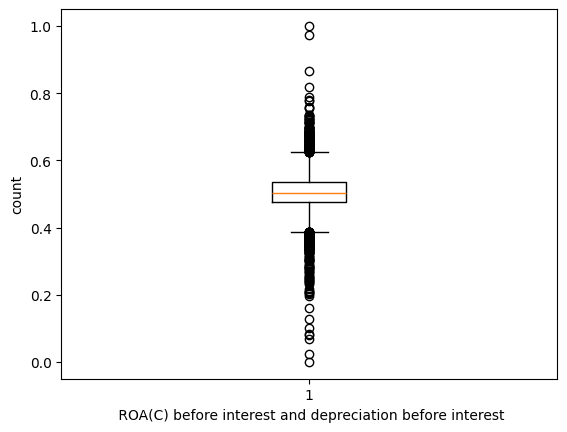

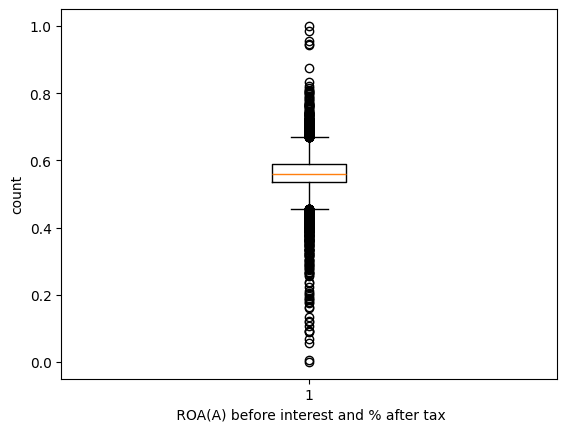

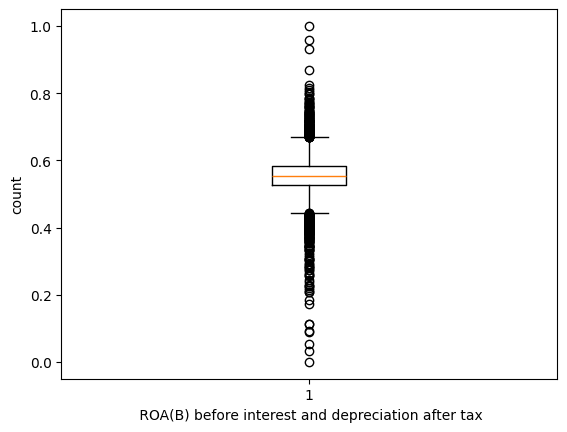

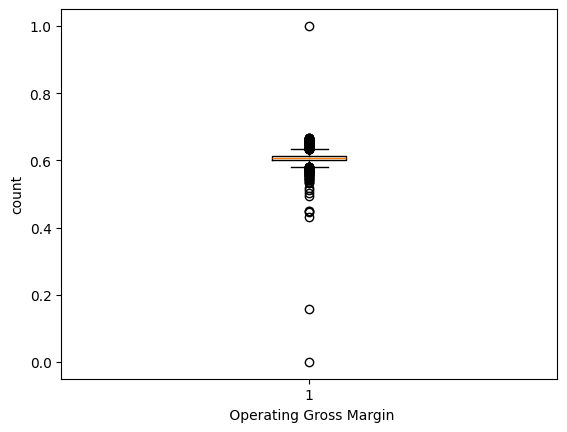

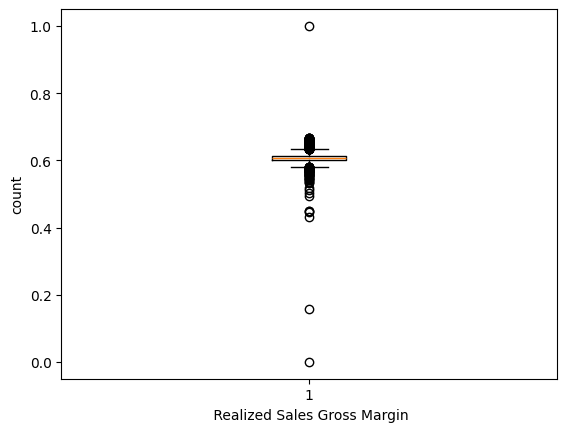

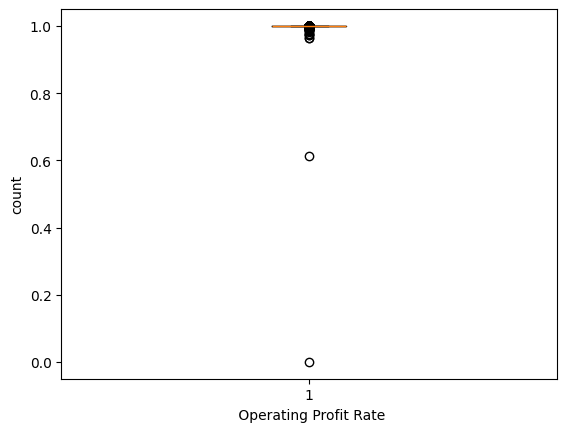

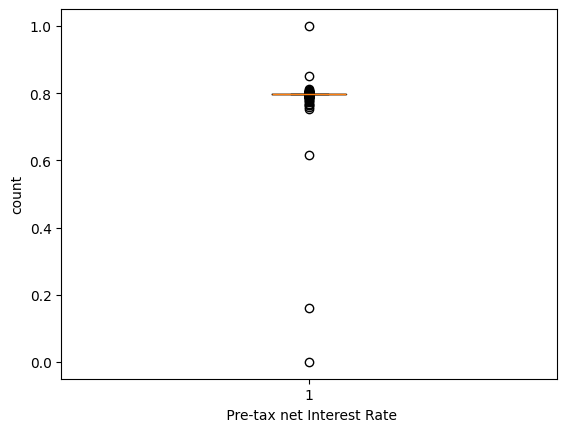

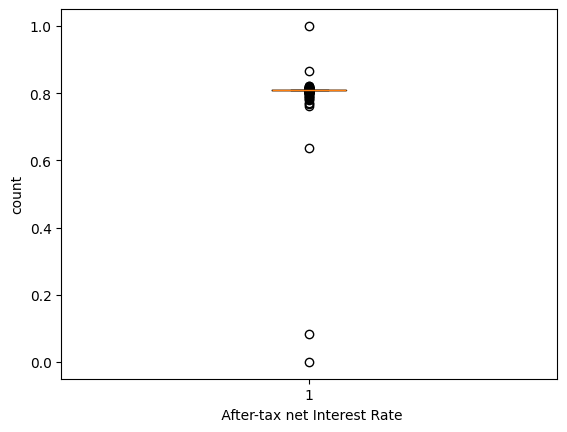

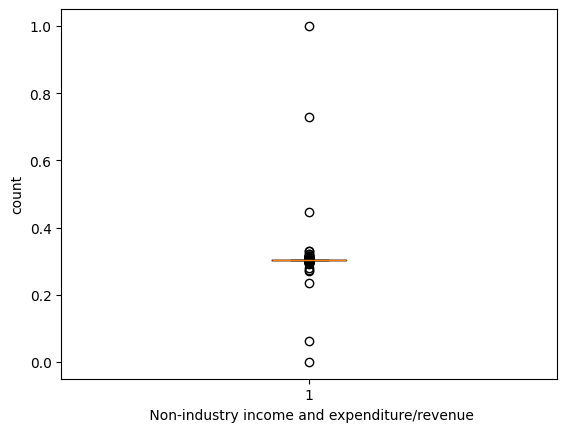

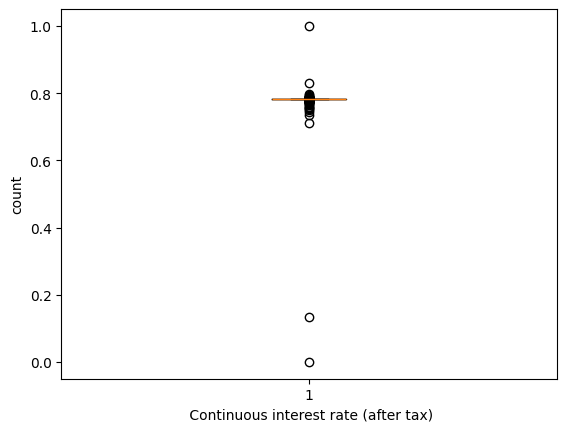

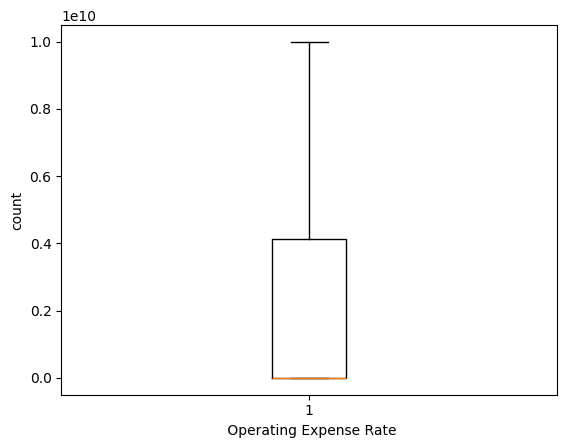

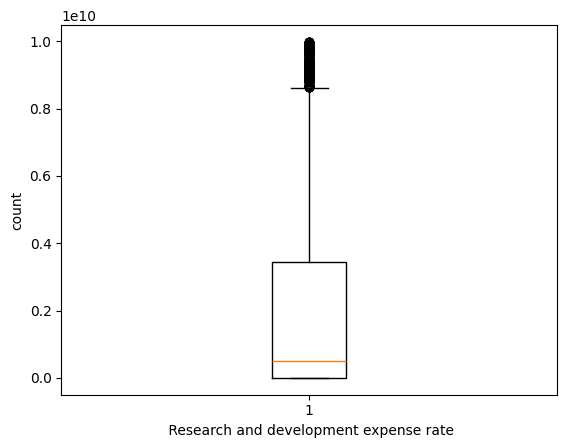

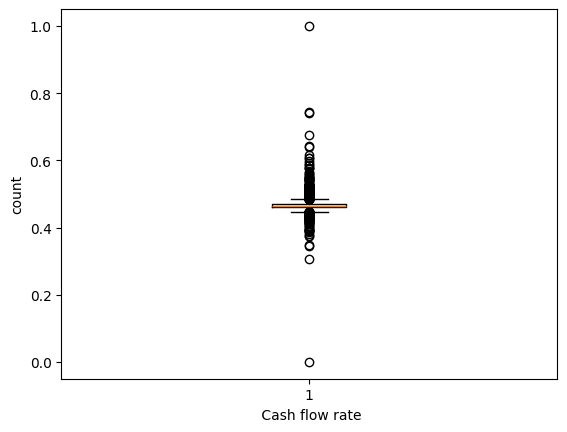

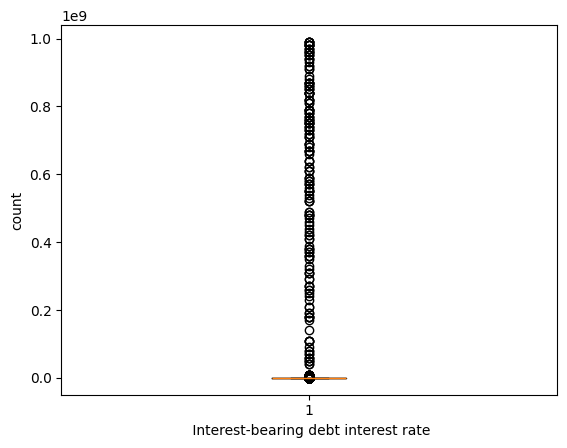

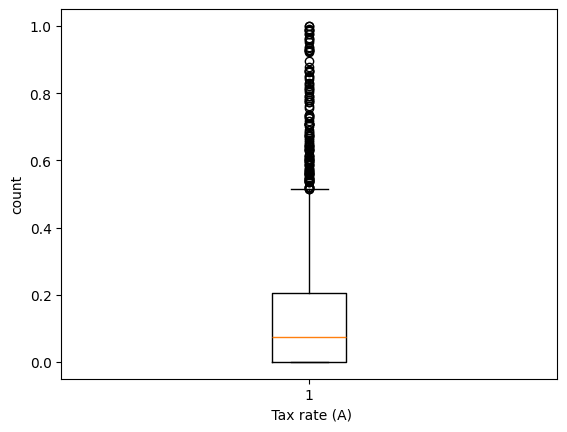

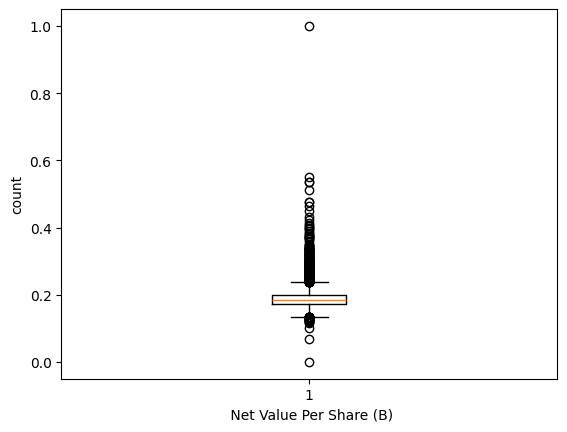

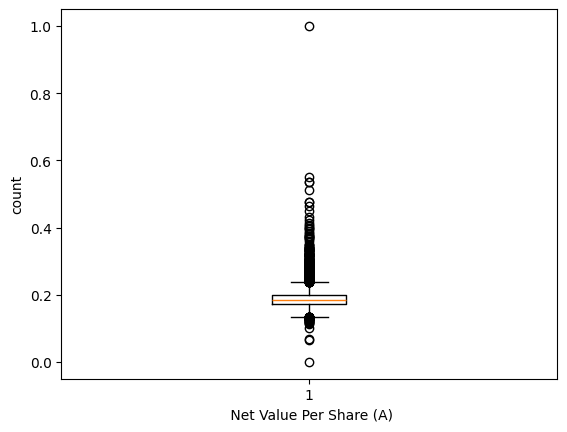

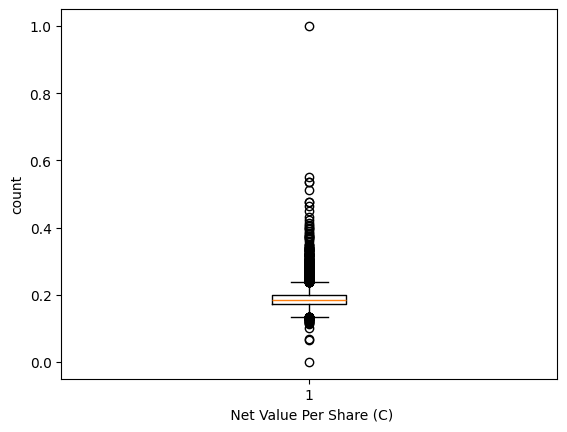

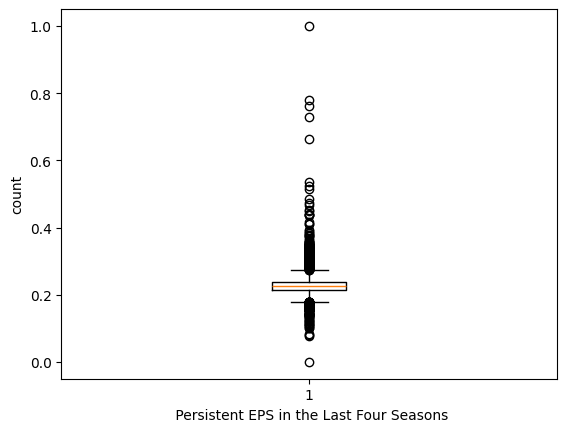

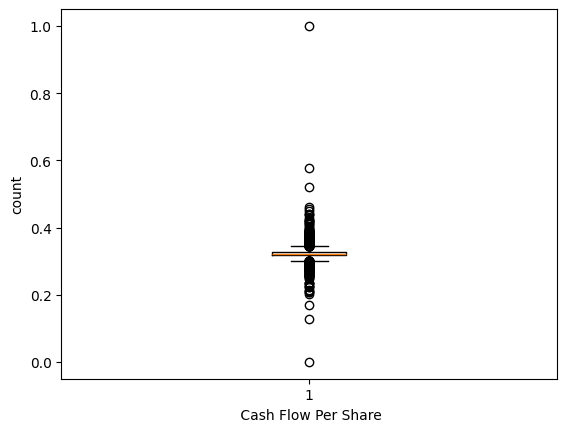

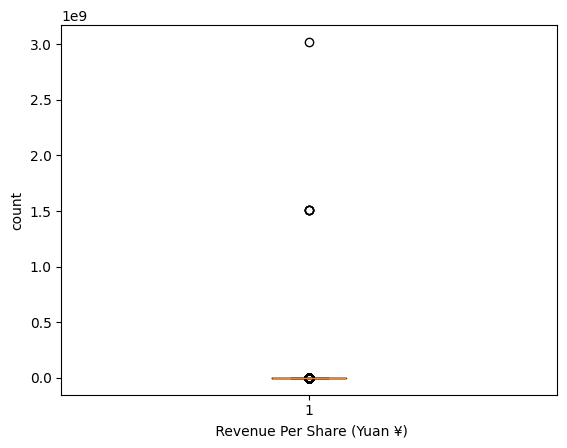

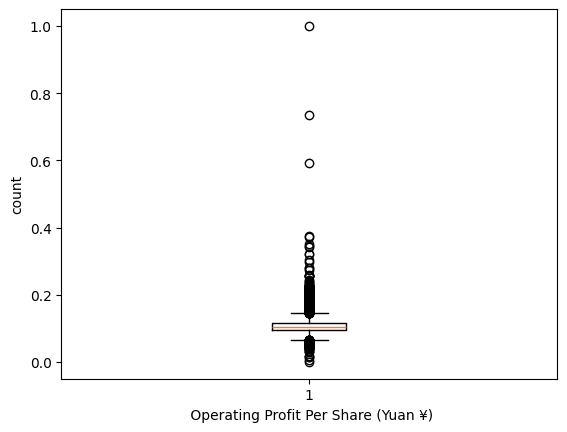

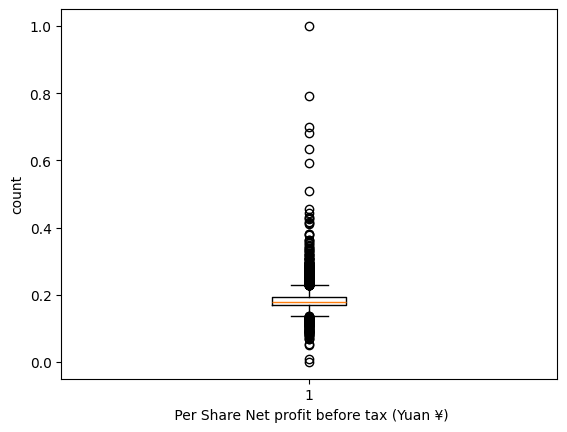

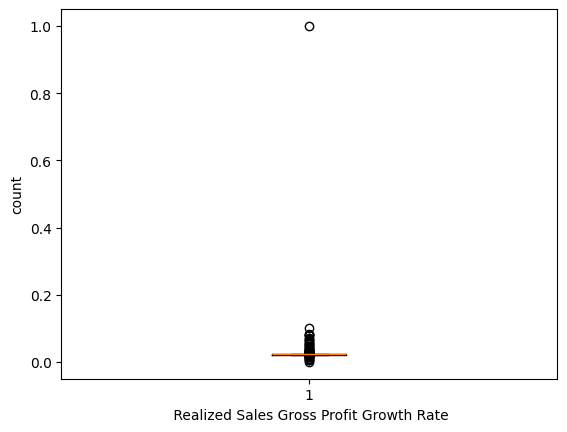

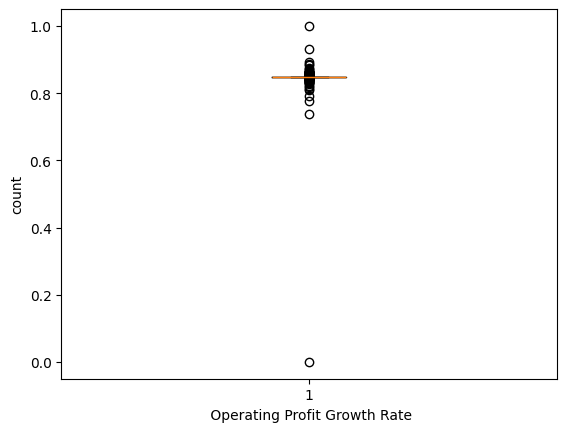

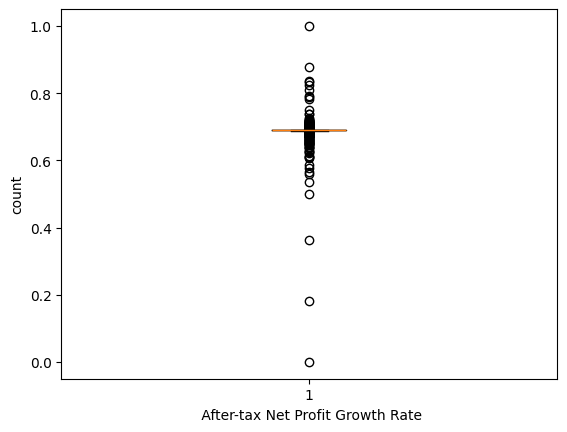

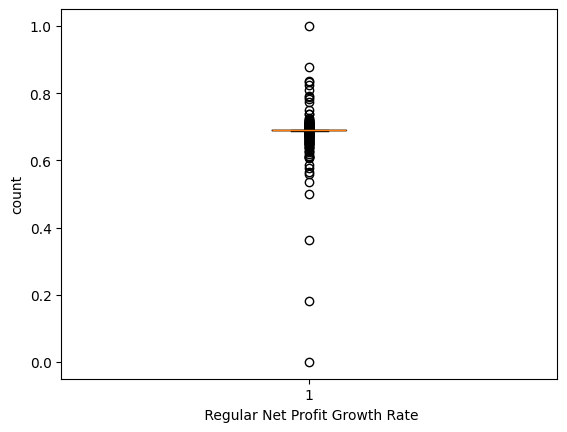

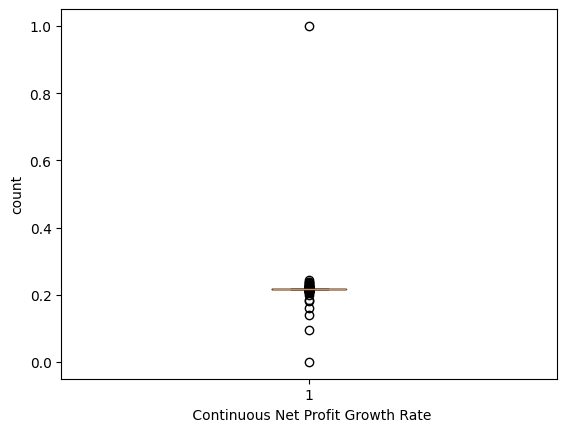

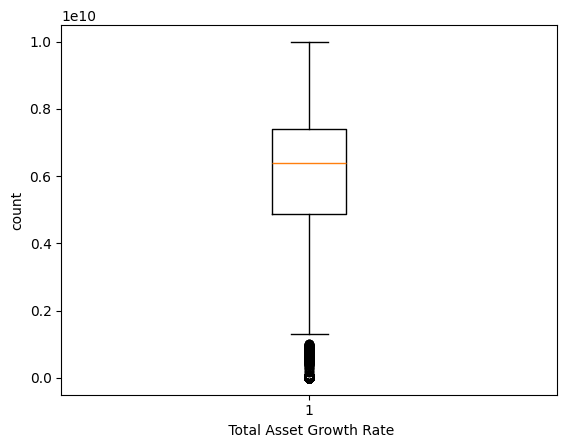

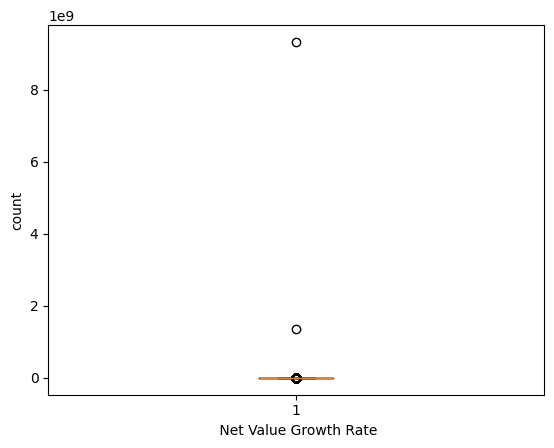

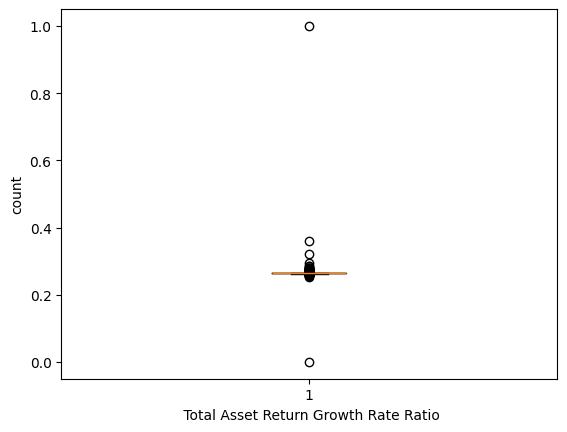

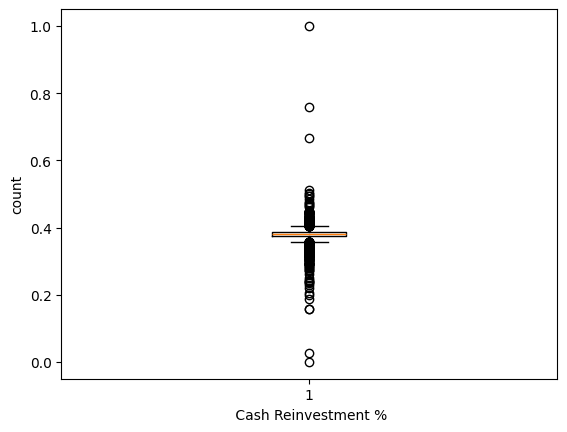

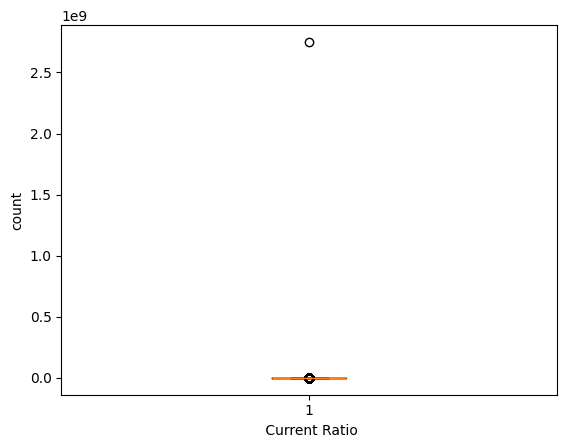

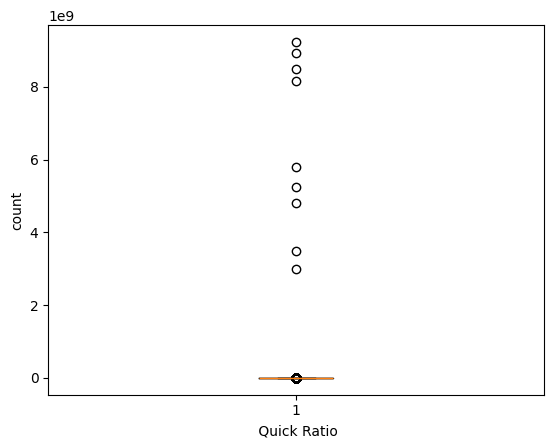

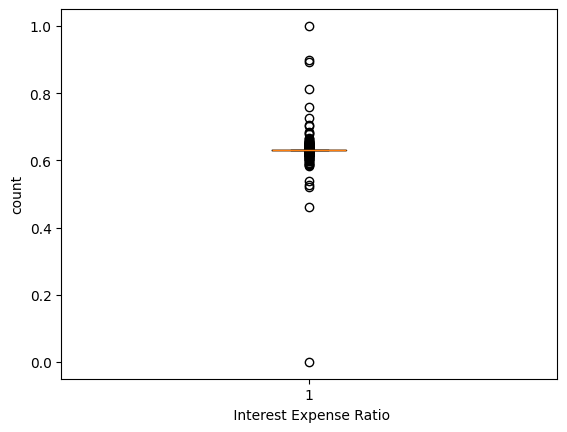

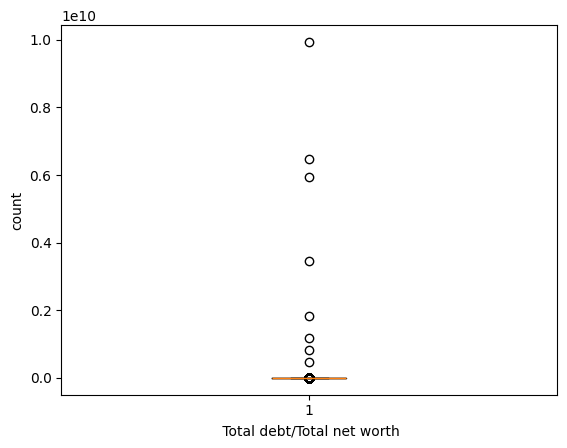

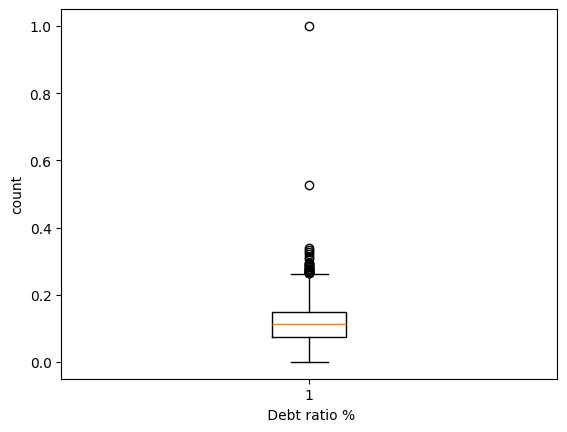

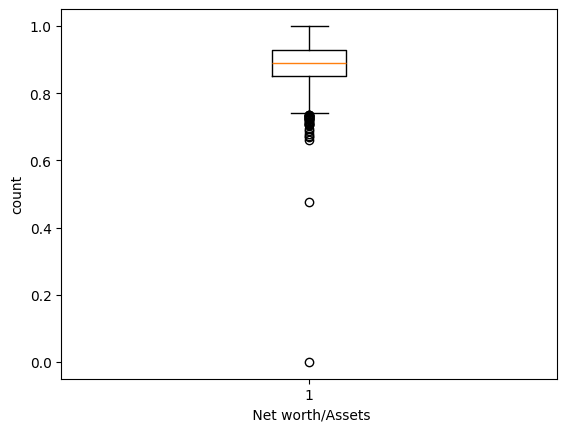

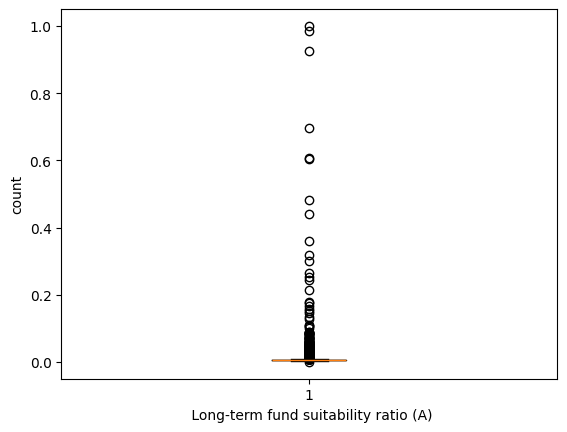

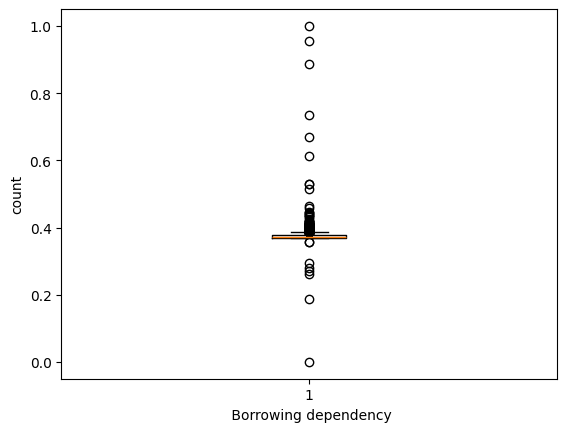

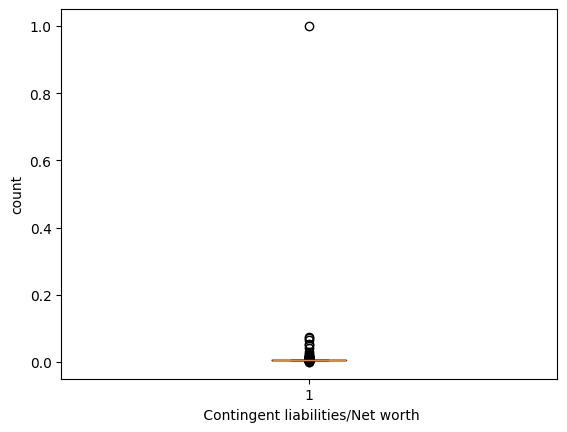

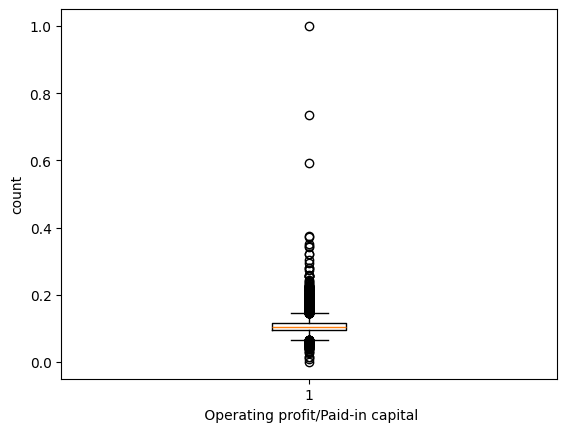

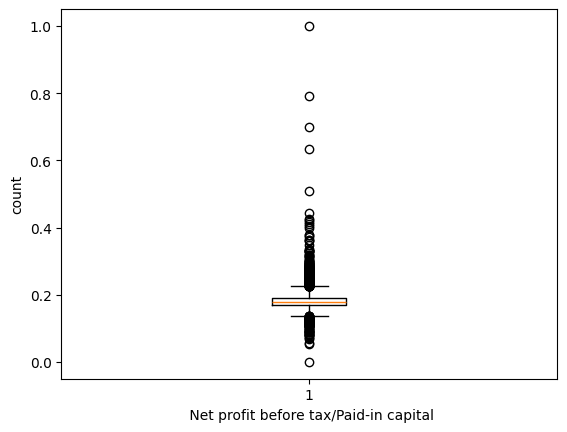

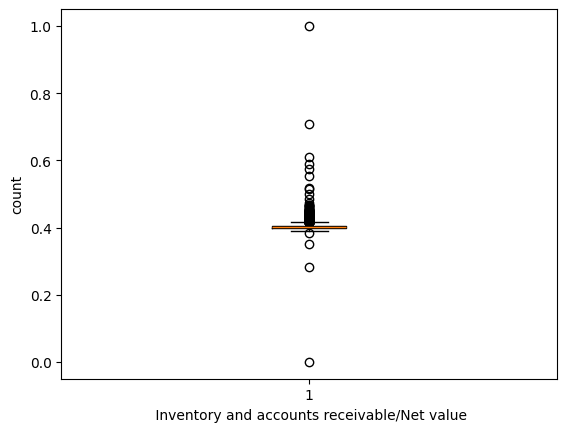

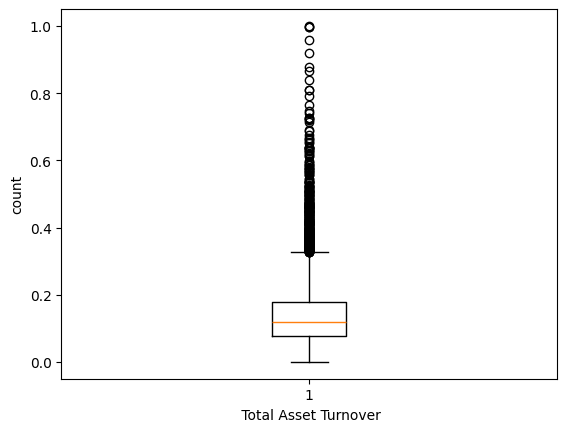

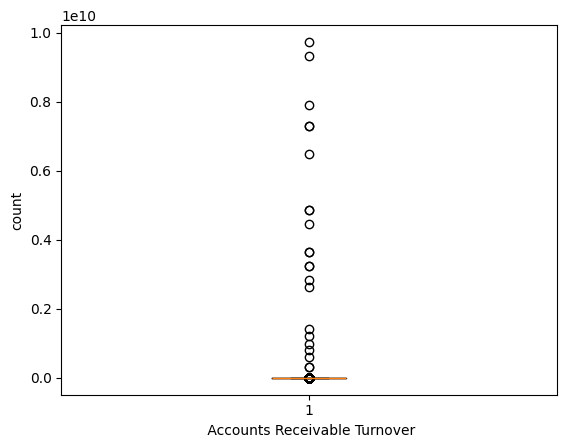

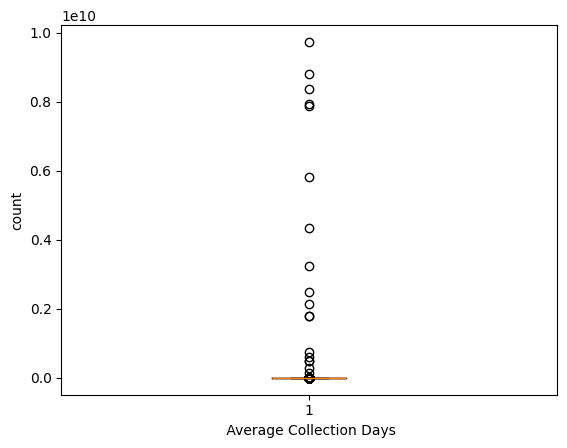

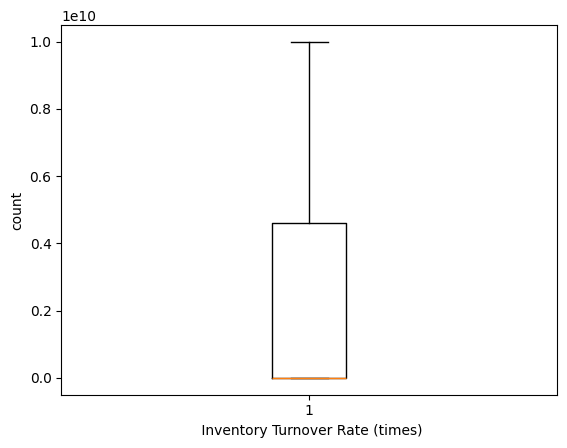

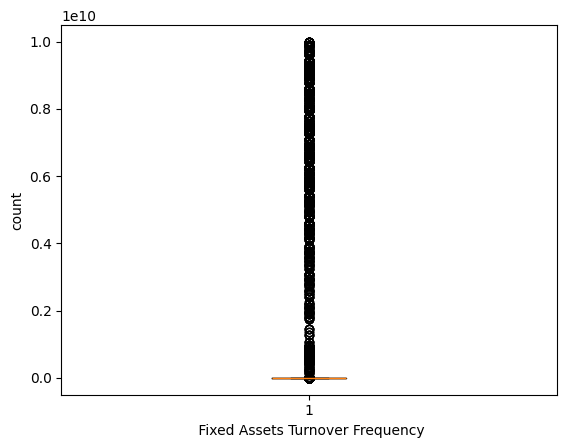

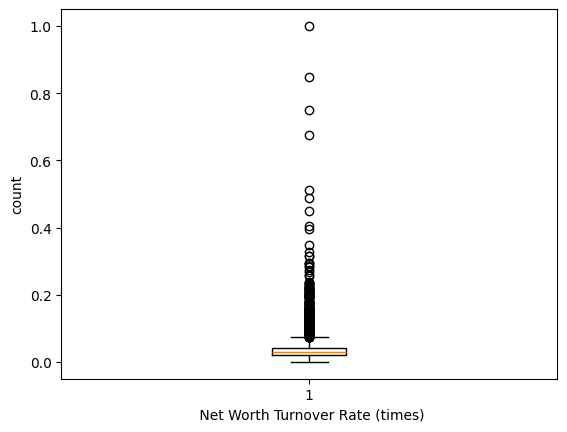

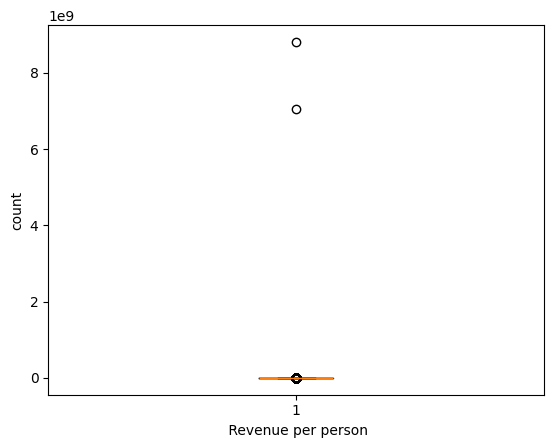

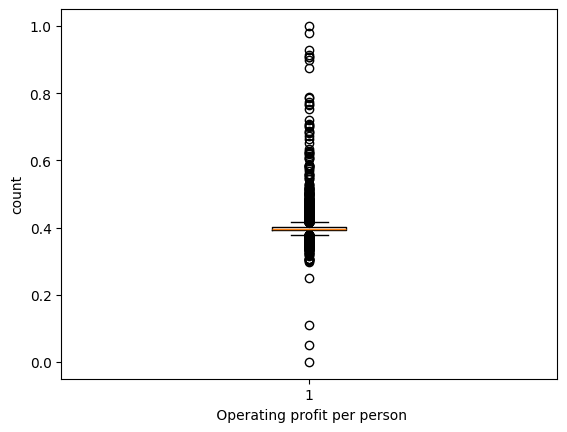

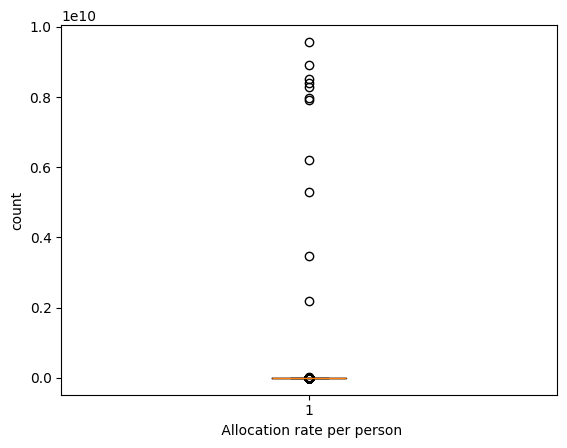

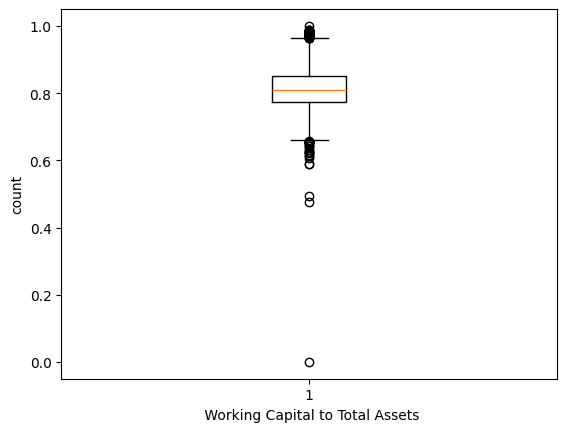

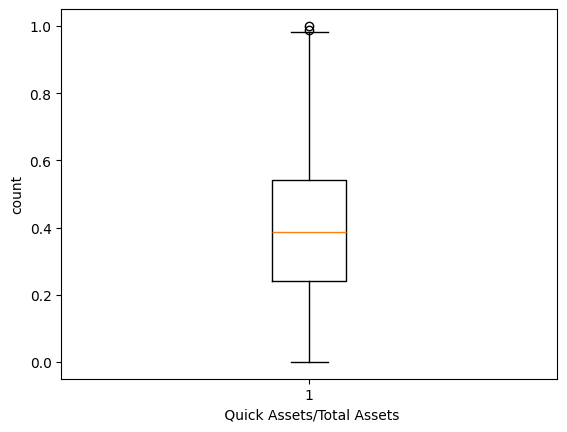

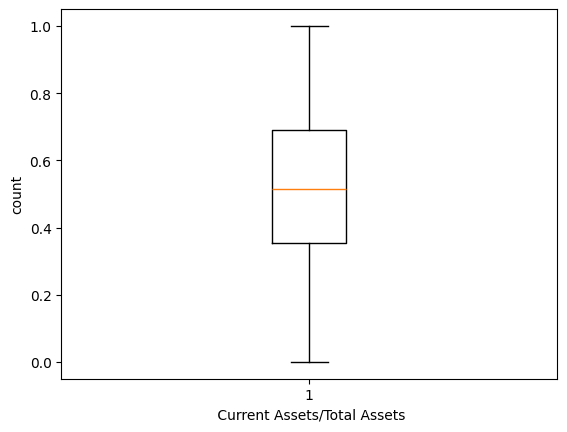

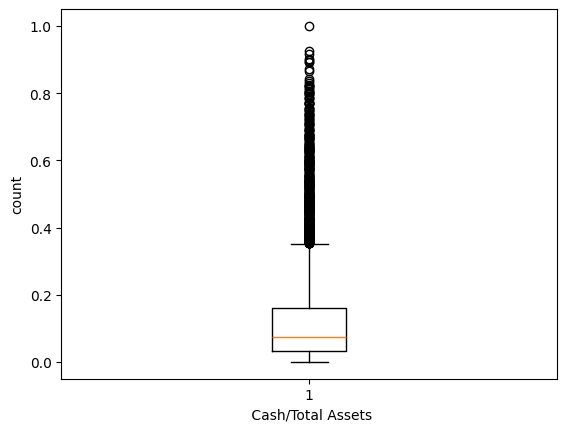

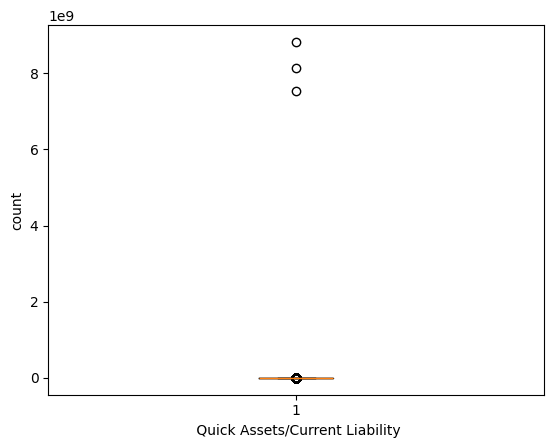

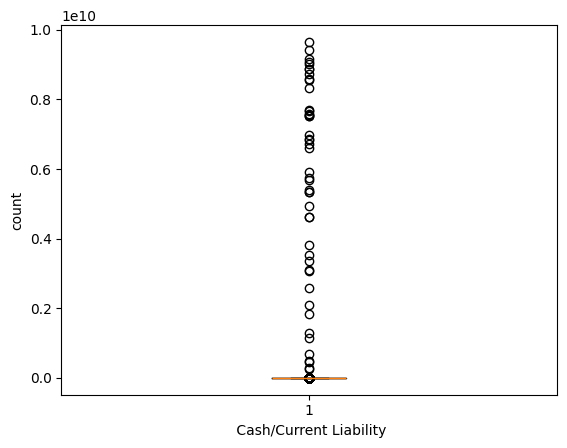

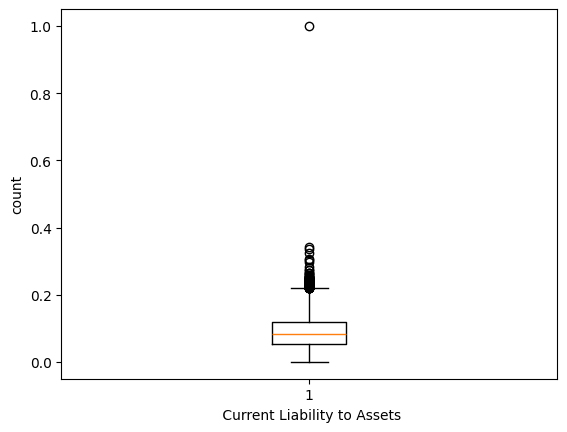

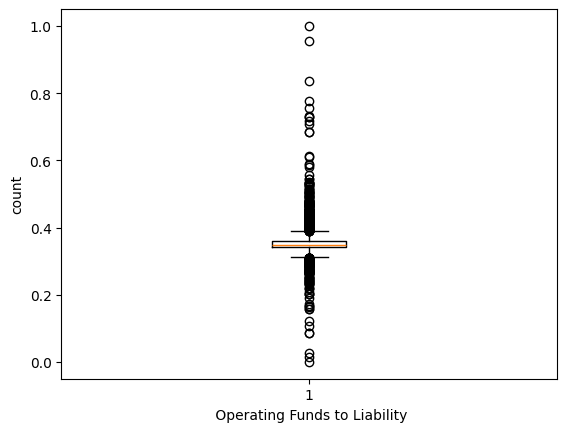

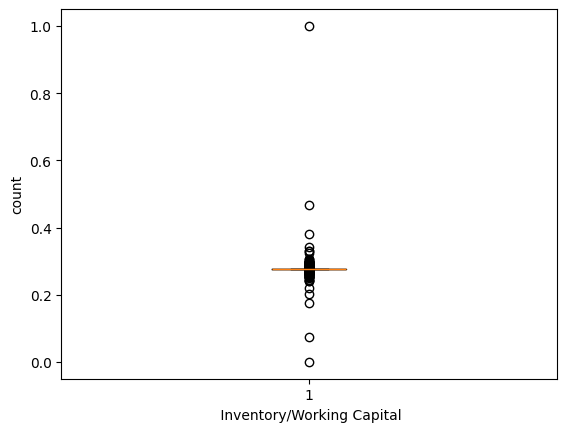

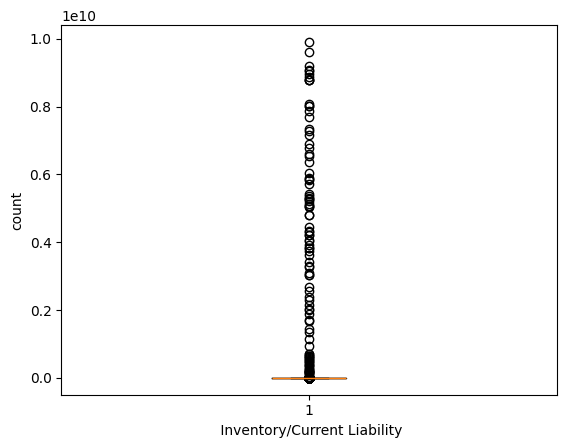

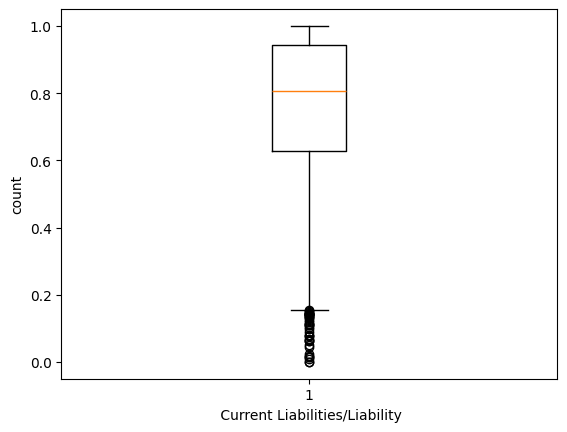

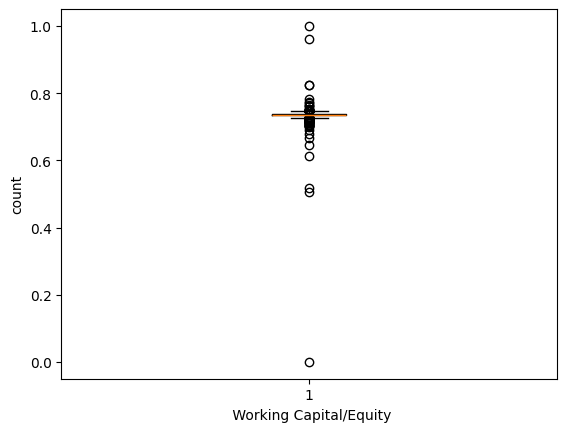

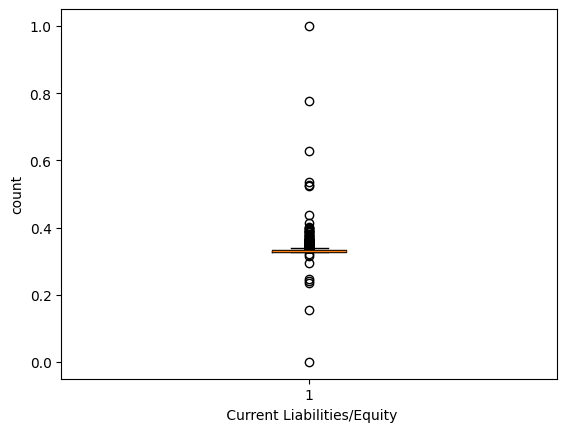

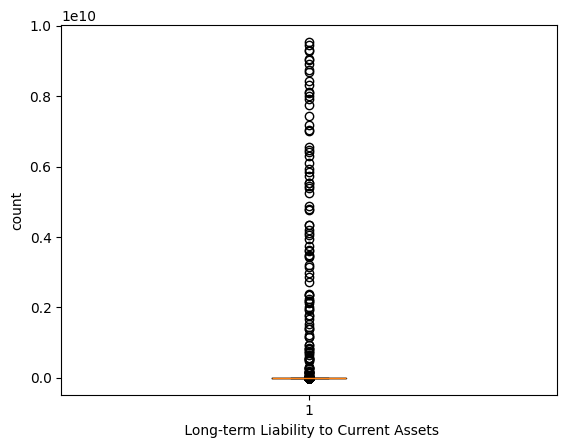

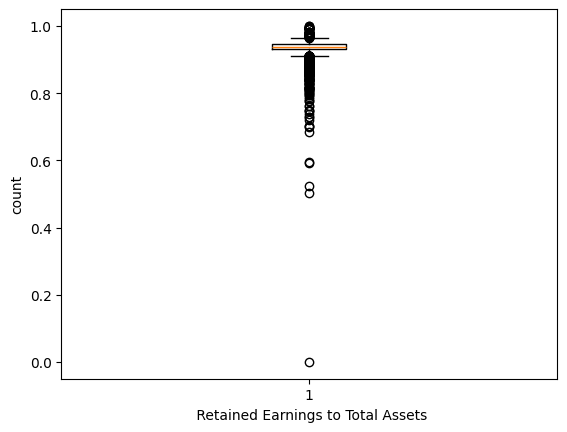

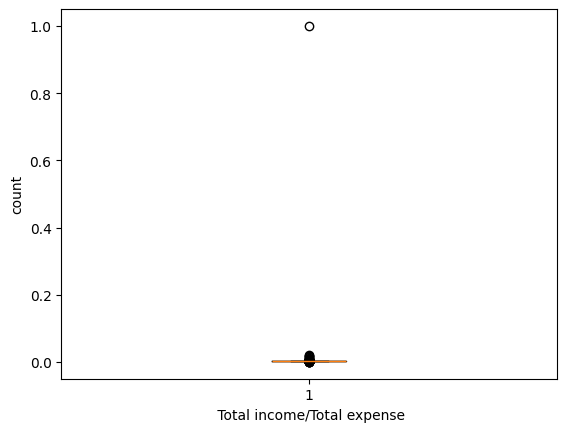

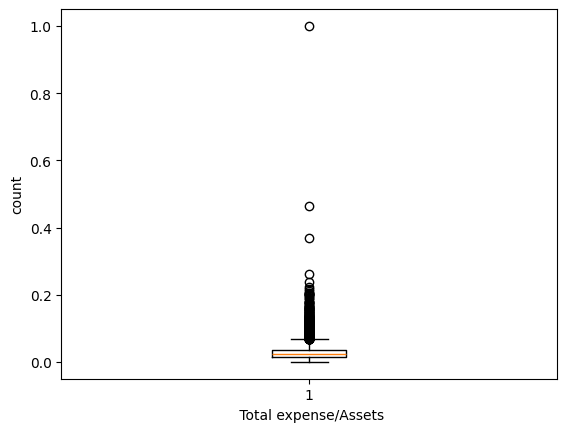

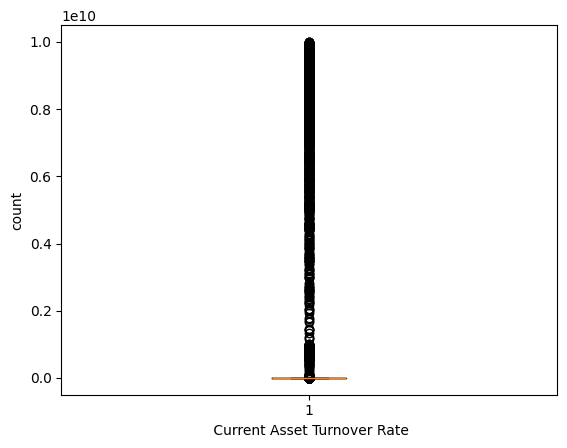

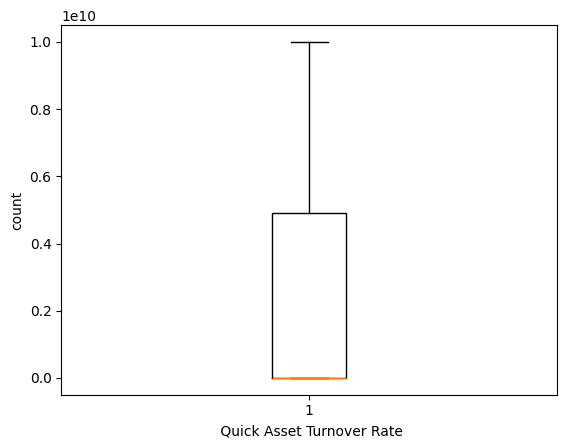

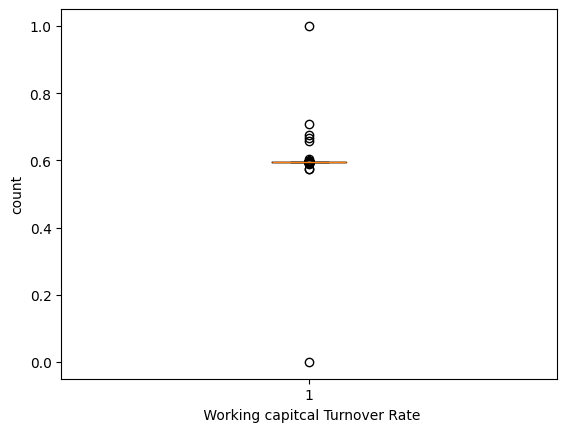

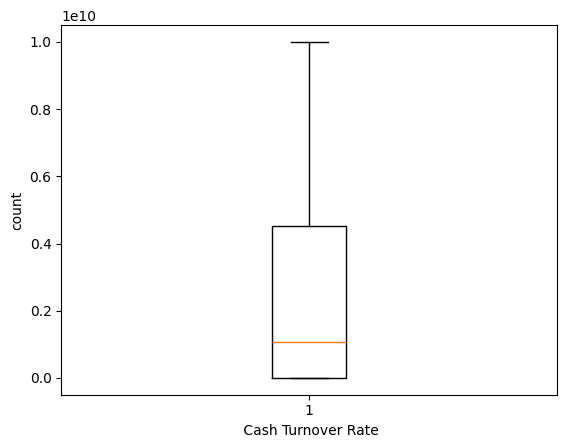

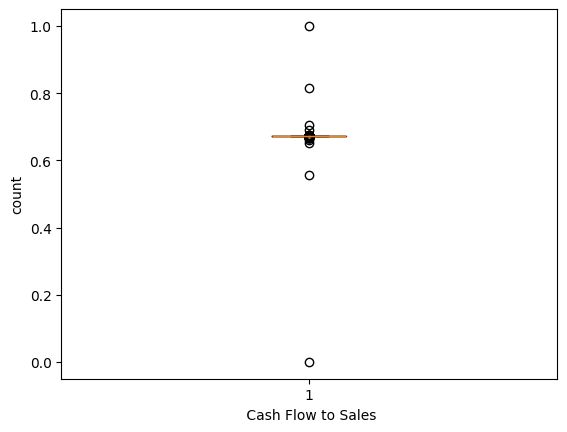

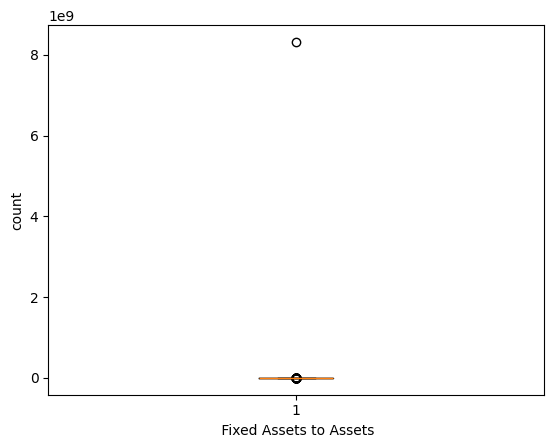

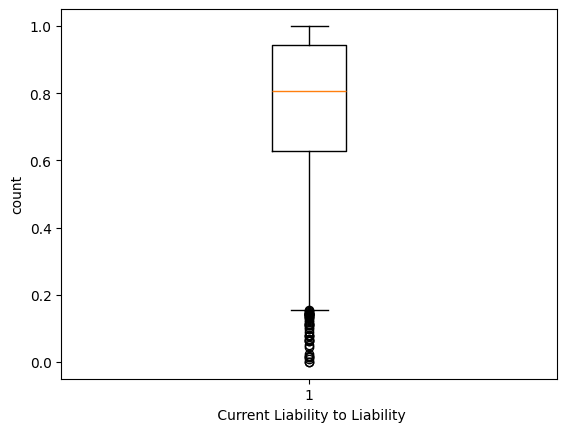

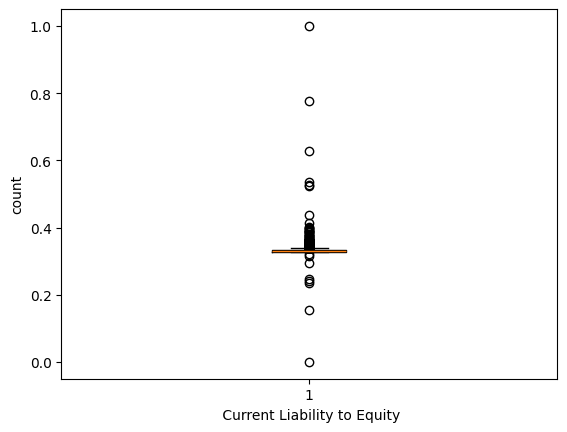

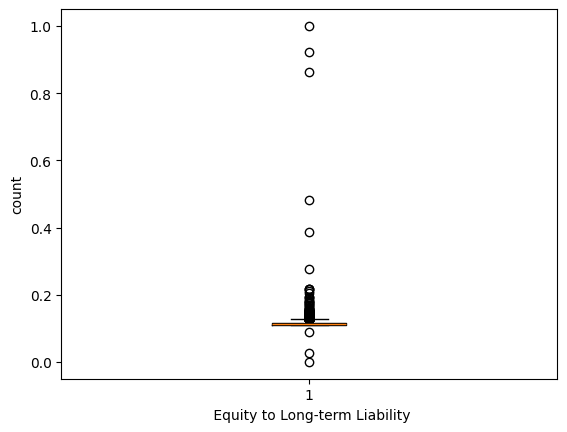

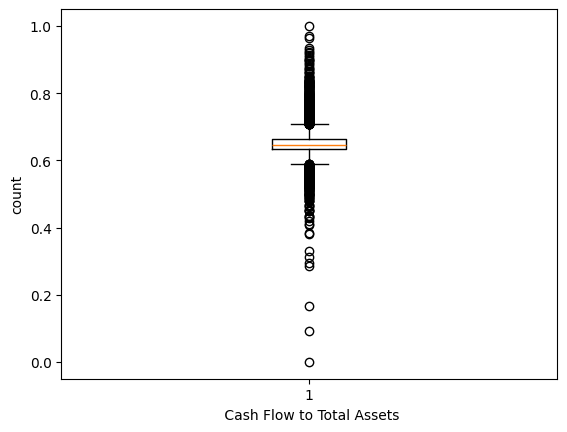

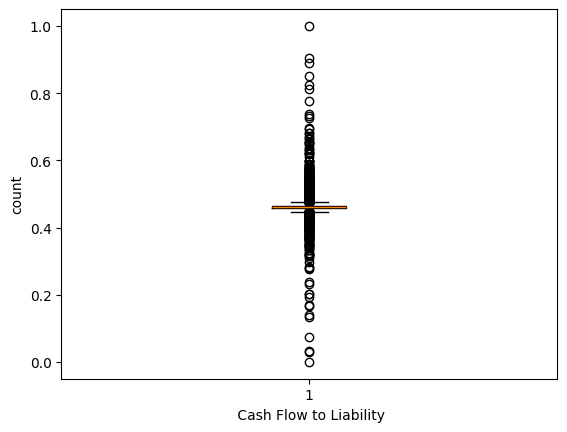

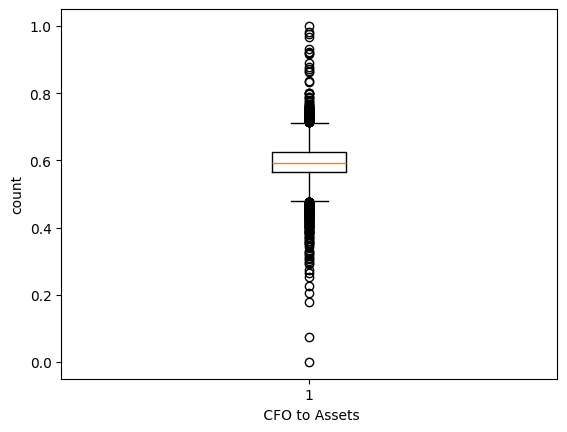

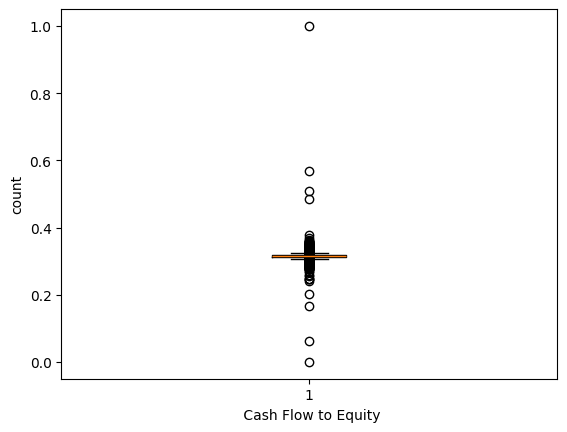

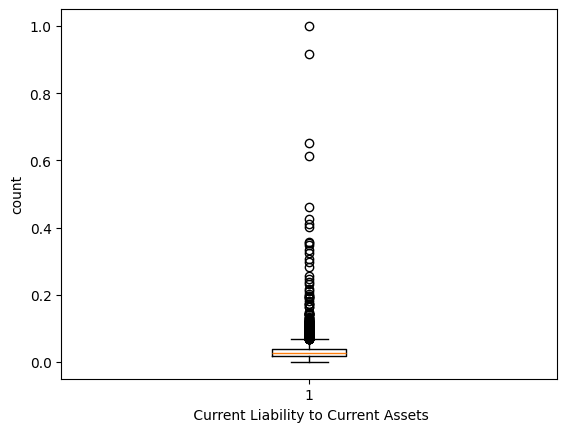

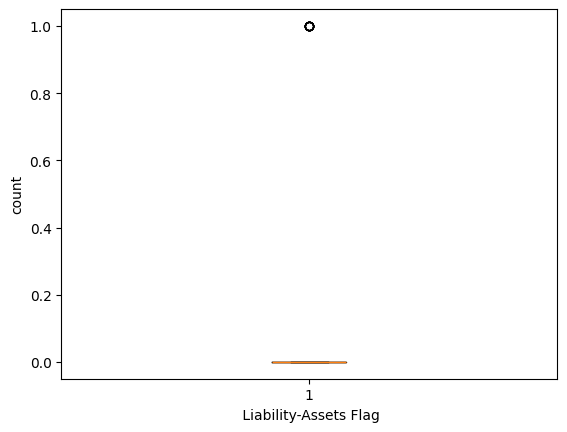

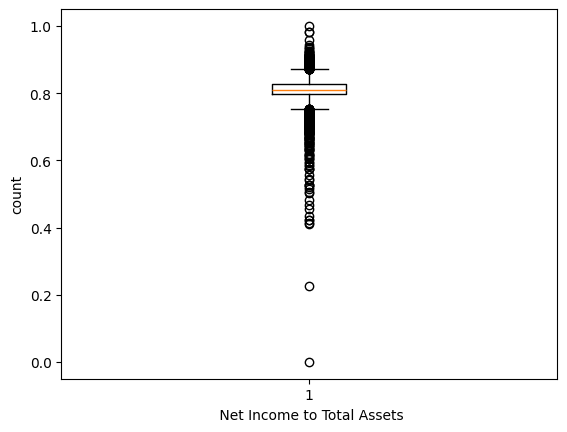

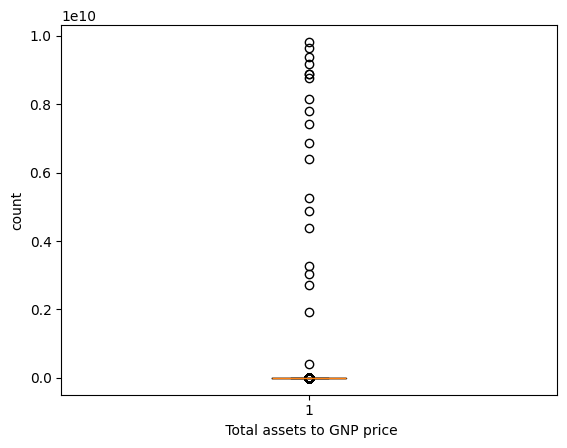

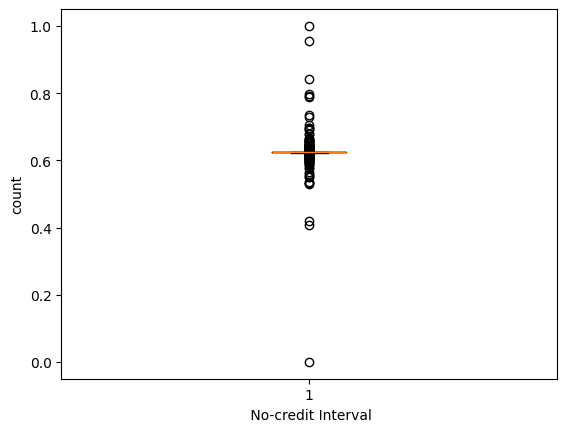

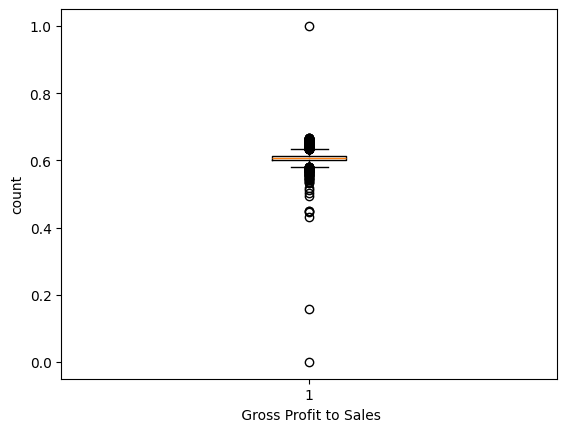

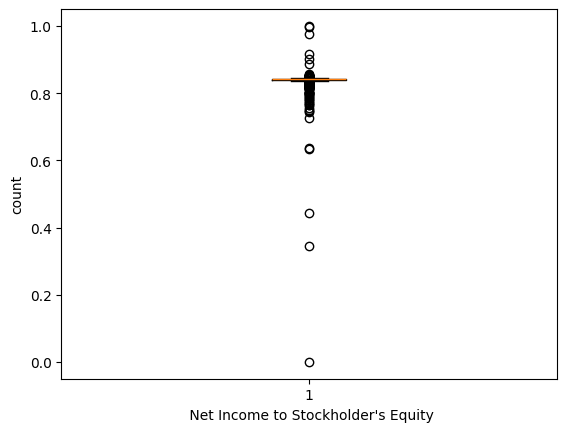

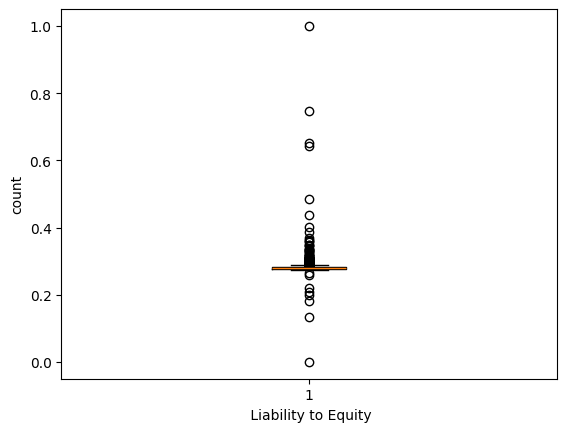

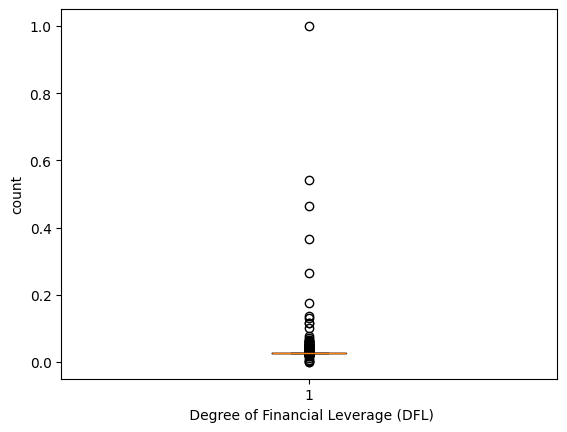

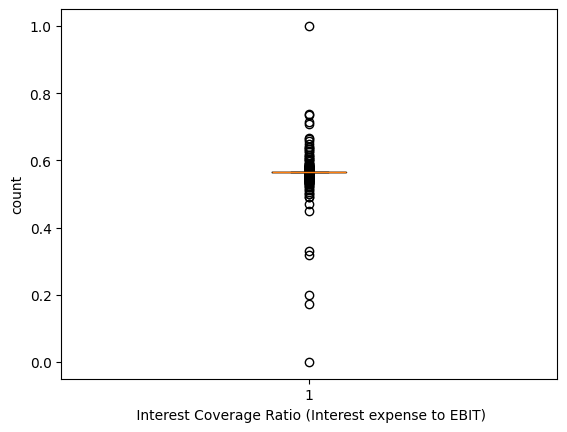

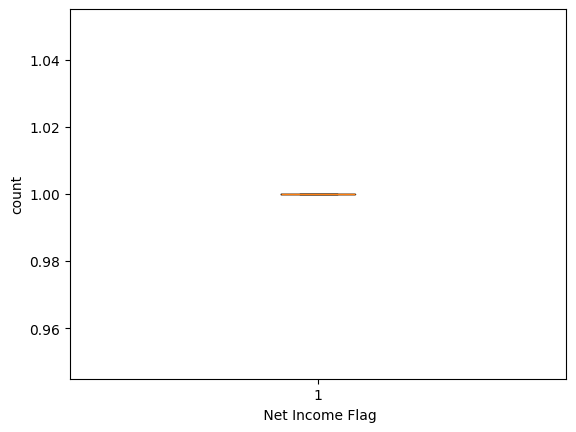

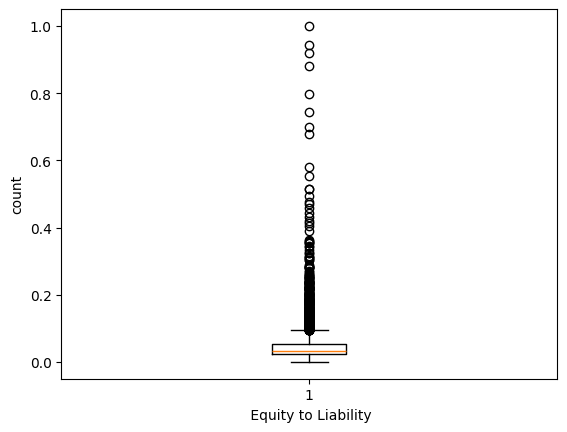

In [ ]:
for col in col_list:
  if df[col].dtype=='int64' or df[col].dtype=='float64':
    plt.boxplot(df[col])
    plt.xlabel(col)
    plt.ylabel('count')
    plt.show()


In [ ]:
df.shape

(6819, 96)

In [ ]:
for col in col_list:
  q1=df[col].quantile(0.25)
  q3=df[col].quantile(0.75)
  iqr=q3-q1
  df=df[(df[col]>= (q1-1.5*iqr)) & (df[col]<= (q3+1.5*iqr))]

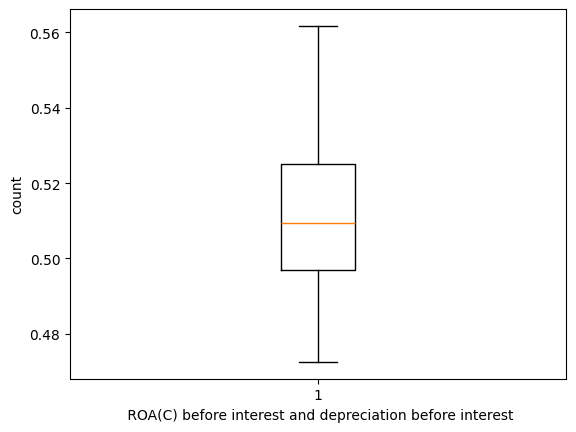

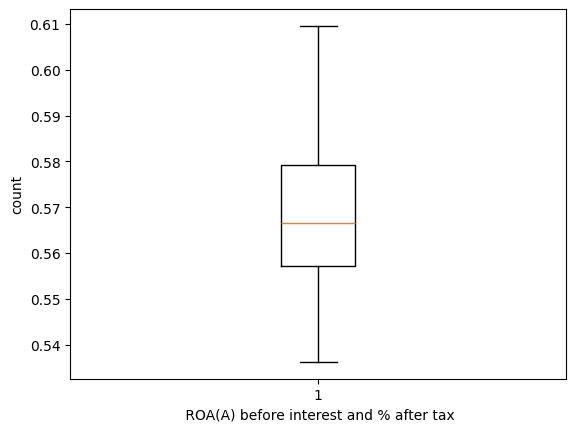

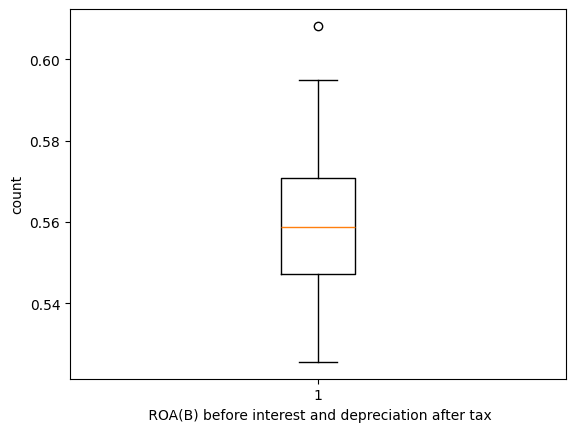

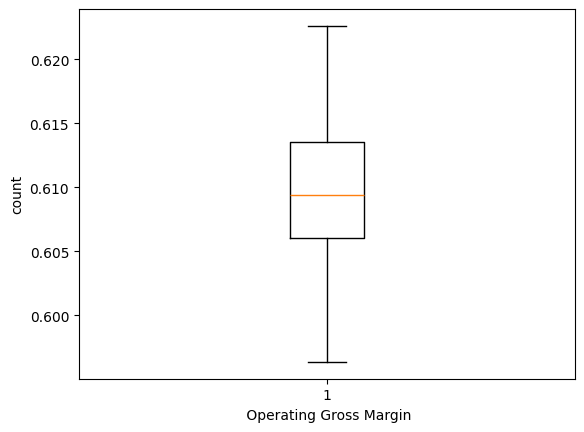

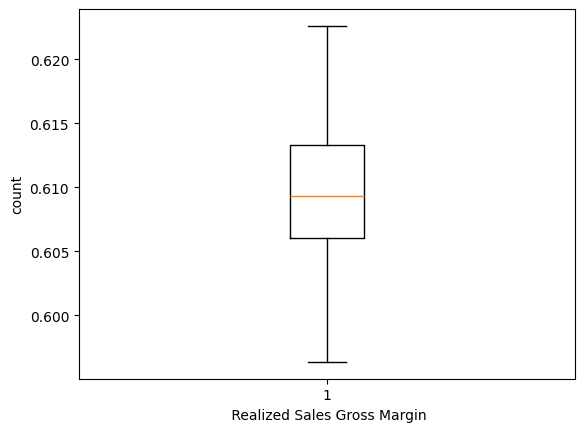

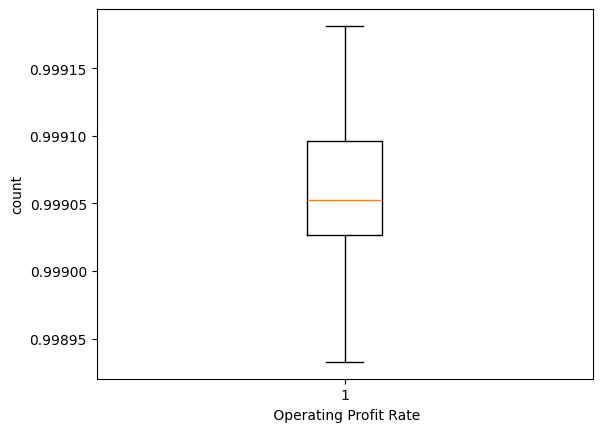

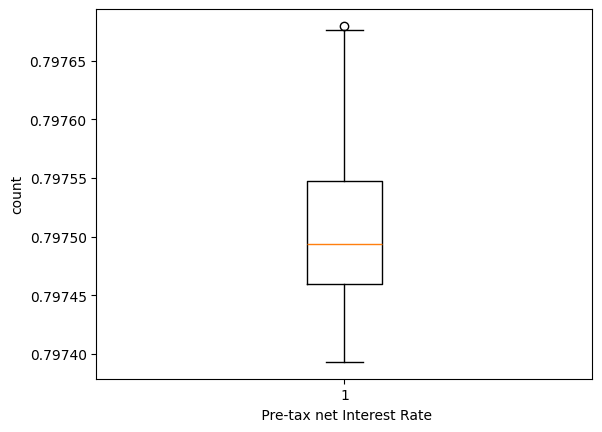

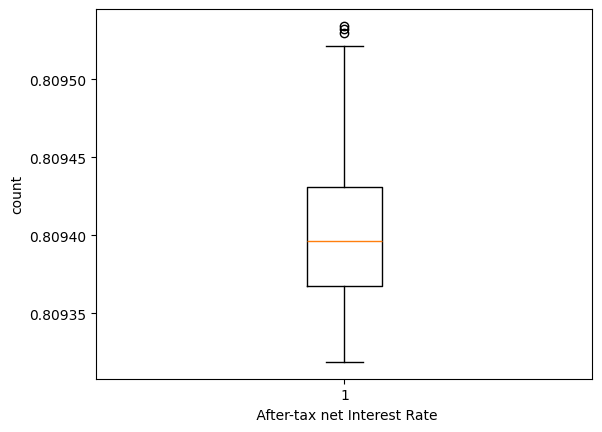

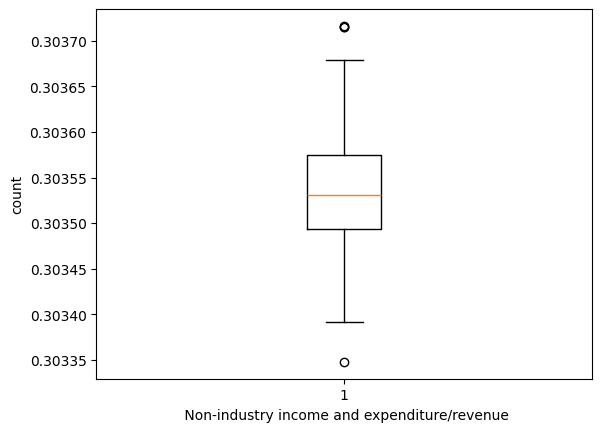

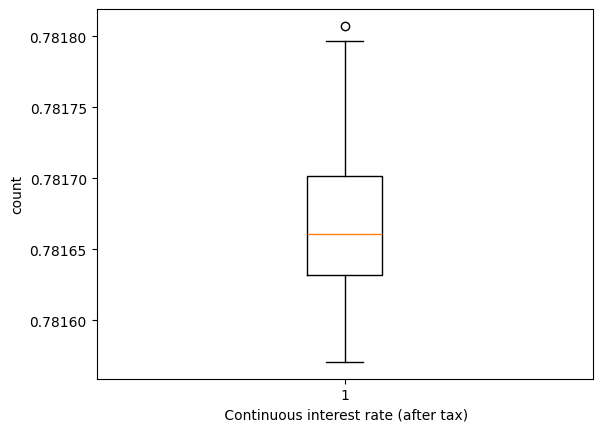

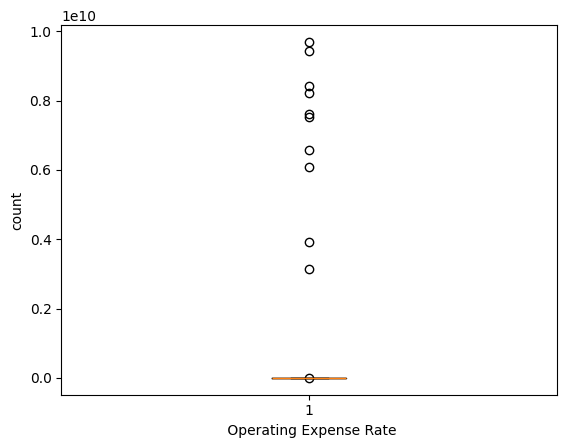

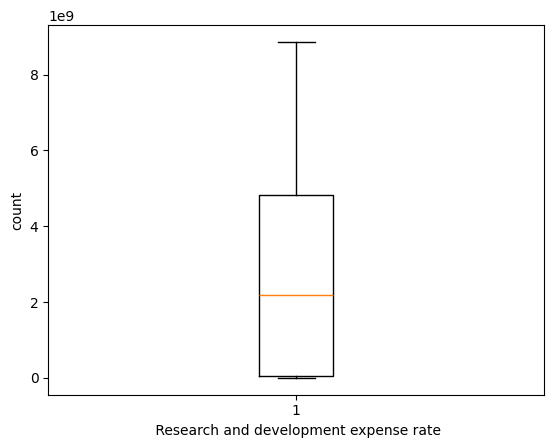

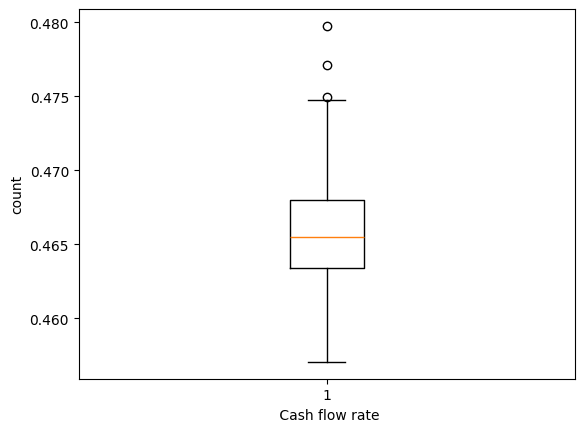

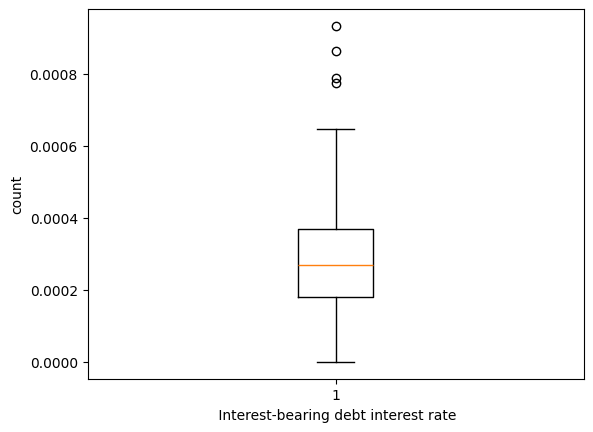

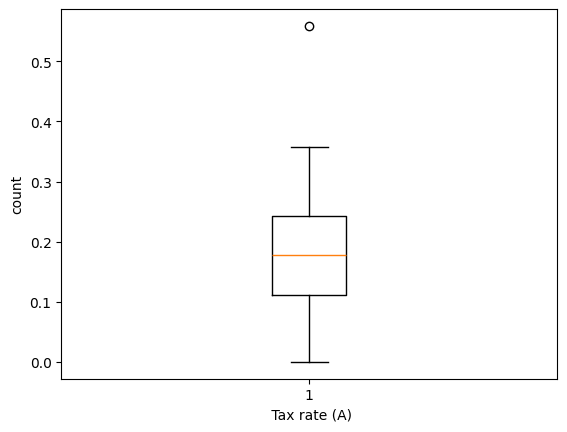

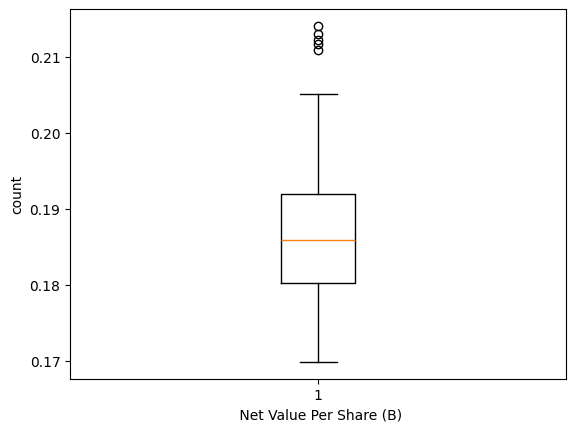

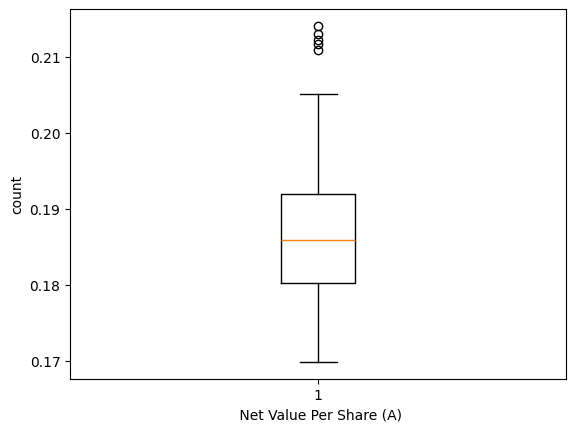

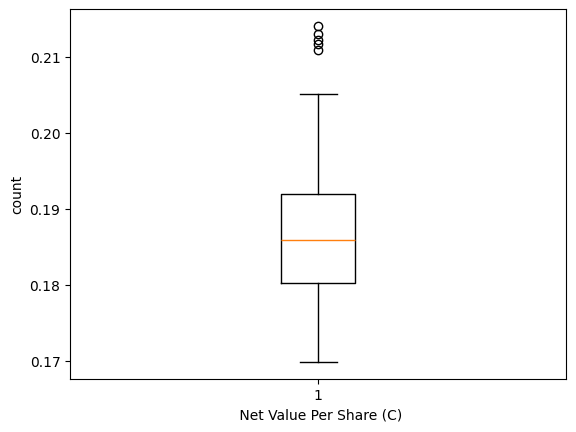

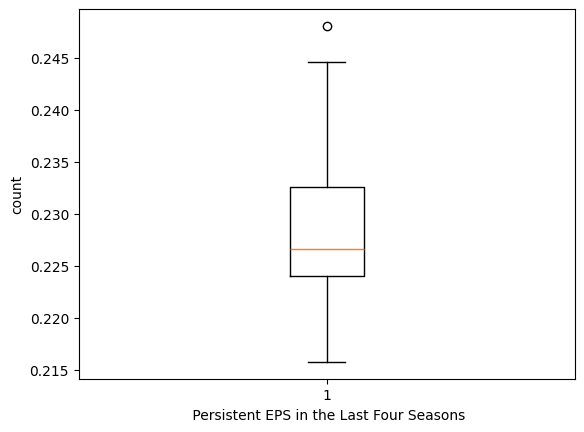

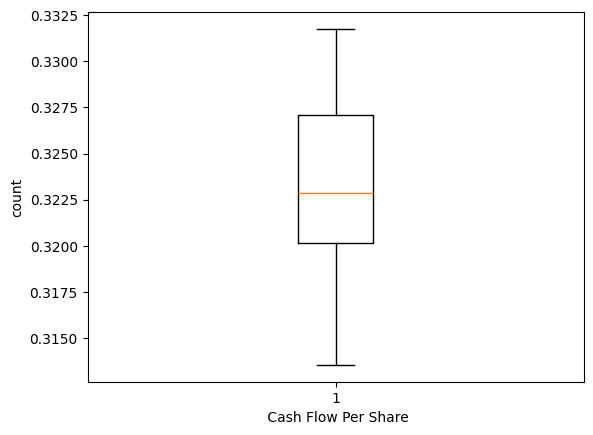

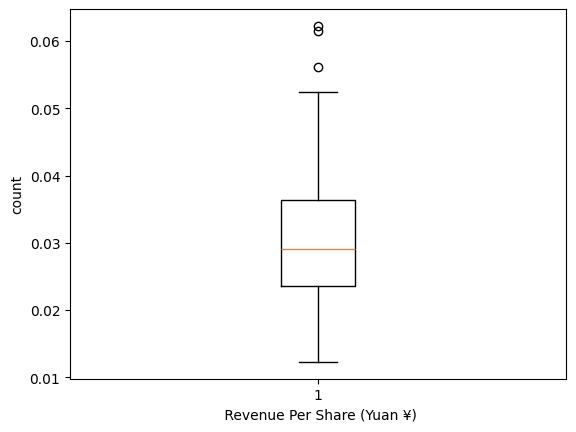

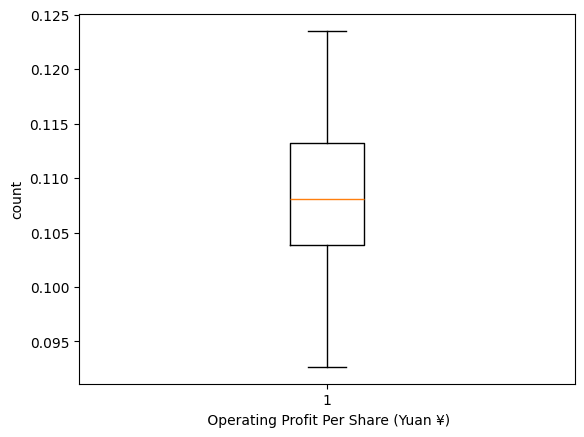

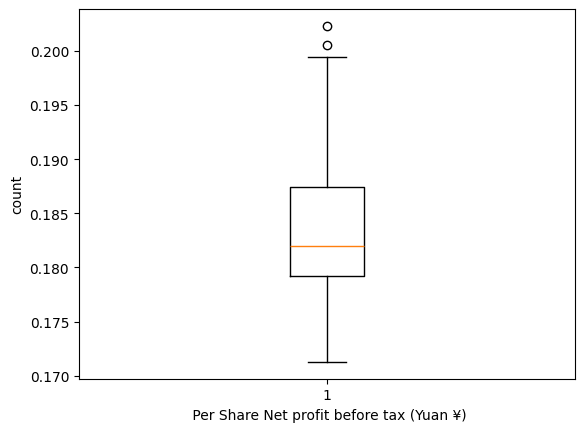

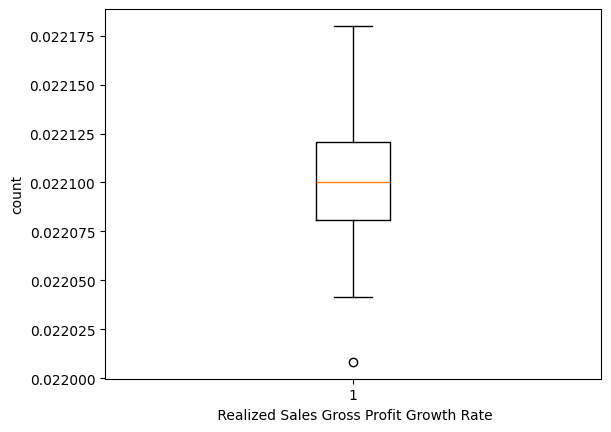

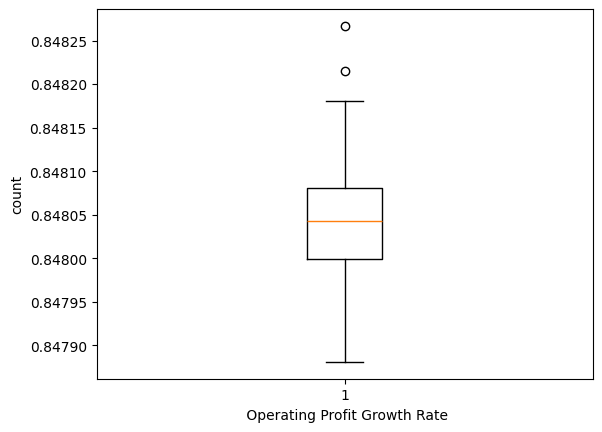

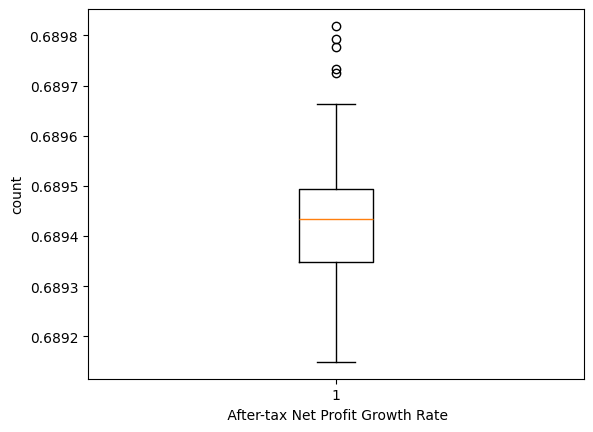

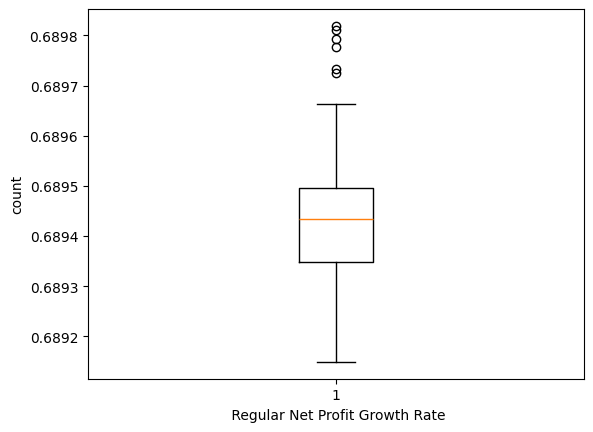

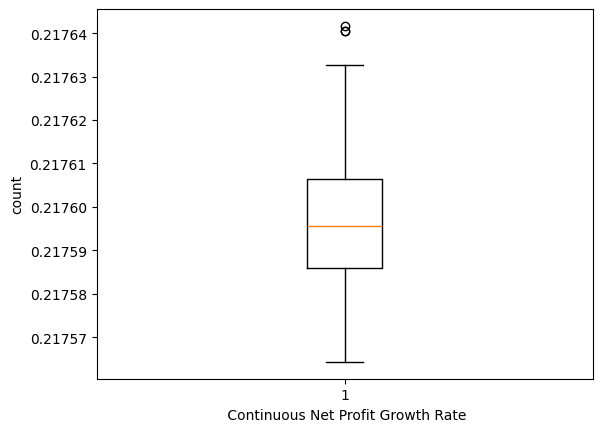

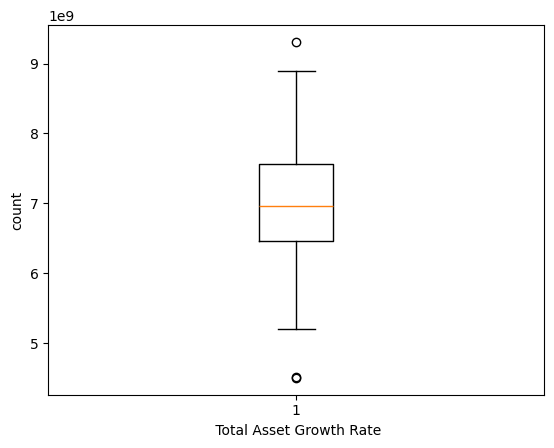

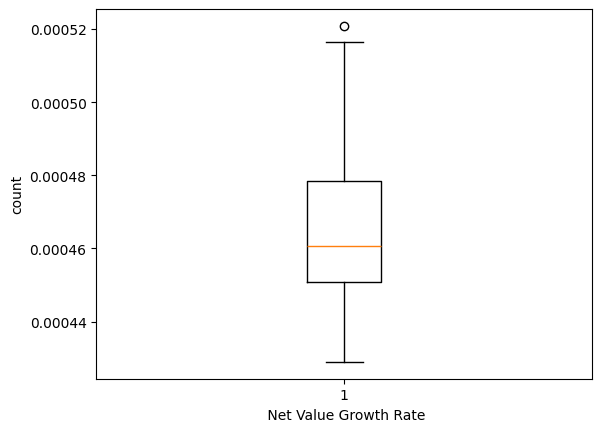

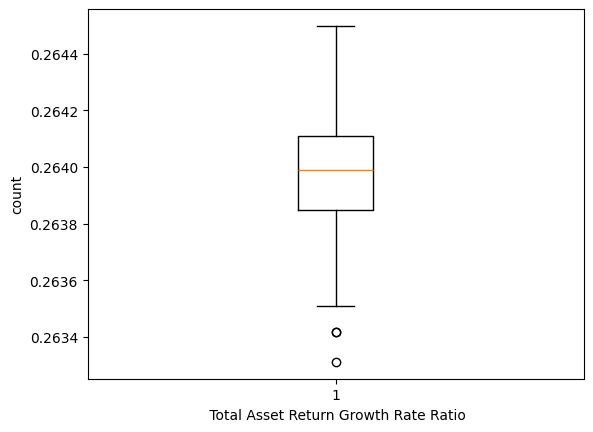

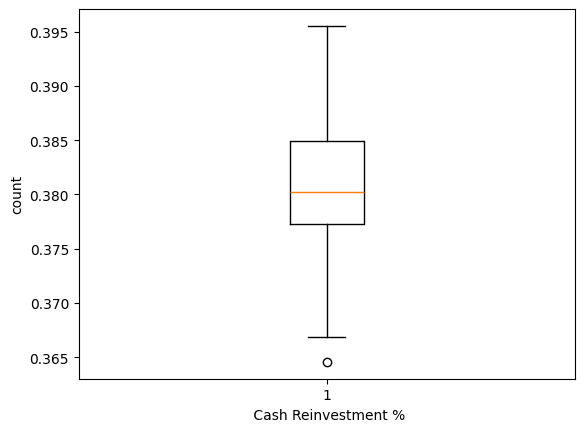

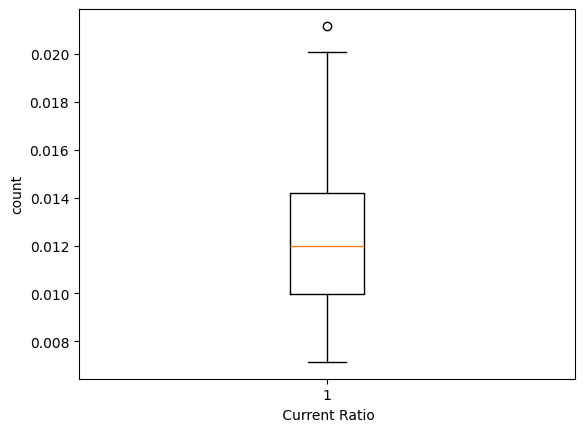

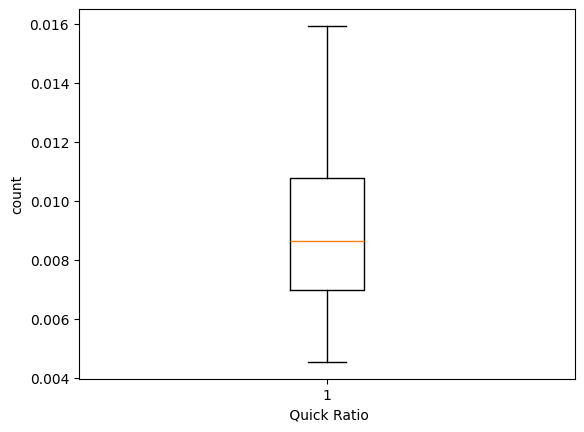

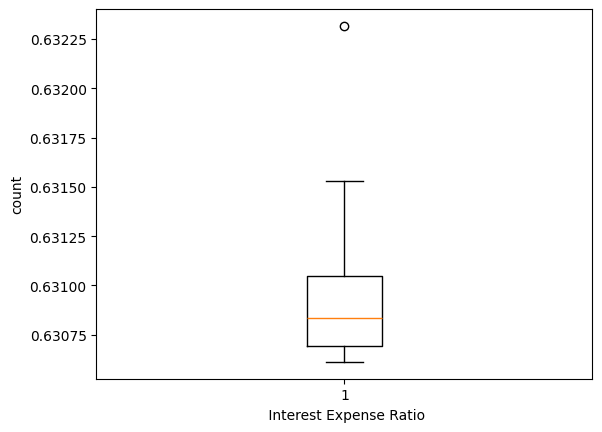

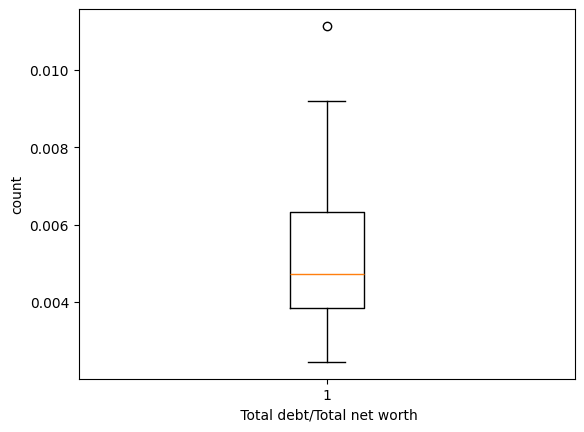

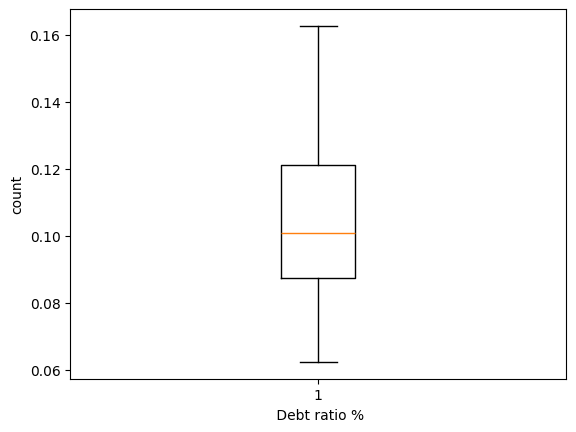

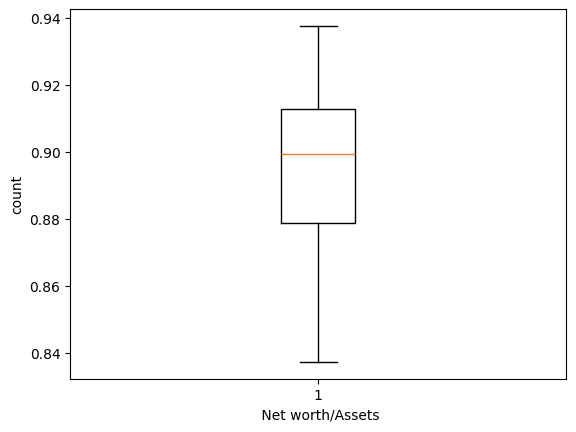

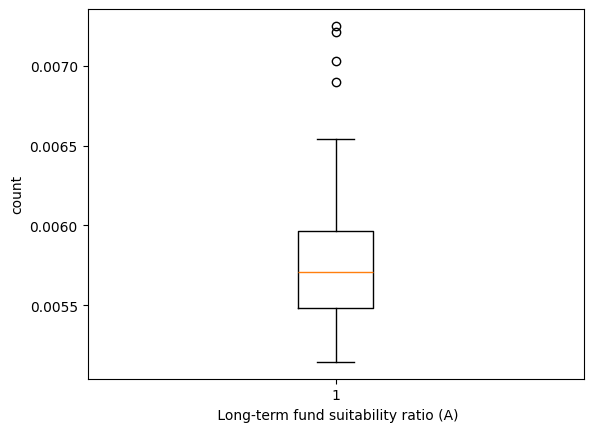

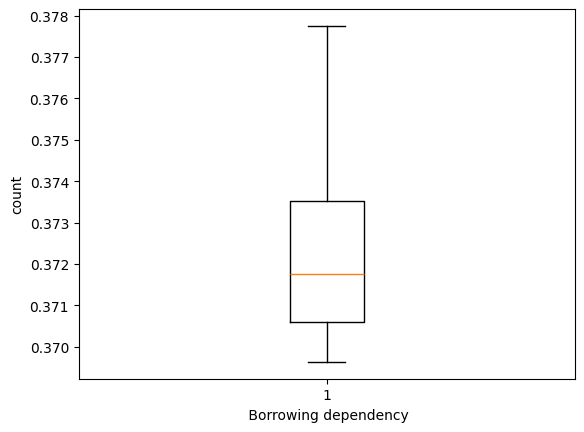

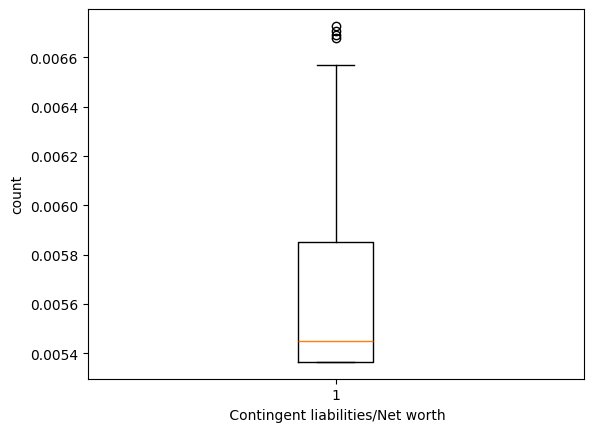

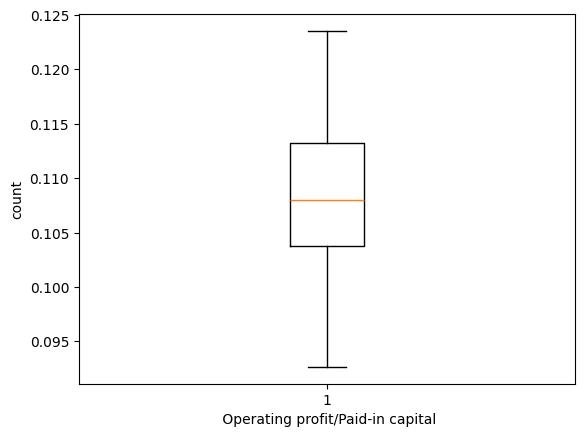

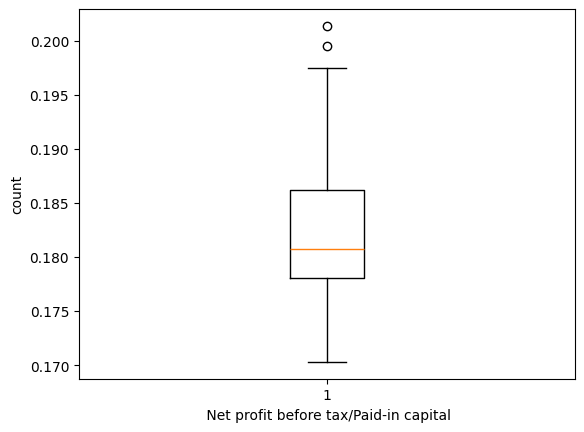

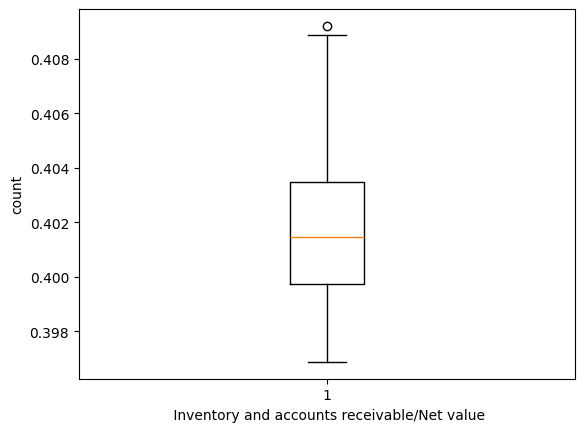

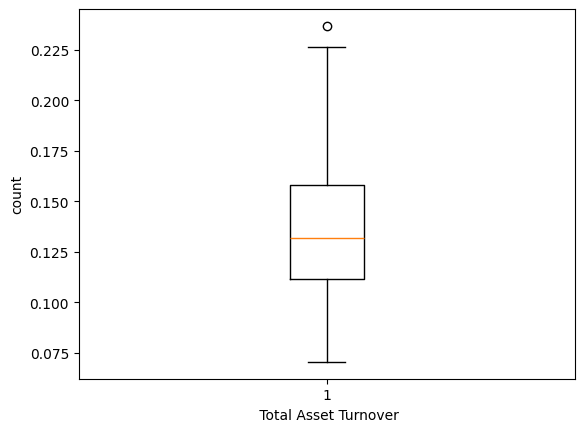

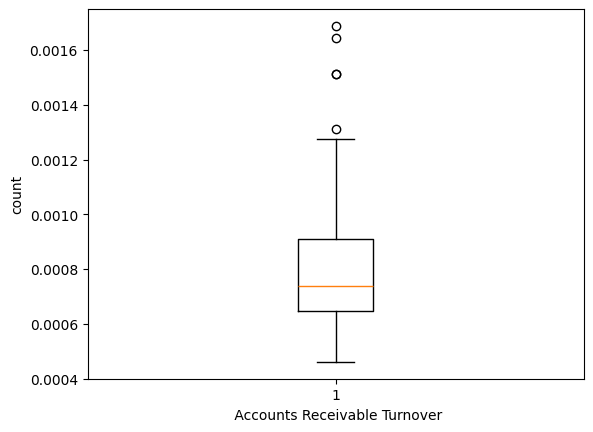

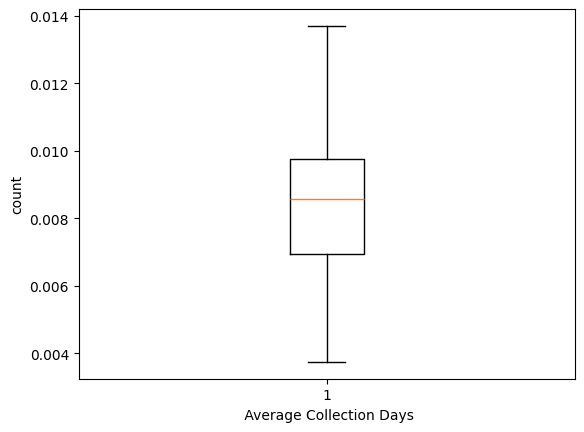

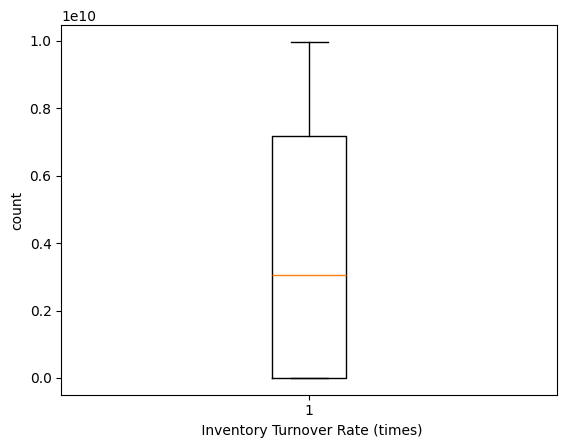

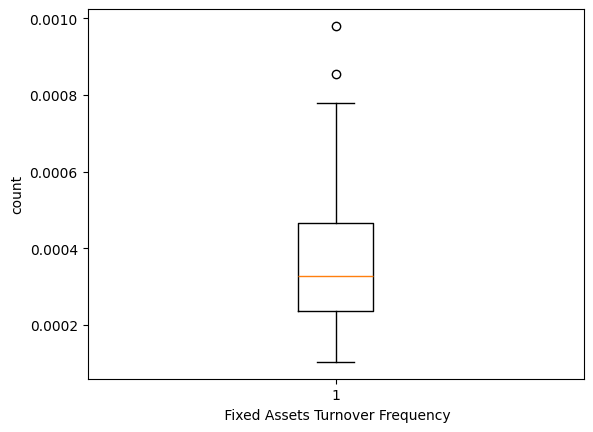

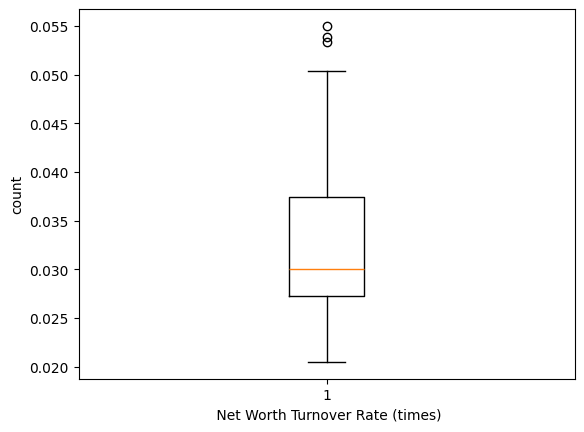

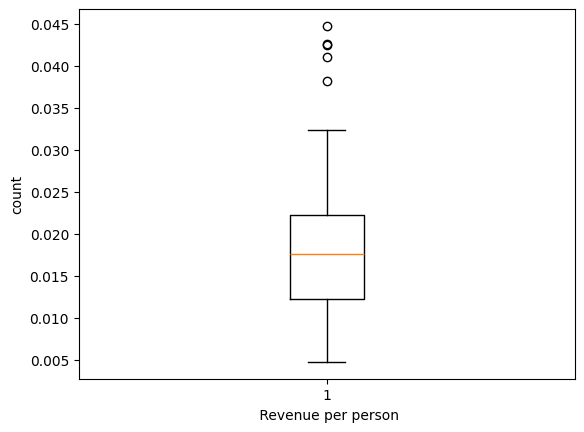

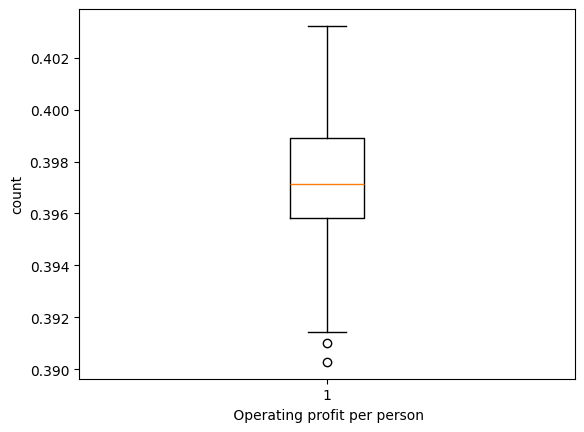

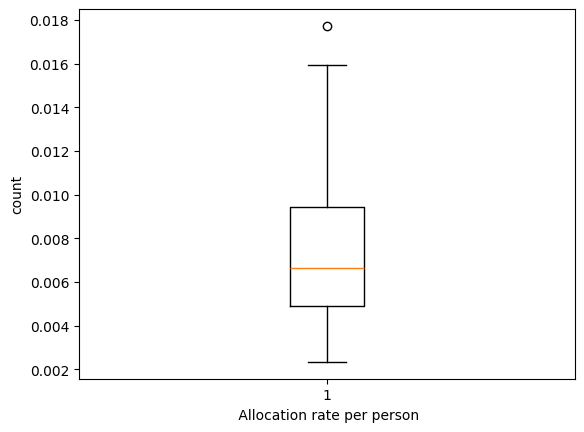

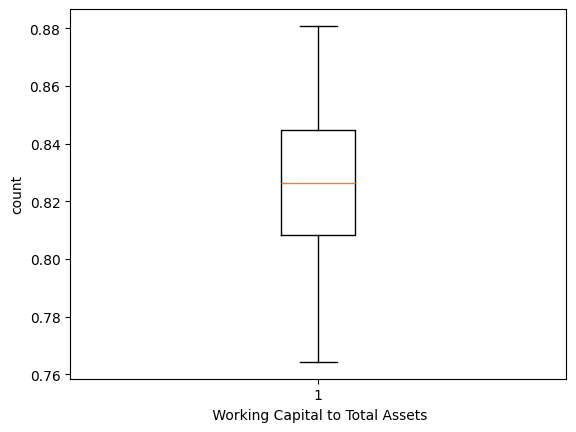

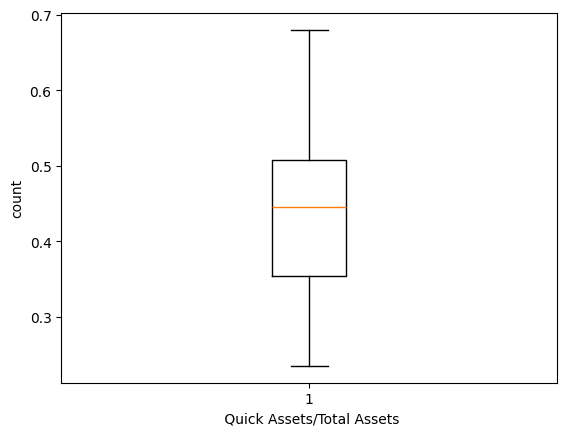

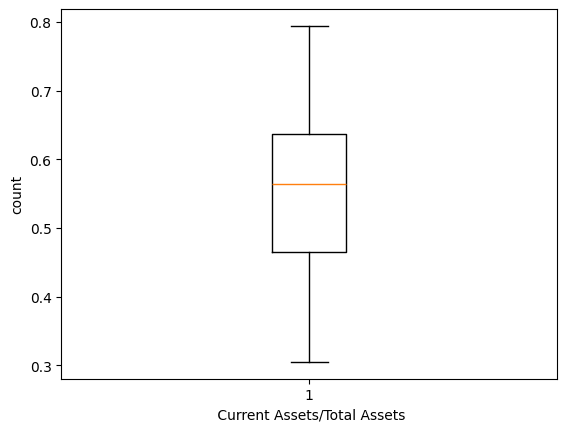

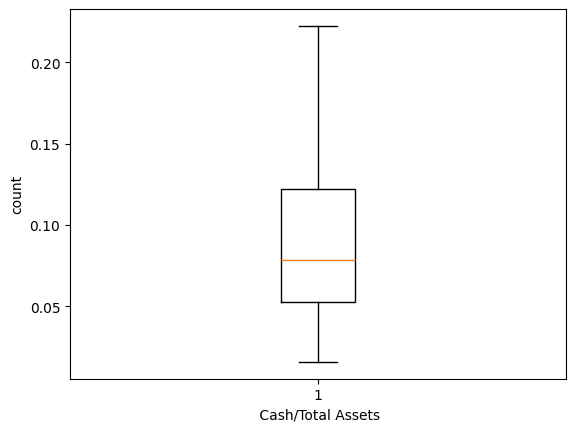

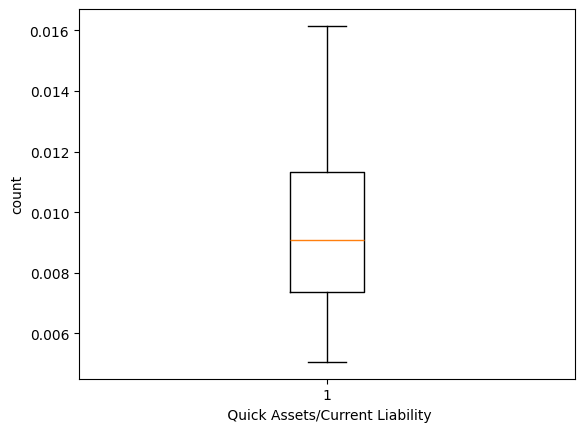

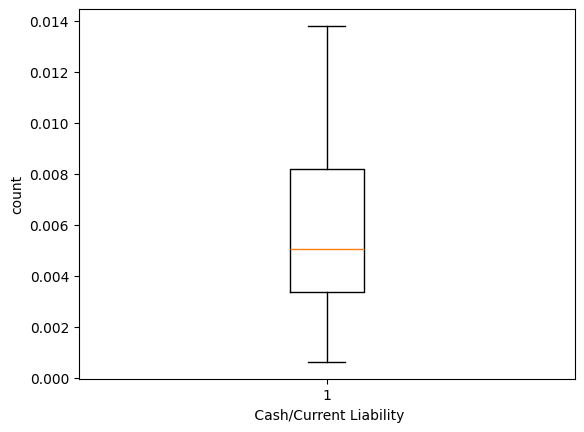

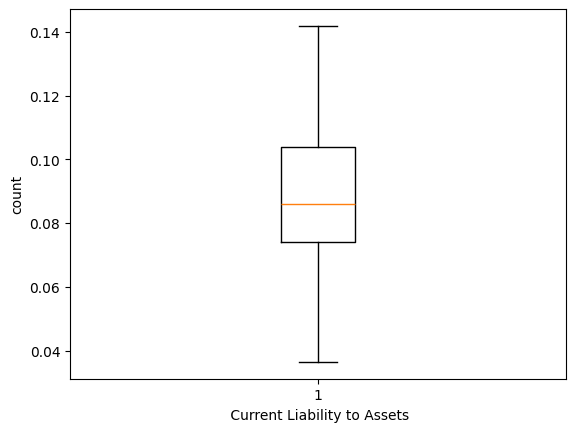

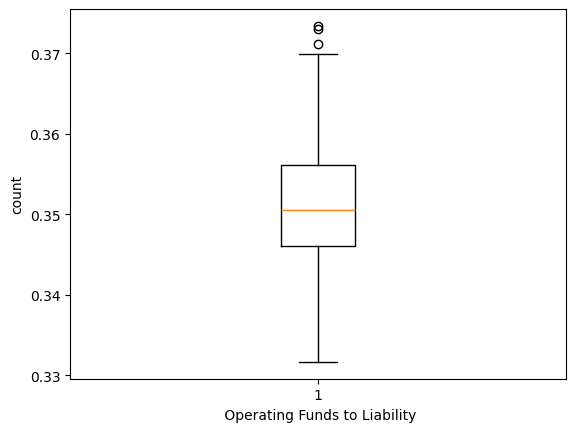

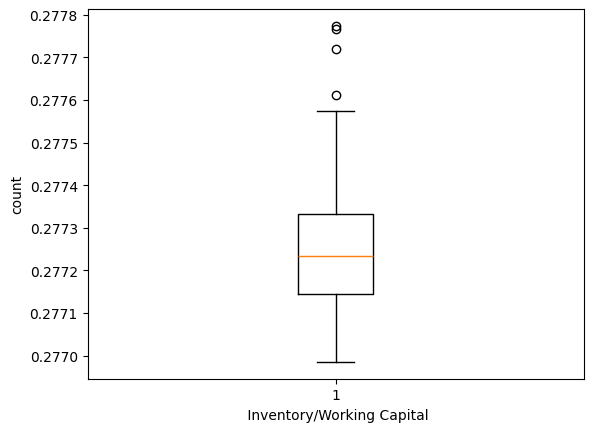

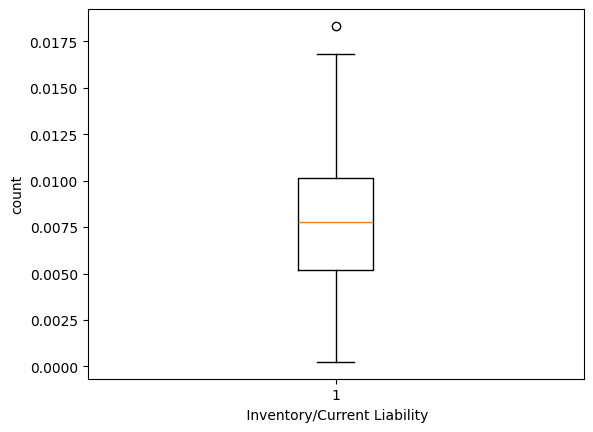

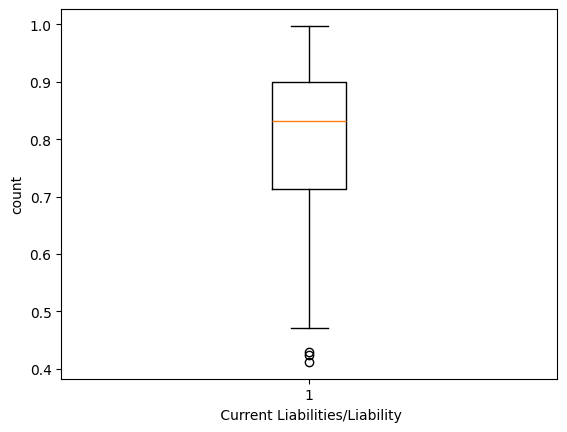

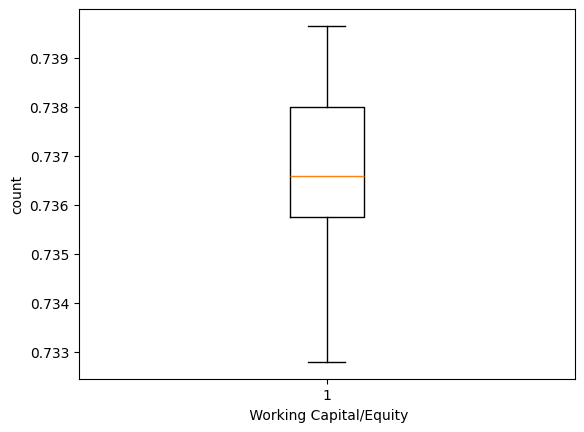

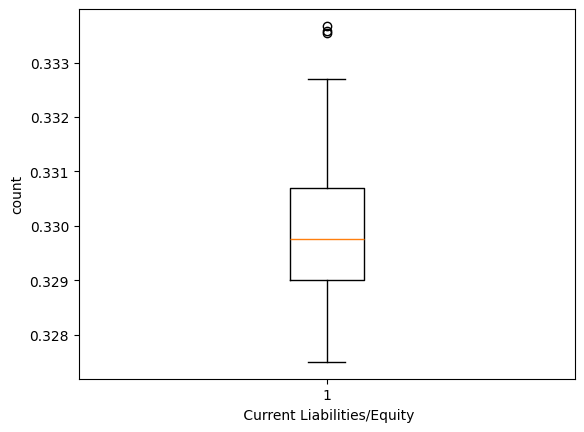

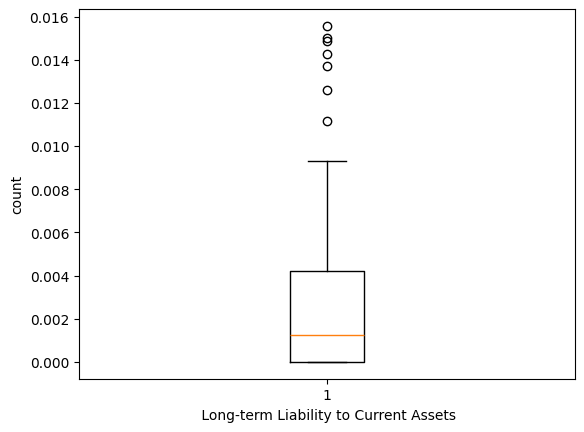

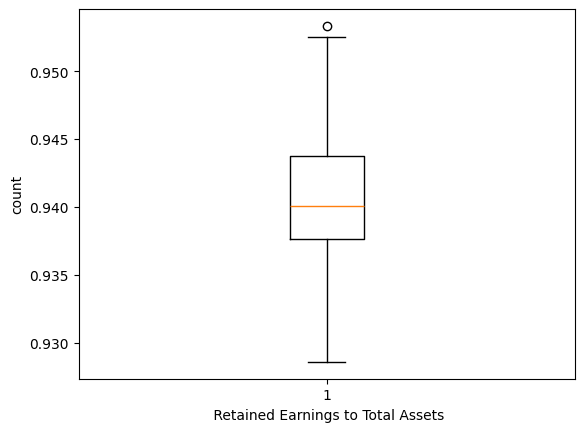

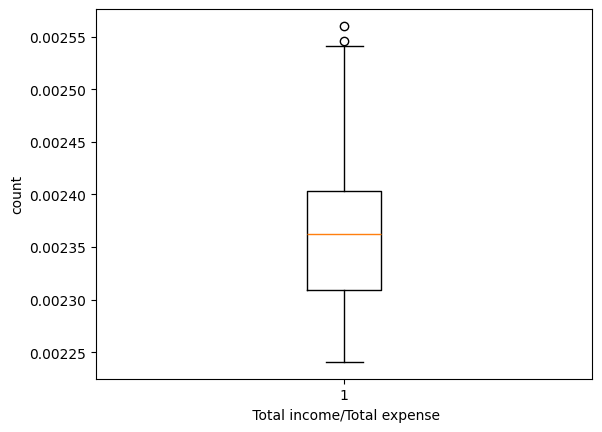

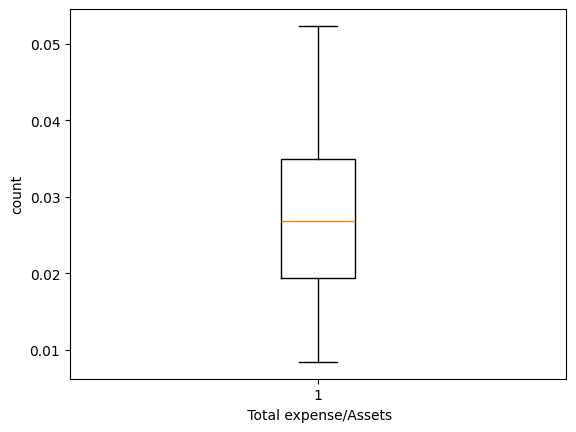

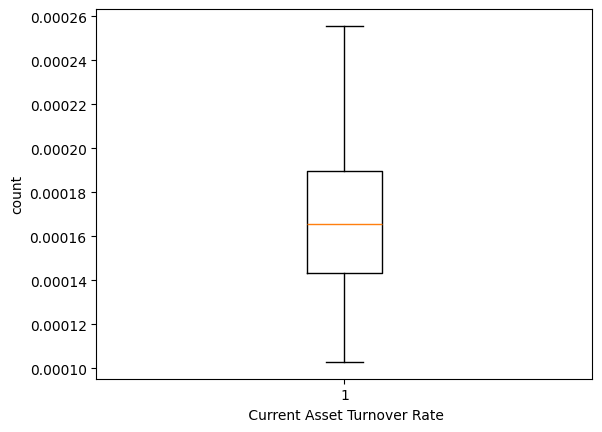

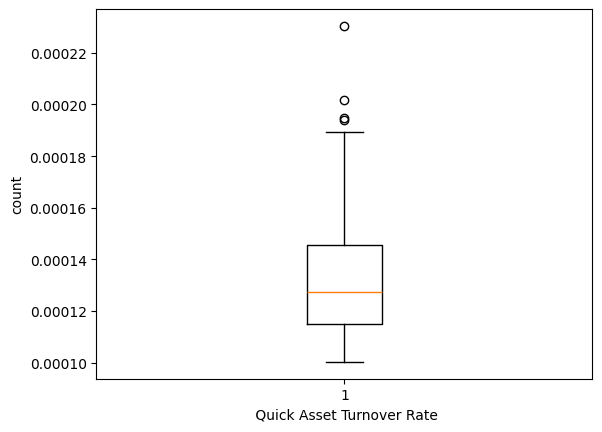

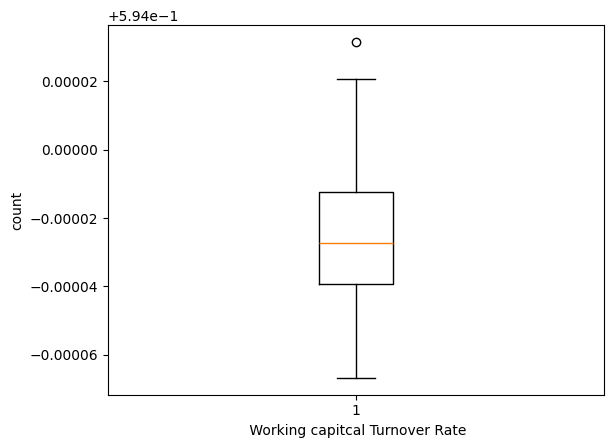

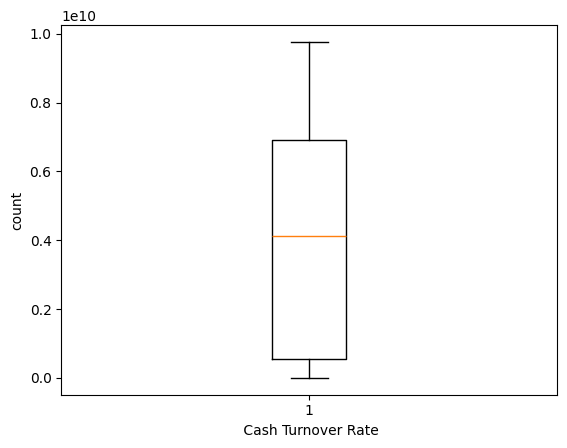

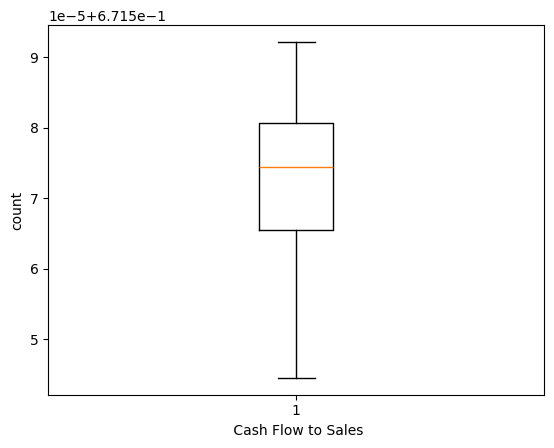

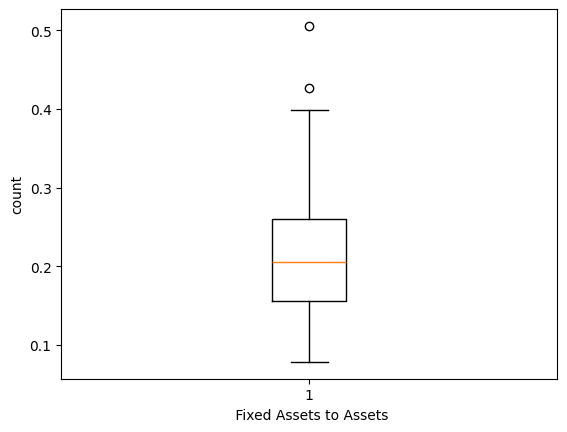

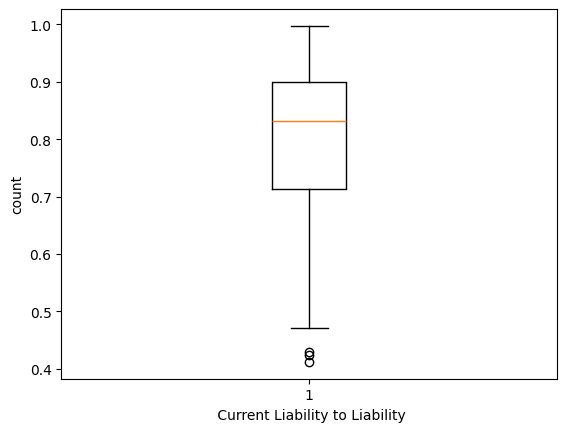

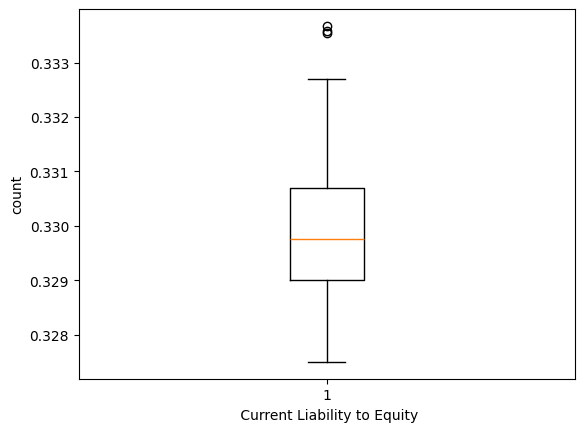

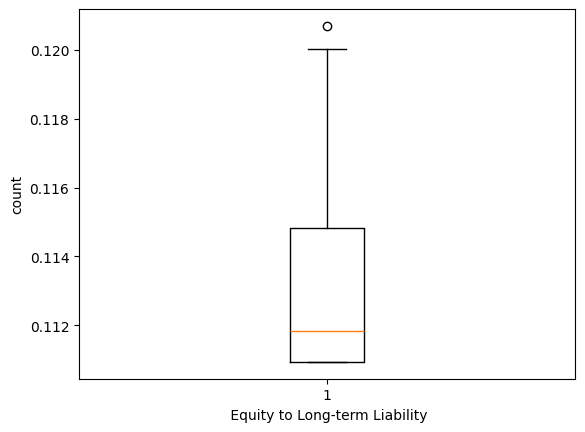

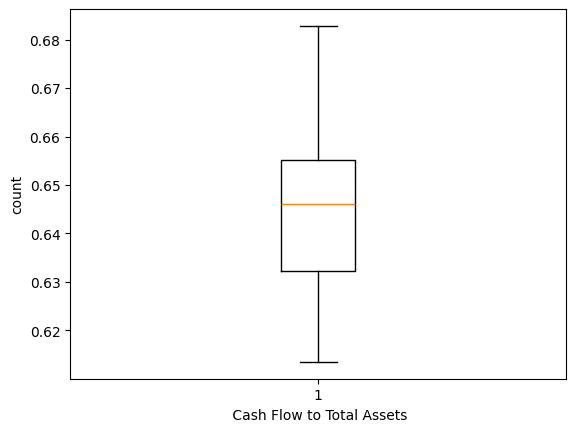

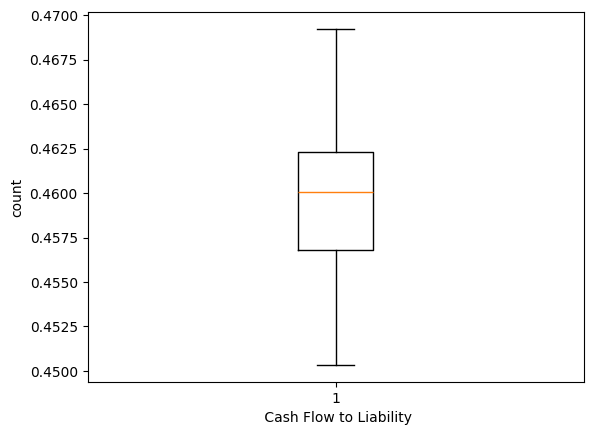

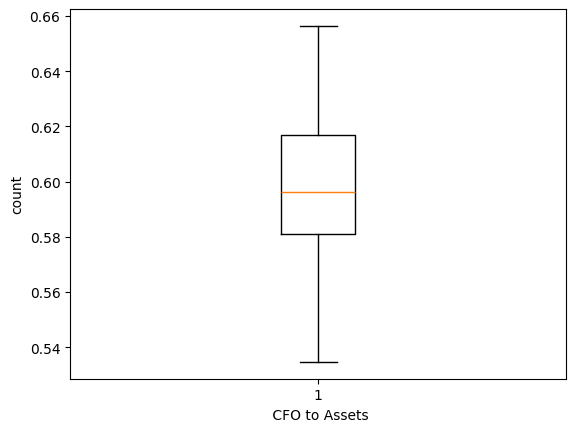

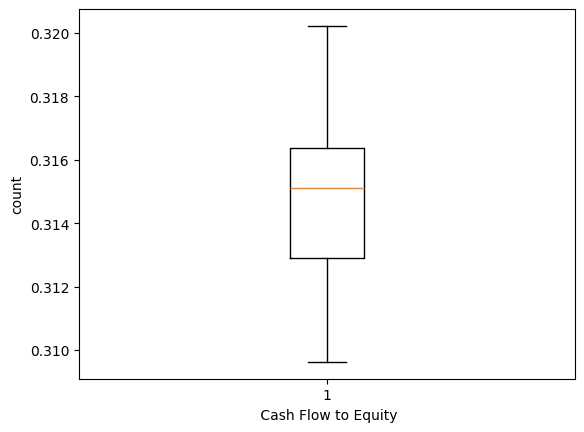

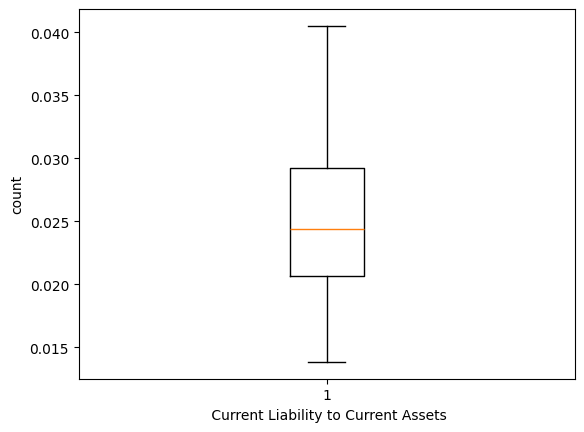

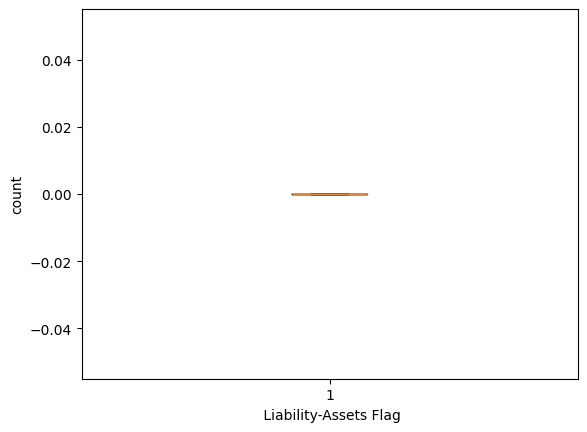

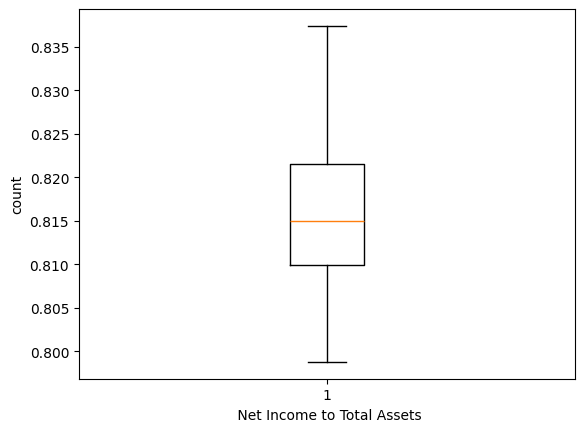

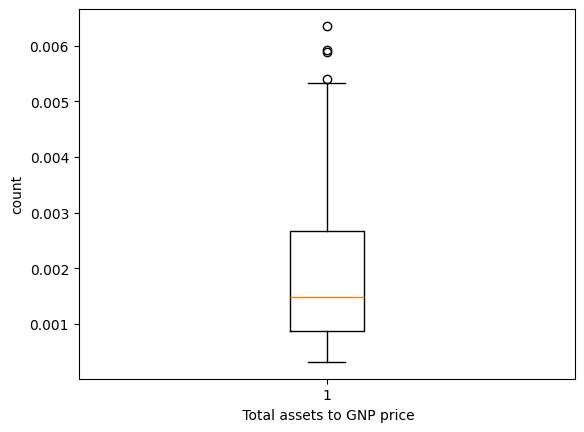

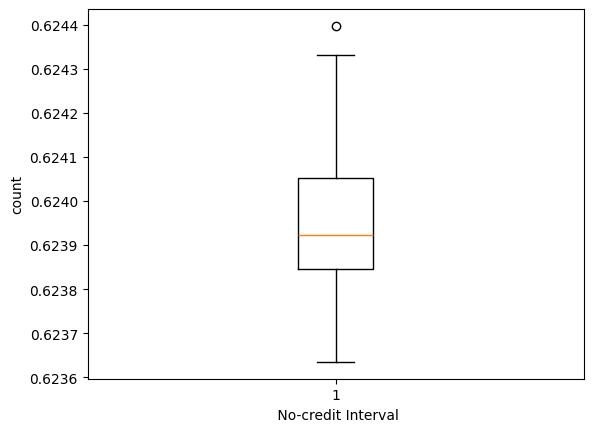

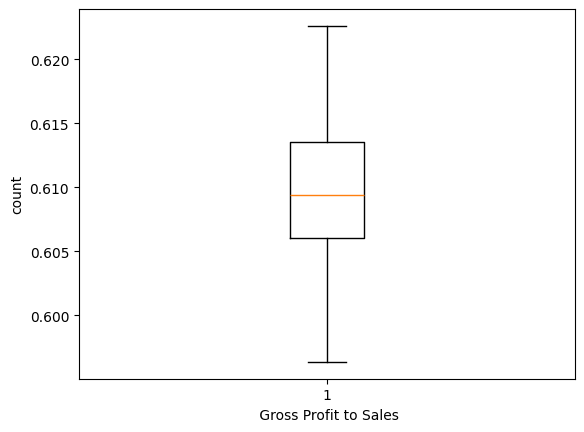

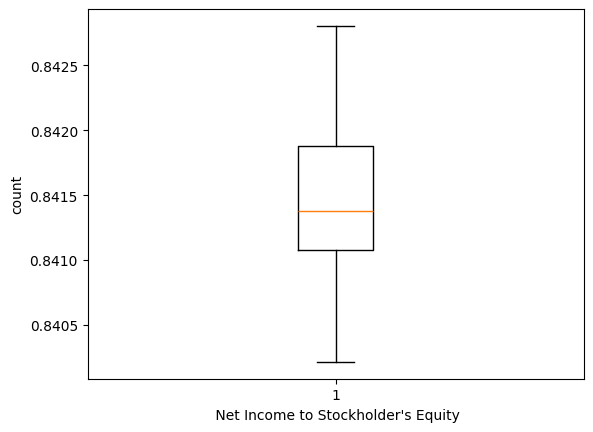

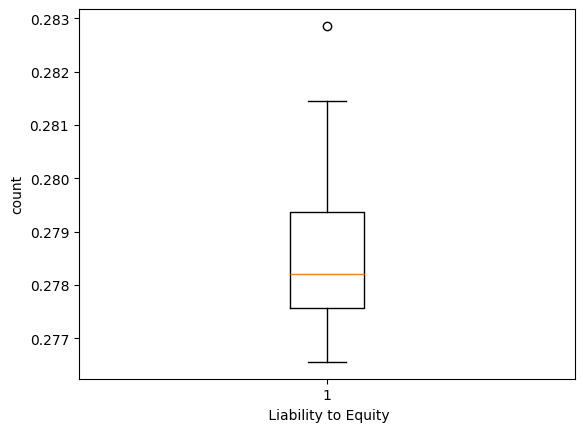

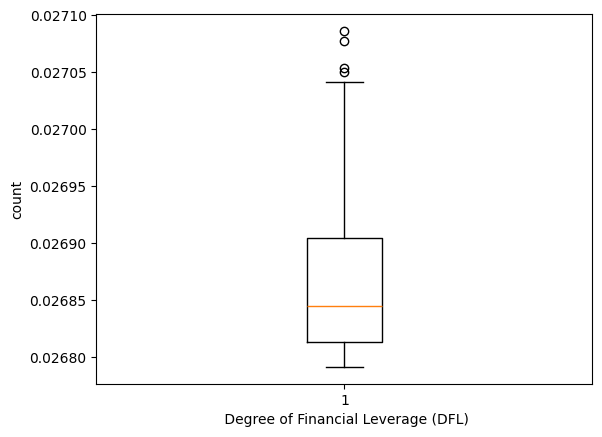

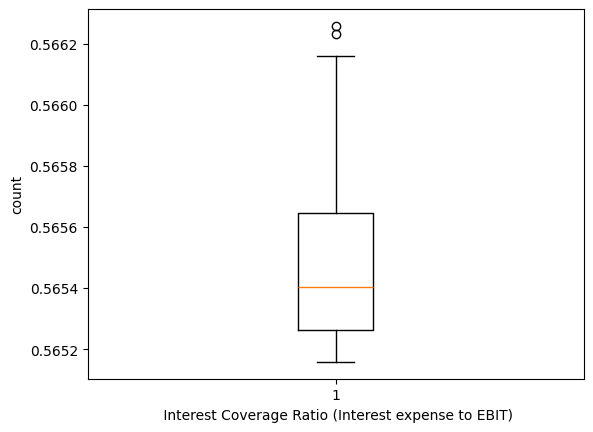

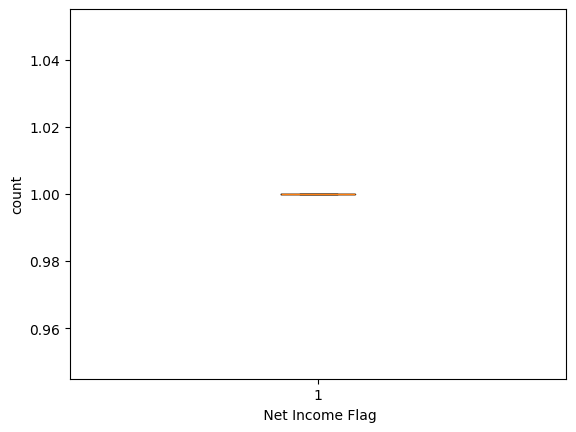

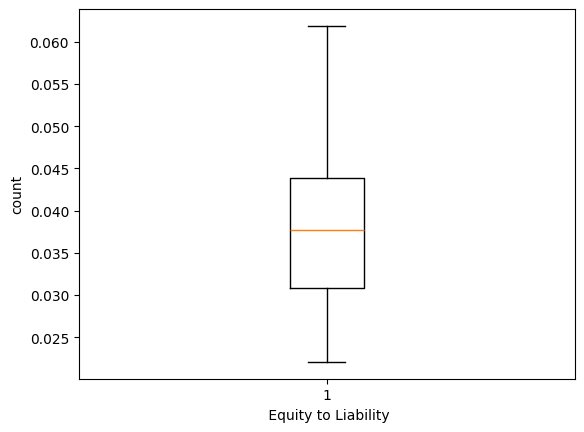

In [ ]:
for col in col_list:
  if df[col].dtype=='int64' or df[col].dtype=='float64':
    plt.boxplot(df[col])
    plt.xlabel(col)
    plt.ylabel('count')
    plt.show()


In [ ]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
21,0,0.504558,0.564490,0.553027,0.607446,0.607446,0.999030,0.797466,0.809371,0.303531,...,0.814012,0.000935,0.623996,0.607441,0.841311,0.278208,0.026890,0.565589,1,0.037680
144,0,0.493248,0.550371,0.542695,0.605572,0.605572,0.999038,0.797461,0.809364,0.303505,...,0.806599,0.005331,0.624191,0.605570,0.840743,0.277582,0.026918,0.565698,1,0.043609
155,0,0.520012,0.580081,0.566893,0.609882,0.609882,0.999099,0.797601,0.809475,0.303622,...,0.822854,0.001475,0.623883,0.609878,0.841839,0.277699,0.026812,0.565258,1,0.042311
163,0,0.507971,0.563072,0.565073,0.602927,0.602927,0.998990,0.797493,0.809415,0.303662,...,0.814659,0.005932,0.624057,0.602928,0.841492,0.279250,0.026843,0.565394,1,0.031418
170,0,0.498318,0.562364,0.549601,0.605046,0.605046,0.999027,0.797507,0.809410,0.303607,...,0.812198,0.005253,0.624244,0.605041,0.841081,0.277294,0.026850,0.565422,1,0.047277


In [ ]:
df.duplicated().sum()

0

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns (excluding the target variable "Bankrupt?")
numerical_columns = df.drop(columns=["Bankrupt?"]).select_dtypes(include=["float64", "int64"]).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical data
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Display the first few rows of the standardized dataset
df.head()


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
21,0,-0.318094,-0.205154,-0.344228,-0.399476,-0.395851,-0.537181,-0.601148,-0.656876,-0.125382,...,-0.213307,-0.739564,0.274964,-0.400033,-0.257039,-0.257091,0.259506,0.337010,0.0,-0.070806
144,0,-0.881914,-1.027983,-0.892735,-0.756372,-0.754600,-0.387862,-0.671359,-0.793961,-0.469908,...,-1.001566,2.366508,1.492493,-0.756456,-1.184437,-0.713577,0.629098,0.706564,0.0,0.544751
155,0,0.452298,0.703453,0.391853,0.064488,0.070523,0.732027,1.412239,1.342075,1.118195,...,0.726918,-0.358622,-0.431971,0.064111,0.603665,-0.628082,-0.761836,-0.784188,0.0,0.410011
163,0,-0.147976,-0.287754,0.295225,-1.260144,-1.260989,-1.277374,-0.190211,0.180590,1.662875,...,-0.144465,2.790522,0.653591,-1.259681,0.038402,0.502404,-0.357815,-0.321931,0.0,-0.720899
170,0,-0.629167,-0.329055,-0.526116,-0.856577,-0.855326,-0.586242,0.010096,0.100831,0.914760,...,-0.406199,2.310778,1.825814,-0.857168,-0.633754,-0.922836,-0.272713,-0.227803,0.0,0.925593


In [ ]:
df['Bankrupt?'].value_counts()

,count
Bankrupt?,
0,98
1,1


In [ ]:
df.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col in df.columns:
  if ((df[col].dtype !='object' )& (col!='Equity to Liability')):
    col_list.append(col)

x=df[col_list]
Vif_data=pd.DataFrame()
Vif_data['Features']=x.columns
Vif_data['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(Vif_data)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                             Features           VIF
0                                           Bankrupt?  5.457193e+01
1    ROA(C) before interest and depreciation befor...  9.514849e+02
2              ROA(A) before interest and % after tax  8.786689e+03
3    ROA(B) before interest and depreciation after...  1.491004e+03
4                              Operating Gross Margin  6.102701e+07
..                                                ...           ...
91                                Liability to Equity  4.140335e+08
92                 Degree of Financial Leverage (DFL)  5.733290e+03
93   Interest Coverage Ratio (Interest expense to ...  7.369378e+03
94                                    Net Income Flag           NaN
95                                Equity to Liability  2.113407e+03

[96 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


In [ ]:
df=df.drop(' ROA(B) before interest and depreciation after tax',axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col in df.columns:
  if ((df[col].dtype !='object' )& (col!='Equity to Liability')):
    col_list.append(col)

x=df[col_list]
Vif_data=pd.DataFrame()
Vif_data['Features']=x.columns
Vif_data['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(Vif_data)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                             Features           VIF
0                                           Bankrupt?  5.234283e+01
1    ROA(C) before interest and depreciation befor...  1.168001e+02
2              ROA(A) before interest and % after tax  6.548673e+03
3                              Operating Gross Margin  4.194918e+07
4                         Realized Sales Gross Margin  1.758615e+03
..                                                ...           ...
90                                Liability to Equity  3.618445e+08
91                 Degree of Financial Leverage (DFL)  4.881212e+03
92   Interest Coverage Ratio (Interest expense to ...  9.115746e+03
93                                    Net Income Flag           NaN
94                                Equity to Liability  1.938576e+03

[95 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


In [ ]:
df=df.drop(' ROA(C) before interest and depreciation before interest',axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col in df.columns:
  if ((df[col].dtype !='object' )& (col!='Equity to Liability')):
    col_list.append(col)

x=df[col_list]
Vif_data=pd.DataFrame()
Vif_data['Features']=x.columns
Vif_data['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(Vif_data)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                             Features           VIF
0                                           Bankrupt?  5.232319e+01
1              ROA(A) before interest and % after tax  5.557200e+03
2                              Operating Gross Margin  4.095645e+07
3                         Realized Sales Gross Margin  1.727464e+03
4                               Operating Profit Rate  8.492383e+06
..                                                ...           ...
89                                Liability to Equity  3.292719e+08
90                 Degree of Financial Leverage (DFL)  4.288266e+03
91   Interest Coverage Ratio (Interest expense to ...  8.793318e+03
92                                    Net Income Flag           NaN
93                                Equity to Liability  1.935652e+03

[94 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


In [ ]:
df=df.drop(' Retained Earnings to Total Assets',axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col in df.columns:
  if ((df[col].dtype !='object' )& (col!='Equity to Liability')):
    col_list.append(col)

x=df[col_list]
Vif_data=pd.DataFrame()
Vif_data['Features']=x.columns
Vif_data['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(Vif_data)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                             Features           VIF
0                                           Bankrupt?  6.472384e+01
1              ROA(A) before interest and % after tax  5.412618e+03
2                              Operating Gross Margin  3.789451e+07
3                         Realized Sales Gross Margin  1.725154e+03
4                               Operating Profit Rate  8.361793e+06
..                                                ...           ...
88                                Liability to Equity  2.947565e+08
89                 Degree of Financial Leverage (DFL)  4.767729e+03
90   Interest Coverage Ratio (Interest expense to ...  6.373284e+03
91                                    Net Income Flag           NaN
92                                Equity to Liability  2.310928e+03

[93 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


In [ ]:
df=df.drop(' Long-term Liability to Current Assets',axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col in df.columns:
  if ((df[col].dtype !='object' )& (col!='Equity to Liability')):
    col_list.append(col)

x=df[col_list]
Vif_data=pd.DataFrame()
Vif_data['Features']=x.columns
Vif_data['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(Vif_data)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                             Features           VIF
0                                           Bankrupt?  4.985747e+01
1              ROA(A) before interest and % after tax  4.573778e+03
2                              Operating Gross Margin  3.703464e+07
3                         Realized Sales Gross Margin  1.669538e+03
4                               Operating Profit Rate  6.783373e+06
..                                                ...           ...
87                                Liability to Equity  2.752175e+08
88                 Degree of Financial Leverage (DFL)  4.715476e+03
89   Interest Coverage Ratio (Interest expense to ...  5.541926e+03
90                                    Net Income Flag           NaN
91                                Equity to Liability  1.800134e+03

[92 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


In [ ]:
df=df.drop(' Working Capital/Equity',axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col in df.columns:
  if ((df[col].dtype !='object' )& (col!='Equity to Liability')):
    col_list.append(col)

x=df[col_list]
Vif_data=pd.DataFrame()
Vif_data['Features']=x.columns
Vif_data['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(Vif_data)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                             Features           VIF
0                                           Bankrupt?  5.389330e+01
1              ROA(A) before interest and % after tax  3.732994e+03
2                              Operating Gross Margin  3.697585e+07
3                         Realized Sales Gross Margin  1.668218e+03
4                               Operating Profit Rate  6.782425e+06
..                                                ...           ...
86                                Liability to Equity  2.742787e+08
87                 Degree of Financial Leverage (DFL)  4.631638e+03
88   Interest Coverage Ratio (Interest expense to ...  6.227565e+03
89                                    Net Income Flag           NaN
90                                Equity to Liability  1.741918e+03

[91 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


In [ ]:
df=df.drop(' Operating Profit Rate',axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col in df.columns:
  if ((df[col].dtype !='object' )& (col!='Equity to Liability')):
    col_list.append(col)

x=df[col_list]
Vif_data=pd.DataFrame()
Vif_data['Features']=x.columns
Vif_data['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(Vif_data)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                             Features           VIF
0                                           Bankrupt?  5.335013e+01
1              ROA(A) before interest and % after tax  3.358316e+03
2                              Operating Gross Margin  3.337327e+07
3                         Realized Sales Gross Margin  1.647020e+03
4                           Pre-tax net Interest Rate  1.524021e+03
..                                                ...           ...
85                                Liability to Equity  2.721505e+08
86                 Degree of Financial Leverage (DFL)  4.410435e+03
87   Interest Coverage Ratio (Interest expense to ...  6.200116e+03
88                                    Net Income Flag           NaN
89                                Equity to Liability  1.681544e+03

[90 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


In [ ]:
df=df.drop(' ROA(A) before interest and % after tax',axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col in df.columns:
  if ((df[col].dtype !='object' )& (col!='Equity to Liability')):
    col_list.append(col)

x=df[col_list]
Vif_data=pd.DataFrame()
Vif_data['Features']=x.columns
Vif_data['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(Vif_data)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                             Features            VIF
0                                           Bankrupt?      45.414382
1                              Operating Gross Margin  796186.827143
2                         Realized Sales Gross Margin    1592.391377
3                           Pre-tax net Interest Rate    1245.625516
4                         After-tax net Interest Rate    2121.485670
..                                                ...            ...
84                                Liability to Equity  102003.651548
85                 Degree of Financial Leverage (DFL)    3332.189156
86   Interest Coverage Ratio (Interest expense to ...    4391.099900
87                                    Net Income Flag            NaN
88                                Equity to Liability    1385.807282

[89 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


In [ ]:
df=df.drop(' Inventory/Working Capital',axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col in df.columns:
  if ((df[col].dtype !='object' )& (col!='Equity to Liability')):
    col_list.append(col)

x=df[col_list]
Vif_data=pd.DataFrame()
Vif_data['Features']=x.columns
Vif_data['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(Vif_data)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


                                             Features           VIF
0                                           Bankrupt?  4.535432e+01
1                              Operating Gross Margin  7.026319e+04
2                         Realized Sales Gross Margin  1.555249e+03
3                           Pre-tax net Interest Rate  1.192400e+03
4                         After-tax net Interest Rate  1.958098e+03
..                                                ...           ...
83                                Liability to Equity  3.304825e+06
84                 Degree of Financial Leverage (DFL)  3.153880e+03
85   Interest Coverage Ratio (Interest expense to ...  4.053551e+03
86                                    Net Income Flag           NaN
87                                Equity to Liability  1.321071e+03

[88 rows x 2 columns]


In [ ]:
df=df.drop(' Operating Gross Margin',axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col in df.columns:
  if ((df[col].dtype !='object' )& (col!='Equity to Liability')):
    col_list.append(col)

x=df[col_list]
Vif_data=pd.DataFrame()
Vif_data['Features']=x.columns
Vif_data['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(Vif_data)

                                             Features            VIF
0                                           Bankrupt?      45.249360
1                         Realized Sales Gross Margin    1499.892825
2                           Pre-tax net Interest Rate    1179.432255
3                         After-tax net Interest Rate    2133.744960
4         Non-industry income and expenditure/revenue      83.717122
..                                                ...            ...
82                                Liability to Equity  902671.499179
83                 Degree of Financial Leverage (DFL)    2502.123869
84   Interest Coverage Ratio (Interest expense to ...    3871.723642
85                                    Net Income Flag            NaN
86                                Equity to Liability    1271.715012

[87 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


In [ ]:
df=df.drop(' Current Liabilities/Liability',axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col in df.columns:
  if ((df[col].dtype !='object' )& (col!='Equity to Liability')):
    col_list.append(col)

x=df[col_list]
Vif_data=pd.DataFrame()
Vif_data['Features']=x.columns
Vif_data['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(Vif_data)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


                                             Features            VIF
0                                           Bankrupt?      45.247756
1                         Realized Sales Gross Margin    1515.768486
2                           Pre-tax net Interest Rate    1155.824923
3                         After-tax net Interest Rate    2127.073377
4         Non-industry income and expenditure/revenue      83.649786
..                                                ...            ...
81                                Liability to Equity  578175.968911
82                 Degree of Financial Leverage (DFL)    2901.606231
83   Interest Coverage Ratio (Interest expense to ...    3935.053326
84                                    Net Income Flag            NaN
85                                Equity to Liability    1273.575036

[86 rows x 2 columns]


In [ ]:
df=df.drop(' Continuous interest rate (after tax)',axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col in df.columns:
  if ((df[col].dtype !='object' )& (col!='Equity to Liability')):
    col_list.append(col)

x=df[col_list]
Vif_data=pd.DataFrame()
Vif_data['Features']=x.columns
Vif_data['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(Vif_data)

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


                                             Features           VIF
0                                           Bankrupt?     43.674253
1                         Realized Sales Gross Margin   1443.740085
2                           Pre-tax net Interest Rate   1141.191353
3                         After-tax net Interest Rate   1422.053638
4         Non-industry income and expenditure/revenue     82.950354
..                                                ...           ...
80                                Liability to Equity  89906.289251
81                 Degree of Financial Leverage (DFL)   2718.815328
82   Interest Coverage Ratio (Interest expense to ...   3804.768406
83                                    Net Income Flag           NaN
84                                Equity to Liability   1160.847343

[85 rows x 2 columns]


In [ ]:
df=df.drop(' Operating Expense Rate',axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col in df.columns:
  if ((df[col].dtype !='object' )& (col!='Equity to Liability')):
    col_list.append(col)

x=df[col_list]
Vif_data=pd.DataFrame()
Vif_data['Features']=x.columns
Vif_data['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(Vif_data)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                             Features            VIF
0                                           Bankrupt?      41.200690
1                         Realized Sales Gross Margin    1461.819054
2                           Pre-tax net Interest Rate     854.662393
3                         After-tax net Interest Rate     973.058997
4         Non-industry income and expenditure/revenue      72.246583
..                                                ...            ...
79                                Liability to Equity  101646.814330
80                 Degree of Financial Leverage (DFL)    2492.439722
81   Interest Coverage Ratio (Interest expense to ...    3278.259571
82                                    Net Income Flag            NaN
83                                Equity to Liability    1061.545290

[84 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


In [ ]:
df=df.drop(' Operating Funds to Liability',axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col in df.columns:
  if ((df[col].dtype !='object' )& (col!='Equity to Liability')):
    col_list.append(col)

x=df[col_list]
Vif_data=pd.DataFrame()
Vif_data['Features']=x.columns
Vif_data['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(Vif_data)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                             Features           VIF
0                                           Bankrupt?     41.256073
1                         Realized Sales Gross Margin   1378.397486
2                           Pre-tax net Interest Rate    847.360059
3                         After-tax net Interest Rate   1014.915426
4         Non-industry income and expenditure/revenue     68.419206
..                                                ...           ...
78                                Liability to Equity  73581.246045
79                 Degree of Financial Leverage (DFL)   2448.136391
80   Interest Coverage Ratio (Interest expense to ...   2985.527072
81                                    Net Income Flag           NaN
82                                Equity to Liability   1052.789894

[83 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


In [ ]:
df=df.drop(' Cash flow rate',axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col in df.columns:
  if ((df[col].dtype !='object' )& (col!='Equity to Liability')):
    col_list.append(col)

x=df[col_list]
Vif_data=pd.DataFrame()
Vif_data['Features']=x.columns
Vif_data['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(Vif_data)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                             Features            VIF
0                                           Bankrupt?      40.729009
1                         Realized Sales Gross Margin    1425.694653
2                           Pre-tax net Interest Rate     846.233815
3                         After-tax net Interest Rate     951.904352
4         Non-industry income and expenditure/revenue      67.264142
..                                                ...            ...
77                                Liability to Equity  480551.360255
78                 Degree of Financial Leverage (DFL)    2219.420153
79   Interest Coverage Ratio (Interest expense to ...    2967.484441
80                                    Net Income Flag            NaN
81                                Equity to Liability    1057.964032

[82 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


In [ ]:
df=df.drop(' Cash/Current Liability',axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col in df.columns:
  if ((df[col].dtype !='object' )& (col!='Equity to Liability')):
    col_list.append(col)

x=df[col_list]
Vif_data=pd.DataFrame()
Vif_data['Features']=x.columns
Vif_data['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(Vif_data)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                             Features           VIF
0                                           Bankrupt?  3.441315e+01
1                         Realized Sales Gross Margin  1.258956e+03
2                           Pre-tax net Interest Rate  7.886085e+02
3                         After-tax net Interest Rate  1.011169e+03
4         Non-industry income and expenditure/revenue  6.085796e+01
..                                                ...           ...
76                                Liability to Equity  1.415643e+06
77                 Degree of Financial Leverage (DFL)  2.301554e+03
78   Interest Coverage Ratio (Interest expense to ...  2.736634e+03
79                                    Net Income Flag           NaN
80                                Equity to Liability  1.019121e+03

[81 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


In [ ]:
df=df.drop(' Persistent EPS in the Last Four Seasons',axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col in df.columns:
  if ((df[col].dtype !='object' )& (col!='Equity to Liability')):
    col_list.append(col)

x=df[col_list]
Vif_data=pd.DataFrame()
Vif_data['Features']=x.columns
Vif_data['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(Vif_data)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


                                             Features           VIF
0                                           Bankrupt?  3.136002e+01
1                         Realized Sales Gross Margin  1.264964e+03
2                           Pre-tax net Interest Rate  7.943545e+02
3                         After-tax net Interest Rate  9.700389e+02
4         Non-industry income and expenditure/revenue  5.887640e+01
..                                                ...           ...
75                                Liability to Equity  2.974817e+07
76                 Degree of Financial Leverage (DFL)  2.254069e+03
77   Interest Coverage Ratio (Interest expense to ...  2.929755e+03
78                                    Net Income Flag           NaN
79                                Equity to Liability  9.875587e+02

[80 rows x 2 columns]


In [ ]:
df=df.drop(' Realized Sales Gross Margin',axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col in df.columns:
  if ((df[col].dtype !='object' )& (col!='Equity to Liability')):
    col_list.append(col)

x=df[col_list]
Vif_data=pd.DataFrame()
Vif_data['Features']=x.columns
Vif_data['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(Vif_data)

                                             Features           VIF
0                                           Bankrupt?  3.087680e+01
1                           Pre-tax net Interest Rate  7.872727e+02
2                         After-tax net Interest Rate  8.422782e+02
3         Non-industry income and expenditure/revenue  5.641074e+01
4               Research and development expense rate  4.288862e+00
..                                                ...           ...
74                                Liability to Equity  1.951662e+06
75                 Degree of Financial Leverage (DFL)  2.229687e+03
76   Interest Coverage Ratio (Interest expense to ...  2.941407e+03
77                                    Net Income Flag           NaN
78                                Equity to Liability  9.856842e+02

[79 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


In [ ]:
df=df.drop(' After-tax net Interest Rate',axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col in df.columns:
  if ((df[col].dtype !='object' )& (col!='Equity to Liability')):
    col_list.append(col)

x=df[col_list]
Vif_data=pd.DataFrame()
Vif_data['Features']=x.columns
Vif_data['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(Vif_data)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                             Features           VIF
0                                           Bankrupt?  2.736268e+01
1                           Pre-tax net Interest Rate  1.616513e+02
2         Non-industry income and expenditure/revenue  5.420214e+01
3               Research and development expense rate  4.039051e+00
4                 Interest-bearing debt interest rate  1.025356e+01
..                                                ...           ...
73                                Liability to Equity  4.272181e+07
74                 Degree of Financial Leverage (DFL)  2.059973e+03
75   Interest Coverage Ratio (Interest expense to ...  2.510708e+03
76                                    Net Income Flag           NaN
77                                Equity to Liability  9.623115e+02

[78 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


In [ ]:
df=df.drop(' Operating profit/Paid-in capital',axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col in df.columns:
  if ((df[col].dtype !='object' )& (col!='Equity to Liability')):
    col_list.append(col)

x=df[col_list]
Vif_data=pd.DataFrame()
Vif_data['Features']=x.columns
Vif_data['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(Vif_data)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                             Features            VIF
0                                           Bankrupt?      27.359448
1                           Pre-tax net Interest Rate     159.562552
2         Non-industry income and expenditure/revenue      54.096132
3               Research and development expense rate       3.901760
4                 Interest-bearing debt interest rate       9.963801
..                                                ...            ...
72                                Liability to Equity  308992.989550
73                 Degree of Financial Leverage (DFL)    1965.727087
74   Interest Coverage Ratio (Interest expense to ...    2362.114503
75                                    Net Income Flag            NaN
76                                Equity to Liability     890.262950

[77 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


In [ ]:
df=df.drop(' Net worth/Assets',axis=1)

In [ ]:
df=df.drop(' Liability to Equity',axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col in df.columns:
  if ((df[col].dtype !='object' )& (col!='Equity to Liability')):
    col_list.append(col)

x=df[col_list]
Vif_data=pd.DataFrame()
Vif_data['Features']=x.columns
Vif_data['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(Vif_data)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                             Features          VIF
0                                           Bankrupt?    25.374388
1                           Pre-tax net Interest Rate   153.117897
2         Non-industry income and expenditure/revenue    53.609128
3               Research and development expense rate     3.875221
4                 Interest-bearing debt interest rate     9.922958
..                                                ...          ...
70                 Net Income to Stockholder's Equity   500.194059
71                 Degree of Financial Leverage (DFL)  1893.501502
72   Interest Coverage Ratio (Interest expense to ...  2243.239072
73                                    Net Income Flag          NaN
74                                Equity to Liability   823.506595

[75 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


In [ ]:
df=df.drop(' Pre-tax net Interest Rate',axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col in df.columns:
  if ((df[col].dtype !='object' )& (col!='Equity to Liability')):
    col_list.append(col)

x=df[col_list]
Vif_data=pd.DataFrame()
Vif_data['Features']=x.columns
Vif_data['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(Vif_data)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                             Features          VIF
0                                           Bankrupt?    24.093625
1         Non-industry income and expenditure/revenue    42.116613
2               Research and development expense rate     3.136804
3                 Interest-bearing debt interest rate     8.235968
4                                        Tax rate (A)    15.976262
..                                                ...          ...
69                 Net Income to Stockholder's Equity   499.638010
70                 Degree of Financial Leverage (DFL)  1754.479455
71   Interest Coverage Ratio (Interest expense to ...  2118.906375
72                                    Net Income Flag          NaN
73                                Equity to Liability   821.974396

[74 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


In [ ]:
df=df.drop(' Degree of Financial Leverage (DFL)',axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col in df.columns:
  if ((df[col].dtype !='object' )& (col!='Equity to Liability')):
    col_list.append(col)

x=df[col_list]
Vif_data=pd.DataFrame()
Vif_data['Features']=x.columns
Vif_data['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(Vif_data)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                             Features         VIF
0                                           Bankrupt?   24.022294
1         Non-industry income and expenditure/revenue   42.116148
2               Research and development expense rate    2.951931
3                 Interest-bearing debt interest rate    7.743018
4                                        Tax rate (A)   13.853660
..                                                ...         ...
68                              Gross Profit to Sales   47.414441
69                 Net Income to Stockholder's Equity  408.729680
70   Interest Coverage Ratio (Interest expense to ...  103.302395
71                                    Net Income Flag         NaN
72                                Equity to Liability  718.257966

[73 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


In [ ]:
df=df.drop(' Equity to Liability',axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col in df.columns:
  if ((df[col].dtype !='object' )& (col!='Equity to Liability')):
    col_list.append(col)

x=df[col_list]
Vif_data=pd.DataFrame()
Vif_data['Features']=x.columns
Vif_data['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(Vif_data)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                             Features         VIF
0                                           Bankrupt?   23.759898
1         Non-industry income and expenditure/revenue   42.115965
2               Research and development expense rate    2.621743
3                 Interest-bearing debt interest rate    6.118485
4                                        Tax rate (A)   12.137410
..                                                ...         ...
67                                 No-credit Interval   31.502774
68                              Gross Profit to Sales   47.146837
69                 Net Income to Stockholder's Equity  408.392969
70   Interest Coverage Ratio (Interest expense to ...  101.809675
71                                    Net Income Flag         NaN

[72 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


In [ ]:
df.columns

Index(['Bankrupt?', ' Non-industry income and expenditure/revenue',
       ' Research and development expense rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Cash Flow Per Share',
       ' Revenue Per Share (Yuan ¥)', ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit Growth Rate', ' After-tax Net Profit Growth Rate',
       ' Regular Net Profit Growth Rate', ' Continuous Net Profit Growth Rate',
       ' Total Asset Growth Rate', ' Net Value Growth Rate',
       ' Total Asset Return Growth Rate Ratio', ' Cash Reinvestment %',
       ' Current Ratio', ' Quick Ratio', ' Interest Expense Ratio',
       ' Total debt/Total net worth', ' Debt ratio %',
       ' Long-term fund suitability ratio (A)', ' Borrowing dependency',
       ' Contingent liabilitie

In [ ]:
df=df.drop(' Interest Coverage Ratio (Interest expense to EBIT)',axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col in df.columns:
  if ((df[col].dtype !='object' )& (col!='Equity to Liability')):
    col_list.append(col)

x=df[col_list]
Vif_data=pd.DataFrame()
Vif_data['Features']=x.columns
Vif_data['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(Vif_data)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                        Features         VIF
0                                      Bankrupt?   11.434699
1    Non-industry income and expenditure/revenue   41.334742
2          Research and development expense rate    2.499471
3            Interest-bearing debt interest rate    6.116890
4                                   Tax rate (A)    9.384956
..                                           ...         ...
66                     Total assets to GNP price    3.954141
67                            No-credit Interval   30.764285
68                         Gross Profit to Sales   45.441875
69            Net Income to Stockholder's Equity  397.069851
70                               Net Income Flag         NaN

[71 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


In [ ]:
df=df.drop(' Non-industry income and expenditure/revenue',axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col in df.columns:
  if ((df[col].dtype !='object' )& (col!='Equity to Liability')):
    col_list.append(col)

x=df[col_list]
Vif_data=pd.DataFrame()
Vif_data['Features']=x.columns
Vif_data['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(Vif_data)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                  Features         VIF
0                                Bankrupt?   10.535591
1    Research and development expense rate    2.481023
2      Interest-bearing debt interest rate    5.597860
3                             Tax rate (A)    9.345597
4                  Net Value Per Share (B)         inf
..                                     ...         ...
65               Total assets to GNP price    3.920221
66                      No-credit Interval   30.752154
67                   Gross Profit to Sales   45.436350
68      Net Income to Stockholder's Equity  395.220173
69                         Net Income Flag         NaN

[70 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


In [ ]:
import pandas as pd

# Assuming df is your dataframe
df = df.drop(' Net Income to Stockholder\'s Equity', axis=1)


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col in df.columns:
  if ((df[col].dtype !='object' )& (col!='Equity to Liability')):
    col_list.append(col)

x=df[col_list]
Vif_data=pd.DataFrame()
Vif_data['Features']=x.columns
Vif_data['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(Vif_data)

                                  Features           VIF
0                                Bankrupt?  1.025752e+01
1    Research and development expense rate  2.376251e+00
2      Interest-bearing debt interest rate  5.571322e+00
3                             Tax rate (A)  9.198946e+00
4                  Net Value Per Share (B)  9.007199e+15
..                                     ...           ...
64              Net Income to Total Assets  7.727317e+01
65               Total assets to GNP price  3.893792e+00
66                      No-credit Interval  3.024313e+01
67                   Gross Profit to Sales  4.522064e+01
68                         Net Income Flag           NaN

[69 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


In [ ]:
df = df.drop(' Net Value Per Share (B)', axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col in df.columns:
  if ((df[col].dtype !='object' )& (col!='Equity to Liability')):
    col_list.append(col)

x=df[col_list]
Vif_data=pd.DataFrame()
Vif_data['Features']=x.columns
Vif_data['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(Vif_data)

                                  Features          VIF
0                                Bankrupt?    10.257522
1    Research and development expense rate     2.376251
2      Interest-bearing debt interest rate     5.571322
3                             Tax rate (A)     9.198946
4                  Net Value Per Share (A)  6736.162942
..                                     ...          ...
63              Net Income to Total Assets    77.273174
64               Total assets to GNP price     3.893792
65                      No-credit Interval    30.243135
66                   Gross Profit to Sales    45.220645
67                         Net Income Flag          NaN

[68 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


In [ ]:
df = df.drop(' Net Value Per Share (A)', axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col in df.columns:
  if ((df[col].dtype !='object' )& (col!='Equity to Liability')):
    col_list.append(col)

x=df[col_list]
Vif_data=pd.DataFrame()
Vif_data['Features']=x.columns
Vif_data['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(Vif_data)

                                  Features        VIF
0                                Bankrupt?   9.921417
1    Research and development expense rate   2.338374
2      Interest-bearing debt interest rate   5.346243
3                             Tax rate (A)   8.766578
4                  Net Value Per Share (C)  42.259377
..                                     ...        ...
62              Net Income to Total Assets  69.379038
63               Total assets to GNP price   3.824558
64                      No-credit Interval  30.242516
65                   Gross Profit to Sales  43.843695
66                         Net Income Flag        NaN

[67 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


In [ ]:
df.head()

,Bankrupt?,Research and development expense rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (C),Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,...,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income Flag
21,0,-0.605948,2.526359,0.385542,-0.150095,0.870566,0.614248,-0.143533,-0.218428,-0.625402,...,2.552214,0.974081,2.463471,-1.087094,0.0,-0.213307,-0.739564,0.274964,-0.400033,0.0
144,0,-1.058431,-0.029065,0.841432,-0.423078,-0.361560,-0.783568,-0.731686,-0.985891,0.801055,...,-1.817092,-0.228078,-1.424647,-1.606620,0.0,-1.001566,2.366508,1.492493,-0.756456,0.0
155,0,-0.233315,-0.475745,0.206337,0.828095,0.509561,-0.702075,0.268174,0.808617,-0.157035,...,-1.535312,0.437657,-1.249224,-0.426519,0.0,0.726918,-0.358622,-0.431971,0.064111,0.0
163,0,-1.058431,-0.948394,-1.646760,-0.236540,1.843710,-0.526658,-1.402180,-0.421580,-0.751061,...,0.601105,1.748363,0.786676,-0.455566,0.0,-0.144465,2.790522,0.653591,-1.259681,0.0
170,0,-1.058431,0.090396,-0.356878,1.132927,0.101468,-0.746275,-0.872842,-0.432866,-0.142632,...,0.878979,0.066419,0.624128,-1.868432,0.0,-0.406199,2.310778,1.825814,-0.857168,0.0


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [ ]:
model=LogisticRegression()

In [ ]:
rfe=RFE(model)

In [ ]:
x=df.iloc[:,1:]

In [ ]:
df.head()

,Bankrupt?,Research and development expense rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (C),Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,...,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income Flag
21,0,-0.605948,2.526359,0.385542,-0.150095,0.870566,0.614248,-0.143533,-0.218428,-0.625402,...,2.552214,0.974081,2.463471,-1.087094,0.0,-0.213307,-0.739564,0.274964,-0.400033,0.0
144,0,-1.058431,-0.029065,0.841432,-0.423078,-0.361560,-0.783568,-0.731686,-0.985891,0.801055,...,-1.817092,-0.228078,-1.424647,-1.606620,0.0,-1.001566,2.366508,1.492493,-0.756456,0.0
155,0,-0.233315,-0.475745,0.206337,0.828095,0.509561,-0.702075,0.268174,0.808617,-0.157035,...,-1.535312,0.437657,-1.249224,-0.426519,0.0,0.726918,-0.358622,-0.431971,0.064111,0.0
163,0,-1.058431,-0.948394,-1.646760,-0.236540,1.843710,-0.526658,-1.402180,-0.421580,-0.751061,...,0.601105,1.748363,0.786676,-0.455566,0.0,-0.144465,2.790522,0.653591,-1.259681,0.0
170,0,-1.058431,0.090396,-0.356878,1.132927,0.101468,-0.746275,-0.872842,-0.432866,-0.142632,...,0.878979,0.066419,0.624128,-1.868432,0.0,-0.406199,2.310778,1.825814,-0.857168,0.0


In [ ]:
df.shape

(99, 67)

In [ ]:
x

,Research and development expense rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (C),Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,...,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income Flag
21,-0.605948,2.526359,0.385542,-0.150095,0.870566,0.614248,-0.143533,-0.218428,-0.625402,0.489388,...,2.552214,0.974081,2.463471,-1.087094,0.0,-0.213307,-0.739564,0.274964,-0.400033,0.0
144,-1.058431,-0.029065,0.841432,-0.423078,-0.361560,-0.783568,-0.731686,-0.985891,0.801055,1.549359,...,-1.817092,-0.228078,-1.424647,-1.606620,0.0,-1.001566,2.366508,1.492493,-0.756456,0.0
155,-0.233315,-0.475745,0.206337,0.828095,0.509561,-0.702075,0.268174,0.808617,-0.157035,-0.368483,...,-1.535312,0.437657,-1.249224,-0.426519,0.0,0.726918,-0.358622,-0.431971,0.064111,0.0
163,-1.058431,-0.948394,-1.646760,-0.236540,1.843710,-0.526658,-1.402180,-0.421580,-0.751061,-1.123918,...,0.601105,1.748363,0.786676,-0.455566,0.0,-0.144465,2.790522,0.653591,-1.259681,0.0
170,-1.058431,0.090396,-0.356878,1.132927,0.101468,-0.746275,-0.872842,-0.432866,-0.142632,0.102534,...,0.878979,0.066419,0.624128,-1.868432,0.0,-0.406199,2.310778,1.825814,-0.857168,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6413,-0.895689,-0.605594,0.552932,0.318526,-1.672166,0.020314,-0.555240,-0.816597,0.076403,0.543466,...,-0.718941,-1.637945,-1.046173,-0.139196,0.0,-1.132000,3.090823,-0.123863,-0.480528,0.0
6547,-1.058431,0.230632,-1.556173,0.136538,-0.298777,-0.232453,-2.178541,-1.775925,0.296431,1.282290,...,1.241517,-0.175955,0.772748,-1.472725,0.0,-1.831950,-0.103503,-0.306425,-0.014277,0.0
6593,2.223020,-0.335508,-1.606390,0.263930,-1.884060,0.320043,-1.849176,-1.719494,0.053059,2.081837,...,-0.682959,-1.883957,-0.712932,-0.087502,0.0,-1.810971,0.149210,-0.731402,-0.396251,0.0
6658,-1.058431,-0.371866,0.595271,-0.172843,0.454625,-0.601245,0.409331,0.255593,-0.169949,-0.276753,...,0.709518,0.730348,0.389463,-1.346489,0.0,0.508587,-0.677557,-0.097852,0.756344,0.0


In [ ]:
y=df.iloc[:,0]

In [ ]:
y.value_counts()

,count
Bankrupt?,
0,98
1,1


In [ ]:
rfe.fit(x,y)

RFE(estimator=LogisticRegression())

In [ ]:
rfe.support_

array([False, False,  True,  True, False,  True, False,  True,  True,
        True,  True,  True,  True, False, False,  True,  True, False,
        True,  True, False, False, False, False, False,  True,  True,
        True, False, False,  True,  True,  True, False, False,  True,
        True, False, False, False, False, False,  True, False,  True,
        True,  True,  True, False,  True, False,  True,  True, False,
       False, False, False, False, False,  True, False,  True,  True,
       False,  True, False])

In [ ]:
selected_indices=[i for i,data in enumerate(rfe.support_)if data==True]

In [ ]:
selected_indices

[2,
 3,
 5,
 7,
 8,
 9,
 10,
 11,
 12,
 15,
 16,
 18,
 19,
 25,
 26,
 27,
 30,
 31,
 32,
 35,
 36,
 42,
 44,
 45,
 46,
 47,
 49,
 51,
 52,
 59,
 61,
 62,
 64]

In [ ]:
column_names=x.columns

In [ ]:
selected_columns=[column_names[i] for i in selected_indices]

In [ ]:
selected_columns

[' Tax rate (A)',
 ' Net Value Per Share (C)',
 ' Revenue Per Share (Yuan ¥)',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Realized Sales Gross Profit Growth Rate',
 ' Operating Profit Growth Rate',
 ' After-tax Net Profit Growth Rate',
 ' Regular Net Profit Growth Rate',
 ' Continuous Net Profit Growth Rate',
 ' Total Asset Return Growth Rate Ratio',
 ' Cash Reinvestment %',
 ' Quick Ratio',
 ' Interest Expense Ratio',
 ' Net profit before tax/Paid-in capital',
 ' Inventory and accounts receivable/Net value',
 ' Total Asset Turnover',
 ' Inventory Turnover Rate (times)',
 ' Fixed Assets Turnover Frequency',
 ' Net Worth Turnover Rate (times)',
 ' Allocation rate per person',
 ' Working Capital to Total Assets',
 ' Inventory/Current Liability',
 ' Total income/Total expense',
 ' Total expense/Assets',
 ' Current Asset Turnover Rate',
 ' Quick Asset Turnover Rate',
 ' Cash Turnover Rate',
 ' Fixed Assets to Assets',
 ' Current Liability to Liability',
 ' Current Liability to Curren

In [ ]:
df['Bankrupt?'].value_counts()

,count
Bankrupt?,
0,98
1,1


#Feature Engineering

In [514]:
import pandas as pd
import numpy as np

# Copy the dataset to avoid modifying the original
data_categorized = df.copy()

# Categorize 'Debt ratio %' into bins: Low, Medium, High
debt_bins = [-np.inf, 30, 60, np.inf]  # Define bin edges
debt_labels = ['Low', 'Medium', 'High']  # Define labels
data_categorized['Debt_Ratio_Category'] = pd.cut(data_categorized[' Debt ratio %'], bins=debt_bins, labels=debt_labels)

# Categorize 'ROA(C) before interest and depreciation before interest' into Positive/Negative
data_categorized['ROA_Category'] = np.where(
    data_categorized[' ROA(C) before interest and depreciation before interest'] >= 0,
    'Positive ROA',
    'Negative ROA'
)

# Check the first few rows of the updated dataset
data_categorized[[' Debt ratio %', 'Debt_Ratio_Category', ' ROA(C) before interest and depreciation before interest', 'ROA_Category']].head()


,Debt ratio %,Debt_Ratio_Category,ROA(C) before interest and depreciation before interest,ROA_Category
0,0.207576,Low,0.370594,Positive ROA
1,0.171176,Low,0.464291,Positive ROA
2,0.207516,Low,0.426071,Positive ROA
3,0.151465,Low,0.399844,Positive ROA
4,0.106509,Low,0.465022,Positive ROA


In [515]:
import numpy as np

# Define columns for log transformation
log_columns = [
    ' Total Asset Growth Rate',
    ' ROA(C) before interest and depreciation before interest',
    ' Operating Gross Margin',
    ' Debt ratio %'
]

# Apply log transformation to avoid log(0) issues, adding a small constant if necessary
data_log_transformed = df.copy()
for col in log_columns:
    data_log_transformed[col] = np.log1p(data_log_transformed[col])  # log1p(x) = log(1 + x), safe for small/zero values

# Display the first few rows of the log-transformed columns
data_log_transformed[log_columns].head()


,Total Asset Growth Rate,ROA(C) before interest and depreciation before interest,Operating Gross Margin,Debt ratio %
0,22.328696,0.315244,0.470914,0.188615
1,22.533193,0.381371,0.476380,0.158009
2,22.708397,0.354923,0.470909,0.188565
3,22.308411,0.336361,0.459664,0.141035
4,22.429830,0.381870,0.469243,0.101210


In [518]:
from itertools import combinations

# Select the columns for interaction terms
interaction_columns = [
    ' ROA(C) before interest and depreciation before interest',
    ' Debt ratio %',
    ' Operating Gross Margin',
    ' Total Asset Growth Rate'
]

# Create interaction terms (pairwise multiplication)
data_interactions = df.copy()
for col1, col2 in combinations(interaction_columns, 2):
    interaction_name = f"{col1.strip()}_x_{col2.strip()}"
    data_interactions[interaction_name] = df[col1] * df[col2]

# Display the first few rows of the dataset with interaction terms
data_interactions.head()


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability,ROA(C) before interest and depreciation before interest_x_Debt ratio %,ROA(C) before interest and depreciation before interest_x_Operating Gross Margin,ROA(C) before interest and depreciation before interest_x_Total Asset Growth Rate,Debt ratio %_x_Operating Gross Margin,Debt ratio %_x_Total Asset Growth Rate,Operating Gross Margin_x_Total Asset Growth Rate
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.026601,0.564050,1,0.016469,0.076927,0.222897,1.845559e+09,0.124848,1.033730e+09,2.995257e+09
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.264577,0.570175,1,0.020794,0.079476,0.283327,2.836818e+09,0.104458,1.045887e+09,3.728536e+09
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.026555,0.563706,1,0.016474,0.088417,0.256261,3.101799e+09,0.124810,1.510715e+09,4.378556e+09
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.026697,0.564663,1,0.023982,0.060562,0.233325,1.951239e+09,0.088386,7.391480e+08,2.847681e+09
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.024752,0.575617,1,0.035490,0.049529,0.278448,2.562272e+09,0.063776,5.868649e+08,3.299297e+09


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75,random_state=42)

In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)

# Predict on the test set
y_pred = lda.predict(x_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(report)

Confusion Matrix:
[[25]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr=LogisticRegression(random_state=42, max_iter=100)

In [ ]:
lr.fit(x_train,y_train)

LogisticRegression(random_state=42)

In [ ]:
pip


Usage:   
  pip3 <command> [options]

Commands:
  install                     Install packages.
  download                    Download packages.
  uninstall                   Uninstall packages.
  freeze                      Output installed packages in requirements format.
  inspect                     Inspect the python environment.
  list                        List installed packages.
  show                        Show information about installed packages.
  check                       Verify installed packages have compatible dependencies.
  config                      Manage local and global configuration.
  search                      Search PyPI for packages.
  cache                       Inspect and manage pip's wheel cache.
  index                       Inspect information available from package indexes.
  wheel                       Build wheels from your requirements.
  hash                        Compute hashes of package archives.
  completion                  A helper c

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,f1_score,roc_curve,roc_auc_score

In [ ]:
rfc = RandomForestClassifier(oob_score=True)
rfc.fit(x_train,y_train)
y_pred_forest = rfc.predict(x_test)

#Metrics
rfc_acc_score = accuracy_score(y_test,y_pred_forest)
rfc_f1_score = f1_score(y_test,y_pred_forest)
rfc_conf_matrix = confusion_matrix(y_test,y_pred_forest)

#print
print(f"Accuracy Score : {rfc_acc_score}")
print(f"F1 Score [Test] : {rfc_f1_score}")
print("-**-**-"*8)
print("Confusion Matrix")
print(rfc_conf_matrix)
print("-**-**-"*8)
print(classification_report(y_test,y_pred_forest))

Accuracy Score : 1.0
F1 Score [Test] : 0.0
-**-**--**-**--**-**--**-**--**-**--**-**--**-**--**-**-
Confusion Matrix
[[25]]
-**-**--**-**--**-**--**-**--**-**--**-**--**-**--**-**-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
y.value_counts()

,count
Bankrupt?,
0,98
1,1


In [ ]:
y_pred=lr.predict(x_test)

In [ ]:
print("Accuracy score of the model is ",accuracy_score(y_test,y_pred))

Accuracy score of the model is  1.0


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Predict on test set
y_pred = lr.predict(x_test)

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC AUC Score (for binary classification)
y_proba = lr.predict_proba(x_test)[:, 1]  # Predicted probabilities
#roc_auc = roc_auc_score(y_test, y_proba)
#print(f"\nROC AUC Score: {roc_auc:.4f}")


Confusion Matrix:
[[25]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [509]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define the target and feature variables
target = ' Operating Gross Margin'  # Dependent variable
features = df.drop(columns=[target])  # Independent variables

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, df[target], test_size=0.2, random_state=42)

# Initialize and train the Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Squared Error (MSE): 0.0000
R² Score: 0.9921


In [511]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define the target and feature variables
target = ' Total Asset Growth Rate'  # Dependent variable
features = df.drop(columns=[target])  # Independent variables

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, df[target], test_size=0.2, random_state=42)

# Initialize and train the Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Squared Error (MSE): 6708758688695273472.0000
R² Score: 0.2189


In [512]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define the target and feature variables
target = ' Debt ratio %'  # Dependent variable
features = df.drop(columns=[target])  # Independent variables

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, df[target], test_size=0.2, random_state=42)

# Initialize and train the Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Squared Error (MSE): 0.0000
R² Score: 0.9994


In [ ]:
df.columns

Index(['Bankrupt?', ' Research and development expense rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (C)', ' Cash Flow Per Share',
       ' Revenue Per Share (Yuan ¥)', ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit Growth Rate', ' After-tax Net Profit Growth Rate',
       ' Regular Net Profit Growth Rate', ' Continuous Net Profit Growth Rate',
       ' Total Asset Growth Rate', ' Net Value Growth Rate',
       ' Total Asset Return Growth Rate Ratio', ' Cash Reinvestment %',
       ' Current Ratio', ' Quick Ratio', ' Interest Expense Ratio',
       ' Total debt/Total net worth', ' Debt ratio %',
       ' Long-term fund suitability ratio (A)', ' Borrowing dependency',
       ' Contingent liabilities/Net worth',
       ' Net profit before tax/Paid-in capital',
       ' Inventory and accounts receivable/Net value', 

In [ ]:
a=df.drop(' Operating Profit Growth Rate', axis=1)

In [ ]:
b=df[' Operating Profit Growth Rate']

In [ ]:
b

,Operating Profit Growth Rate
21,0.489388
144,1.549359
155,-0.368483
163,-1.123918
170,0.102534
...,...
6413,0.543466
6547,1.282290
6593,2.081837
6658,-0.276753


In [ ]:
a

,Bankrupt?,Research and development expense rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (C),Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,...,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income Flag
21,0,-0.605948,2.526359,0.385542,-0.150095,0.870566,0.614248,-0.143533,-0.218428,-0.625402,...,2.552214,0.974081,2.463471,-1.087094,0.0,-0.213307,-0.739564,0.274964,-0.400033,0.0
144,0,-1.058431,-0.029065,0.841432,-0.423078,-0.361560,-0.783568,-0.731686,-0.985891,0.801055,...,-1.817092,-0.228078,-1.424647,-1.606620,0.0,-1.001566,2.366508,1.492493,-0.756456,0.0
155,0,-0.233315,-0.475745,0.206337,0.828095,0.509561,-0.702075,0.268174,0.808617,-0.157035,...,-1.535312,0.437657,-1.249224,-0.426519,0.0,0.726918,-0.358622,-0.431971,0.064111,0.0
163,0,-1.058431,-0.948394,-1.646760,-0.236540,1.843710,-0.526658,-1.402180,-0.421580,-0.751061,...,0.601105,1.748363,0.786676,-0.455566,0.0,-0.144465,2.790522,0.653591,-1.259681,0.0
170,0,-1.058431,0.090396,-0.356878,1.132927,0.101468,-0.746275,-0.872842,-0.432866,-0.142632,...,0.878979,0.066419,0.624128,-1.868432,0.0,-0.406199,2.310778,1.825814,-0.857168,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6413,0,-0.895689,-0.605594,0.552932,0.318526,-1.672166,0.020314,-0.555240,-0.816597,0.076403,...,-0.718941,-1.637945,-1.046173,-0.139196,0.0,-1.132000,3.090823,-0.123863,-0.480528,0.0
6547,0,-1.058431,0.230632,-1.556173,0.136538,-0.298777,-0.232453,-2.178541,-1.775925,0.296431,...,1.241517,-0.175955,0.772748,-1.472725,0.0,-1.831950,-0.103503,-0.306425,-0.014277,0.0
6593,0,2.223020,-0.335508,-1.606390,0.263930,-1.884060,0.320043,-1.849176,-1.719494,0.053059,...,-0.682959,-1.883957,-0.712932,-0.087502,0.0,-1.810971,0.149210,-0.731402,-0.396251,0.0
6658,0,-1.058431,-0.371866,0.595271,-0.172843,0.454625,-0.601245,0.409331,0.255593,-0.169949,...,0.709518,0.730348,0.389463,-1.346489,0.0,0.508587,-0.677557,-0.097852,0.756344,0.0


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(a,b,train_size=0.75,random_state=199)

In [ ]:
Y_pred=lm.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
accuracy_score(Y_test,Y_pred)

ValueError: continuous is not supported

In [ ]:
df

,Bankrupt?,Research and development expense rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (C),Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,...,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income Flag
21,0,-0.605948,2.526359,0.385542,-0.150095,0.870566,0.614248,-0.143533,-0.218428,-0.625402,...,2.552214,0.974081,2.463471,-1.087094,0.0,-0.213307,-0.739564,0.274964,-0.400033,0.0
144,0,-1.058431,-0.029065,0.841432,-0.423078,-0.361560,-0.783568,-0.731686,-0.985891,0.801055,...,-1.817092,-0.228078,-1.424647,-1.606620,0.0,-1.001566,2.366508,1.492493,-0.756456,0.0
155,0,-0.233315,-0.475745,0.206337,0.828095,0.509561,-0.702075,0.268174,0.808617,-0.157035,...,-1.535312,0.437657,-1.249224,-0.426519,0.0,0.726918,-0.358622,-0.431971,0.064111,0.0
163,0,-1.058431,-0.948394,-1.646760,-0.236540,1.843710,-0.526658,-1.402180,-0.421580,-0.751061,...,0.601105,1.748363,0.786676,-0.455566,0.0,-0.144465,2.790522,0.653591,-1.259681,0.0
170,0,-1.058431,0.090396,-0.356878,1.132927,0.101468,-0.746275,-0.872842,-0.432866,-0.142632,...,0.878979,0.066419,0.624128,-1.868432,0.0,-0.406199,2.310778,1.825814,-0.857168,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6413,0,-0.895689,-0.605594,0.552932,0.318526,-1.672166,0.020314,-0.555240,-0.816597,0.076403,...,-0.718941,-1.637945,-1.046173,-0.139196,0.0,-1.132000,3.090823,-0.123863,-0.480528,0.0
6547,0,-1.058431,0.230632,-1.556173,0.136538,-0.298777,-0.232453,-2.178541,-1.775925,0.296431,...,1.241517,-0.175955,0.772748,-1.472725,0.0,-1.831950,-0.103503,-0.306425,-0.014277,0.0
6593,0,2.223020,-0.335508,-1.606390,0.263930,-1.884060,0.320043,-1.849176,-1.719494,0.053059,...,-0.682959,-1.883957,-0.712932,-0.087502,0.0,-1.810971,0.149210,-0.731402,-0.396251,0.0
6658,0,-1.058431,-0.371866,0.595271,-0.172843,0.454625,-0.601245,0.409331,0.255593,-0.169949,...,0.709518,0.730348,0.389463,-1.346489,0.0,0.508587,-0.677557,-0.097852,0.756344,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99 entries, 21 to 6673
Data columns (total 67 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Bankrupt?                                     99 non-null     int64  
 1    Research and development expense rate        99 non-null     float64
 2    Interest-bearing debt interest rate          99 non-null     float64
 3    Tax rate (A)                                 99 non-null     float64
 4    Net Value Per Share (C)                      99 non-null     float64
 5    Cash Flow Per Share                          99 non-null     float64
 6    Revenue Per Share (Yuan ¥)                   99 non-null     float64
 7    Operating Profit Per Share (Yuan ¥)          99 non-null     float64
 8    Per Share Net profit before tax (Yuan ¥)     99 non-null     float64
 9    Realized Sales Gross Profit Growth Rate      99 non-null     float64

In [ ]:
pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
from imblearn.combine import SMOTEENN
from imblearn.ensemble import BalancedRandomForestClassifier

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75,random_state=42)

In [ ]:
x_train

,Research and development expense rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (C),Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,...,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income Flag
2727,-1.058431,0.817549,-0.881693,0.100140,-0.793197,-0.403727,0.785748,0.436172,0.413647,0.493079,...,0.033703,-0.744165,0.014442,-0.383966,0.0,1.238633,-0.472140,-0.658415,1.027959,0.0
653,-0.180082,1.440823,0.714413,-0.514073,-0.330168,-0.424446,-0.202348,-0.590873,0.083853,-0.231534,...,-0.424058,-0.232489,-0.437769,0.050286,0.0,-0.586730,1.808107,-0.223984,-0.767505,0.0
5889,0.827548,-0.553654,1.005867,0.182035,0.548801,1.190225,1.432716,0.233020,0.161335,0.446937,...,0.718679,0.454572,0.818640,-0.384950,0.0,-0.113485,-0.632143,0.224168,-0.496322,0.0
682,-0.172477,1.549896,-0.470112,-1.060039,-0.722565,-0.885780,0.279937,-0.128138,1.221244,0.077433,...,0.667475,-0.652782,0.753368,0.801640,0.0,0.362559,-0.620014,-0.565672,1.413122,0.0
5492,1.002457,-0.621176,-1.517772,-0.482225,-0.141818,0.360099,-0.272927,-1.324477,-0.490306,-0.737064,...,1.109881,-0.105830,1.276969,-0.276204,0.0,-1.249279,-0.631468,-0.323620,-0.478153,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5387,1.835178,-1.498953,-0.083148,-0.705161,0.697912,-0.490745,1.032772,0.853762,-1.301379,-0.791327,...,1.743703,1.244081,1.180281,-0.871274,0.0,1.862713,-1.013046,1.831789,0.714596,0.0
5667,0.097492,-0.927619,0.165967,0.873592,1.262963,1.517580,0.174069,0.097586,-0.976056,-0.832301,...,-0.156992,0.528975,-0.192839,0.993817,0.0,-0.555219,2.758448,-0.225305,-1.113951,0.0
745,1.048086,0.448778,0.013347,-0.700611,-0.228145,-0.441021,-0.531714,-0.602159,-0.298588,-0.599008,...,0.832355,-0.109359,0.861210,0.820844,0.0,-0.434229,-1.064676,-1.542369,-0.031290,0.0
6197,-0.683897,-0.018677,1.528713,0.782598,0.030837,-0.819481,1.209218,-0.207142,0.868106,0.557308,...,-0.412898,-0.024396,-0.330883,0.934769,0.0,-0.615564,-0.932820,-0.675526,1.195457,0.0


In [ ]:
x_train.info

<bound method DataFrame.info of       Research and development expense rate  \
2727                              -1.058431   
653                               -0.180082   
5889                               0.827548   
682                               -0.172477   
5492                               1.002457   
...                                     ...   
5387                               1.835178   
5667                               0.097492   
745                                1.048086   
6197                              -0.683897   
4746                              -1.058431   

      Interest-bearing debt interest rate  Tax rate (A)  \
2727                             0.817549     -0.881693   
653                              1.440823      0.714413   
5889                            -0.553654      1.005867   
682                              1.549896     -0.470112   
5492                            -0.621176     -1.517772   
...                                   ...           ...   
5387                            -1.498953     -0.083148   
5667                            -0.927619      0.165967   
745                              0.448778      0.013347   
6197                            -0.018677      1.528713   
4746                            -0.252405     -1.455740   

      Net Value Per Share (C)  Cash Flow Per Share  \
2727                 0.100140            -0.793197   
653                 -0.514073            -0.330168   
5889                 0.182035             0.548801   
682                 -1.060039            -0.722565   
5492                -0.482225            -0.141818   
...                       ...                  ...   
5387                -0.705161             0.697912   
5667                 0.873592             1.262963   
745                 -0.700611            -0.228145   
6197                 0.782598             0.030837   
4746                -0.714260            -0.275233   

      Revenue Per Share (Yuan ¥)  Operating Profit Per Share (Yuan ¥)  \
2727                   -0.403727                             0.785748   
653                    -0.424446                            -0.202348   
5889                    1.190225                             1.432716   
682                    -0.885780                             0.279937   
5492                    0.360099                            -0.272927   
...                          ...                                  ...   
5387                   -0.490745                             1.032772   
5667                    1.517580                             0.174069   
745                    -0.441021                            -0.531714   
6197                   -0.819481                             1.209218   
4746                   -0.728319                            -0.308216   

      Per Share Net profit before tax (Yuan ¥)  \
2727                                  0.436172   
653                                  -0.590873   
5889                                  0.233020   
682                                  -0.128138   
5492                                 -1.324477   
...                                        ...   
5387                                  0.853762   
5667                                  0.097586   
745                                  -0.602159   
6197                                 -0.207142   
4746                                 -0.410294   

      Realized Sales Gross Profit Growth Rate  Operating Profit Growth Rate  \
2727                                 0.413647                      0.493079   
653                                  0.083853                     -0.231534   
5889                                 0.161335                      0.446937   
682                                  1.221244                      0.077433   
5492                                -0.490306                     -0.737064   
...                                       ...                           ...   
5387          

In [ ]:
y_train

,Bankrupt?
2727,0
653,0
5889,0
682,0
5492,0
...,...
5387,0
5667,0
745,0
6197,0


In [ ]:
Smote=SMOTE(random_state=42)
x_train_smote,y_train_smote=Smote.fit_resample(x_train,y_train)

ValueError: Expected n_neighbors <= n_samples_fit, but n_neighbors = 6, n_samples_fit = 1, n_samples = 1

In [ ]:
check the changes made

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
x=df.drop('Bankrupt?',axis=1)
y=df['Bankrupt?']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model=RandomForestClassifier()

In [ ]:
x.shape

(6819, 95)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
rfe = RFE(estimator=model, n_features_to_select=20)

rfe.fit(X_train, y_train)


selected_features = rfe.support_
ranking = rfe.ranking_

print("Selected features:", selected_features)
print("Feature ranking:", ranking)


selected_columns = [i for i, selected in enumerate(selected_features) if selected]
print(f"Selected columns: {selected_columns}")


Selected features: [False False False False False False False False  True False False False
 False  True False  True False  True  True False False False False False
 False False False False False  True False False False False  True  True
 False False False  True False False  True False False  True False False
  True False False False False False False False  True False  True False
 False False False False  True False False False False False False False
 False False False False False False False False False False False False
 False  True False False False  True False  True  True False  True]
Feature ranking: [ 4 20 13 24 59 67 34 30  1 31  8 33 73  1 74  1  3  1  1 51 56 38  6 50
 49 66 61 23 39  1 16 44 42  9  1  1 11  7 53  1 72 45  1 63 71  1 18  5
  1 70 36 17 12 15 60 35  1 28  1 43 69  2 46 55  1 32 68 25 14 40 48 26
 54 47 57 65 27 41 62 21 29 64 37 52 75  1 22 10 58  1 19  1  1 76  1]
Selected columns: [8, 13, 15, 17, 18, 29, 34, 35, 39, 42, 45, 48, 56, 58, 64, 85, 89, 91, 92, 9

In [ ]:
X_train_rfe = X_train.iloc[:, rfe.support_]
X_test_rfe = X_test.iloc[:, rfe.support_]

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from imblearn.ensemble import BalancedRandomForestClassifier

In [ ]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_rfe, y_train)

In [ ]:
undersample = RandomUnderSampler(random_state=42)
X_train_undersample, y_train_undersample = undersample.fit_resample(X_train_rfe, y_train)

In [ ]:
balanced_rf = BalancedRandomForestClassifier(n_estimators=100, random_state=42)
balanced_rf.fit(X_train_rfe, y_train)

/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


BalancedRandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import *

In [ ]:
# Model 1: Random Forest on Original Data
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_rfe, y_train)
y_pred_rf = rf.predict(X_test_rfe)

# Model 2: Random Forest with SMOTE (Oversampling)
rf_smote = RandomForestClassifier(random_state=42)
rf_smote.fit(X_train_smote, y_train_smote)
y_pred_rf_smote = rf_smote.predict(X_test_rfe)

# Model 3: Random Forest with Undersampling
rf_undersample = RandomForestClassifier(random_state=42)
rf_undersample.fit(X_train_undersample, y_train_undersample)
y_pred_rf_undersample = rf_undersample.predict(X_test_rfe)

# Model 4: Balanced Random Forest
y_pred_balanced_rf = balanced_rf.predict(X_test_rfe)

print("Random Forest on Original Data:")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

print("\nRandom Forest with SMOTE (Oversampling):")
print(classification_report(y_test, y_pred_rf_smote))
print(confusion_matrix(y_test, y_pred_rf_smote))

print("\nRandom Forest with Undersampling:")
print(classification_report(y_test, y_pred_rf_undersample))
print(confusion_matrix(y_test, y_pred_rf_undersample))

print("\nBalanced Random Forest:")
print(classification_report(y_test, y_pred_balanced_rf))
print(confusion_matrix(y_test, y_pred_balanced_rf))

Random Forest on Original Data:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1313
           1       0.70      0.31      0.43        51

    accuracy                           0.97      1364
   macro avg       0.83      0.65      0.71      1364
weighted avg       0.96      0.97      0.96      1364

[[1306    7]
 [  35   16]]

Random Forest with SMOTE (Oversampling):
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1313
           1       0.34      0.49      0.40        51

    accuracy                           0.95      1364
   macro avg       0.66      0.73      0.69      1364
weighted avg       0.96      0.95      0.95      1364

[[1264   49]
 [  26   25]]

Random Forest with Undersampling:
              precision    recall  f1-score   support

           0       0.99      0.87      0.92      1313
           1       0.19      0.82      0.31        51

    accuracy       